In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text


In [114]:
# === Cargar datos ===
df = pd.read_csv("Estadisticas_2024_limpio/stats_Hard.csv")

# === Variables seleccionadas para clustering ===
variables = [
    # Saque
    '1st%', '2%-InP', 'Ace%', 'DF%', 'Hld%',
    # Resto
    'RPW', 'Brk%', 'BPConv%',
    # Generales
    'TPW%', 'G W%', 'S W%', 'TB W%',
    # Presión / Defensa
    'BPSvd%', 'BPvs/M', 'Bkn/M'
]

# === Guardar nombres de jugadores para referencia ===
jugadores = df['Player']

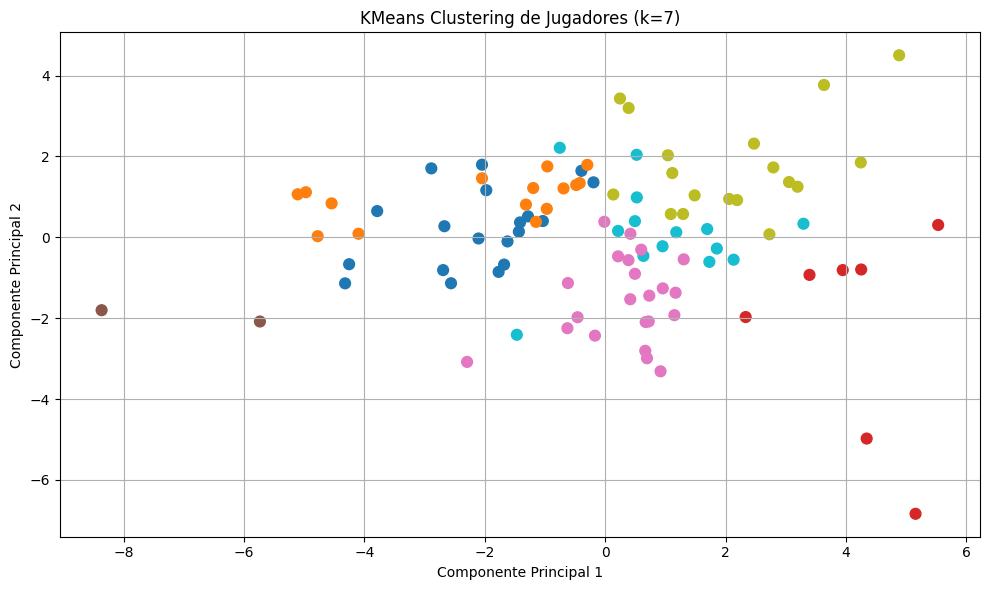

=== Promedio por clúster ===
          SPW  SPW-InP  Ace%   DF%  DF/2s  1stIn  1st%  2nd%  2%-InP  Hld%  \
Cluster                                                                      
0       -0.88    -0.72 -0.62  0.34   0.26  -0.35 -0.76 -0.65   -0.55 -0.78   
1       -0.88    -0.70 -1.23 -0.57  -0.45   0.61 -1.37 -0.04   -0.33 -0.93   
2        1.59     1.30  1.73  0.08   0.31   1.04  1.29  1.07    1.37  1.29   
3       -2.47    -2.22 -0.86  1.61   1.47  -0.52 -1.32 -3.25   -2.75 -2.59   
4        0.10    -0.29  0.54 -0.28  -0.30  -0.06  0.34 -0.34   -0.55  0.13   
5        0.84     0.74  0.24 -0.65  -0.66  -0.10  0.56  1.07    0.71  0.79   
6        0.36     0.56  0.46  0.85   0.73  -0.55  0.73 -0.07    0.38  0.41   

         BPConv%  BPChnc  Bks/S  BPSvd%  TB/S   RPW  
Cluster                                              
0           0.21   -0.12   0.51   -0.50 -0.06  0.26  
1           0.03   -0.36   0.10   -0.89 -0.64  0.20  
2          -0.61   -0.48  -1.25    0.80  1.33 -1.15 

In [57]:


# === Preprocesamiento ===
X = df[variables].copy()

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Aplicar KMeans ===
k = 7  # Número de clústeres (ajustable)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# === Visualización con PCA ===
#quiero ver que jugador es cada punto
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='tab10', s=60)
plt.title(f"KMeans Clustering de Jugadores (k={k})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


# === Mostrar resultados resumidos por clúster ===
resumen = df.groupby('Cluster')[variables].mean().round(2)
print("=== Promedio por clúster ===")
print(resumen)

#quiero ver  a que cluster pertene cada jugador de los 100
# === Mostrar jugadores por clúster ===
for i in range(k):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))


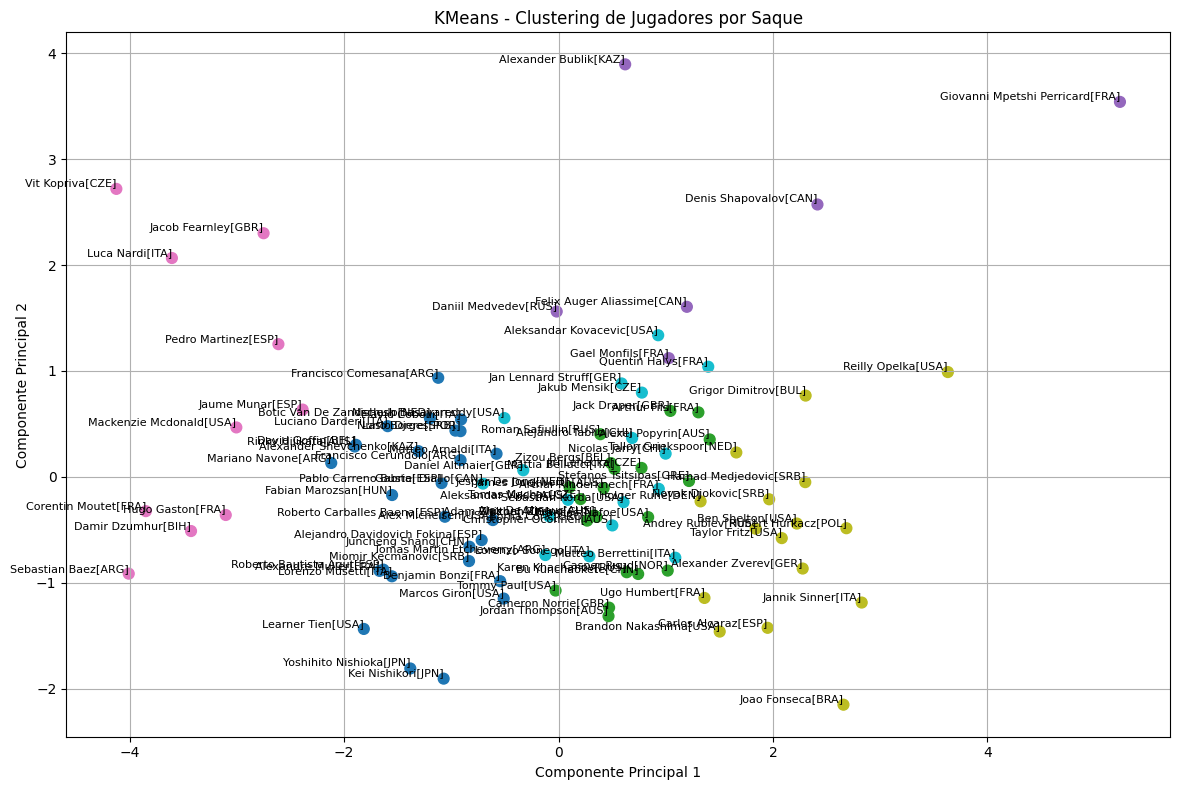


=== Jugadores en el clúster 0 ===
            Lorenzo Musetti[ITA]
        Francisco Cerundolo[ARG]
Alejandro Davidovich Fokina[ESP]
             Alex Michelsen[USA]
             Flavio Cobolli[ITA]
             Matteo Arnaldi[ITA]
           Alexandre Muller[FRA]
                Nuno Borges[POR]
               Marcos Giron[USA]
            Luciano Darderi[ITA]
          Miomir Kecmanovic[SRB]
               David Goffin[BEL]
      Roberto Bautista Agut[ESP]
             Benjamin Bonzi[FRA]
    Roberto Carballes Baena[ESP]
            Fabian Marozsan[HUN]
              Kei Nishikori[JPN]
         Francisco Comesana[ARG]
                Laslo Djere[SRB]
             Juncheng Shang[CHN]
               Learner Tien[USA]
         Yoshihito Nishioka[JPN]
             Rinky Hijikata[AUS]
    Botic Van De Zandschulp[NED]
       Alexander Shevchenko[KAZ]
        Pablo Carreno Busta[ESP]
             Mariano Navone[ARG]

=== Jugadores en el clúster 1 ===
       Jack Draper[GBR]
       Casper R

In [60]:


# === Variables de saque ===
variables_saque = ['1st%', '2%-InP', 'Ace%', 'DF%', 'Hld%']
X = df[variables_saque]

# === Normalizar ===
X_scaled = StandardScaler().fit_transform(X)

# === KMeans ===
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster_Saque'] = kmeans.fit_predict(X_scaled)

# === Visualización PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Saque'], cmap='tab10', s=60)
plt.title("KMeans - Clustering de Jugadores por Saque")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# === Añadir etiquetas con nombres de jugadores ===
for i, name in enumerate(df['Player']):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')

plt.tight_layout()
plt.show()

# === Mostrar resultado por clúster ===
for i in range(k):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster_Saque'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))

In [99]:
top10 = [
    'Alexander Zverev', 'Andrey Rublev', 'Carlos Alcaraz', 'Casper Ruud', 'Daniil Medvedev',
    'Holger Rune', 'Hubert Hurkacz', 'Jannik Sinner', 'Novak Djokovic', 'Stefanos Tsitsipas'
]

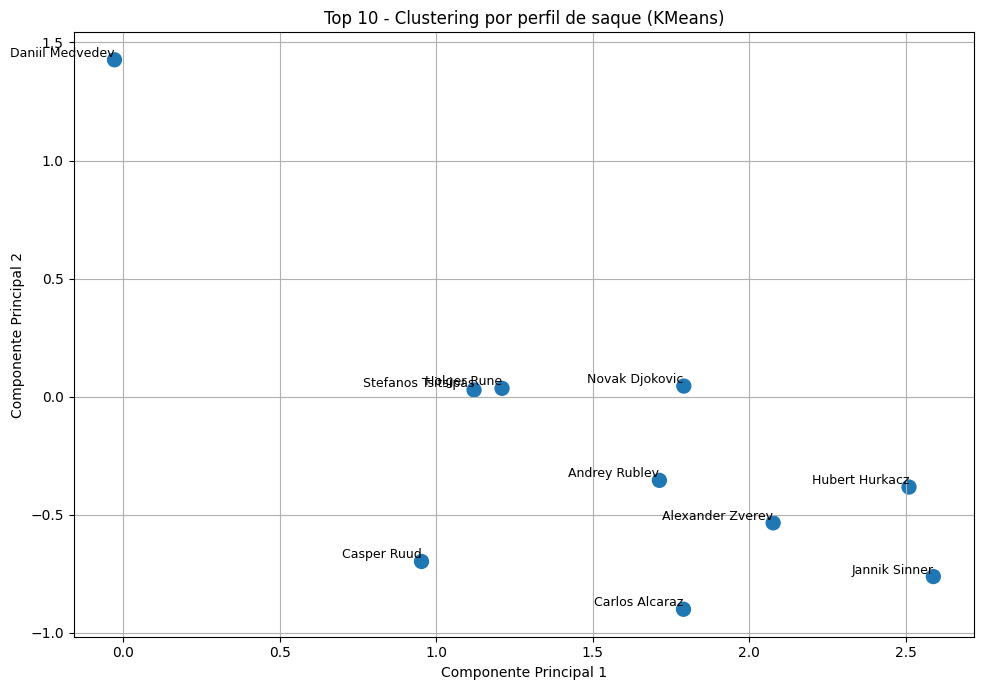

=== Clúster de cada jugador (Top 10) ===
Alexander Zverev: Cluster 0
Andrey Rublev: Cluster 0
Carlos Alcaraz: Cluster 0
Casper Ruud: Cluster 0
Daniil Medvedev: Cluster 0
Holger Rune: Cluster 0
Hubert Hurkacz: Cluster 0
Jannik Sinner: Cluster 0
Novak Djokovic: Cluster 0
Stefanos Tsitsipas: Cluster 0


In [109]:
# === Variables de saque ===
variables_saque = ['1st%', '2%-InP', 'Ace%', 'DF%', 'Hld%']
X = df[variables_saque]

# === Normalizar ===
X_scaled = StandardScaler().fit_transform(X)

# === Clustering con KMeans ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster_Saque'] = kmeans.fit_predict(X_scaled)

# === PCA para visualización (2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# === Filtrar solo los top 10 para graficar y mostrar ===
df_top10 = df[df['Player'].isin(top10)].copy()

# === Visualización solo para los 10 jugadores ===
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_top10['PCA1'], df_top10['PCA2'], c=df_top10['Cluster_Saque'], cmap='tab10', s=100)

# Etiquetas
for _, row in df_top10.iterrows():
    plt.text(row['PCA1'], row['PCA2'], row['Player'], fontsize=9, ha='right', va='bottom')

plt.title("Top 10 - Clustering por perfil de saque (KMeans)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Mostrar resultados por jugador ===
print("=== Clúster de cada jugador (Top 10) ===")
for jugador in top10:
    fila = df[df['Player'] == jugador]
    if not fila.empty:
        cluster = fila['Cluster_Saque'].values[0]
        print(f"{jugador}: Cluster {cluster}")
    else:
        print(f"{jugador}: NO ENCONTRADO EN EL DATASET")

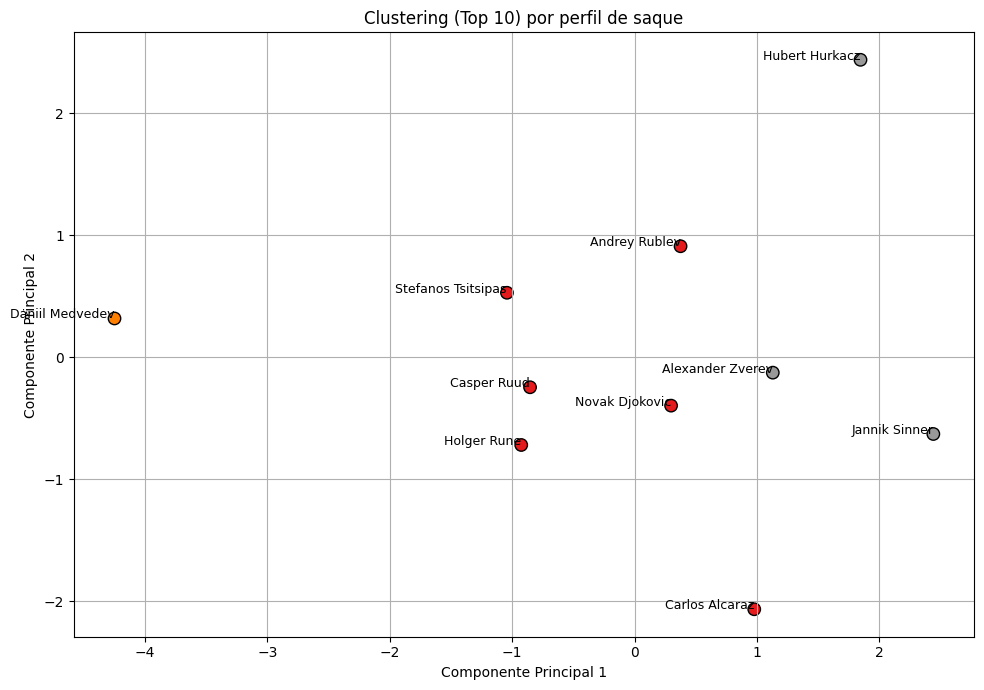


Cluster 0:
    Carlos Alcaraz
    Novak Djokovic
       Casper Ruud
       Holger Rune
     Andrey Rublev
Stefanos Tsitsipas

Cluster 1:
Daniil Medvedev

Cluster 2:
   Jannik Sinner
Alexander Zverev
  Hubert Hurkacz


In [112]:
# === 3. Filtrar solo los top 10 ===
df_top10 = df[df['Player'].isin(top10)].copy()

# === 4. Variables del perfil de saque ===
variables_saque = ['1st%', '2%-InP', 'Ace%', 'DF%', 'Hld%']
X = df_top10[variables_saque]

# === 5. Normalización ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 6. PCA a 2 componentes ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === 7. KMeans sobre los 10 jugadores ===
kmeans = KMeans(n_clusters=3, random_state=42)  # Cambia k si quieres más clústeres
df_top10['Cluster'] = kmeans.fit_predict(X_scaled)

# === 8. Agregar PCA al DataFrame ===
df_top10['PCA1'] = X_pca[:, 0]
df_top10['PCA2'] = X_pca[:, 1]

# === 9. Gráfico ===
plt.figure(figsize=(10, 7))
plt.scatter(df_top10['PCA1'], df_top10['PCA2'], c=df_top10['Cluster'], cmap='Set1', s=80, edgecolor='k')

for _, row in df_top10.iterrows():
    plt.text(row['PCA1'], row['PCA2'], row['Player'], fontsize=9, ha='right')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clustering (Top 10) por perfil de saque")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 10. Mostrar jugadores por clúster ===
for c in sorted(df_top10['Cluster'].unique()):
    print(f"\nCluster {c}:")
    print(df_top10[df_top10['Cluster'] == c]['Player'].to_string(index=False))

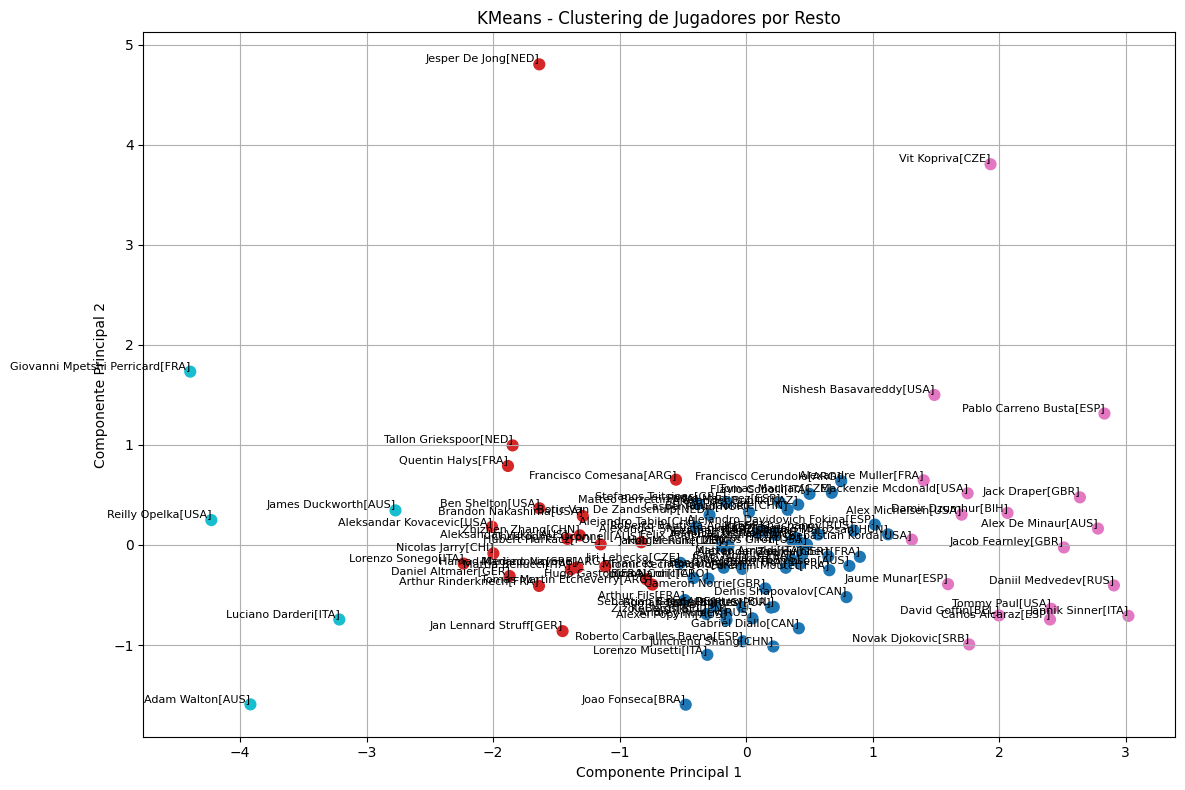


=== Jugadores en el clúster 0 ===
           Alexander Zverev[GER]
               Taylor Fritz[USA]
                Casper Ruud[NOR]
            Lorenzo Musetti[ITA]
                Holger Rune[DEN]
                Arthur Fils[FRA]
            Grigor Dimitrov[BUL]
             Frances Tiafoe[USA]
              Andrey Rublev[RUS]
        Francisco Cerundolo[ARG]
         Stefanos Tsitsipas[GRE]
               Tomas Machac[CZE]
               Jakub Mensik[CZE]
                Ugo Humbert[FRA]
            Karen Khachanov[RUS]
             Alexei Popyrin[AUS]
Alejandro Davidovich Fokina[ESP]
      Felix Auger Aliassime[CAN]
           Denis Shapovalov[CAN]
          Matteo Berrettini[ITA]
             Sebastian Baez[ARG]
             Flavio Cobolli[ITA]
             Matteo Arnaldi[ITA]
               Jiri Lehecka[CZE]
                Nuno Borges[POR]
            Jordan Thompson[AUS]
           Alejandro Tabilo[CHI]
               Gael Monfils[FRA]
               Marcos Giron[USA]
        

In [63]:
# === Variables de resto ===
variables_resto = ['RPW', 'Brk%', 'BPConv%']
X = df[variables_resto]

# === Normalizar y KMeans ===
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Resto'] = kmeans.fit_predict(X_scaled)

# === PCA + plot ===
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Resto'], cmap='tab10', s=60)
plt.title("KMeans - Clustering de Jugadores por Resto")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# === Añadir etiquetas con nombres de jugadores ===
for i, name in enumerate(df['Player']):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')

plt.tight_layout()
plt.show()

# === Mostrar resultado por clúster ===
for i in range(4):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster_Resto'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))

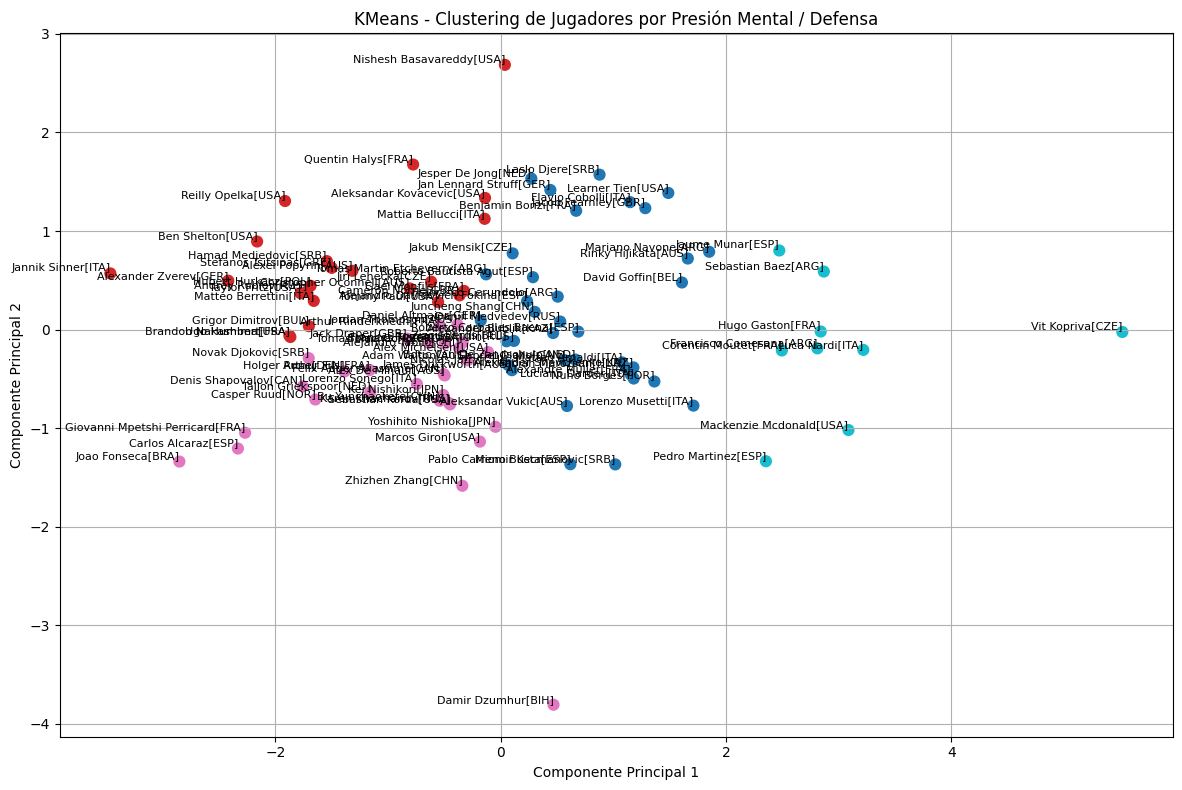


=== Jugadores en el clúster 0 ===
            Lorenzo Musetti[ITA]
            Daniil Medvedev[RUS]
        Francisco Cerundolo[ARG]
               Jakub Mensik[CZE]
Alejandro Davidovich Fokina[ESP]
             Flavio Cobolli[ITA]
             Matteo Arnaldi[ITA]
           Alexandre Muller[FRA]
                Nuno Borges[POR]
            Luciano Darderi[ITA]
          Miomir Kecmanovic[SRB]
               David Goffin[BEL]
                Zizou Bergs[BEL]
    Tomas Martin Etcheverry[ARG]
              Nicolas Jarry[CHI]
             Gabriel Diallo[CAN]
      Roberto Bautista Agut[ESP]
             Jacob Fearnley[GBR]
             Benjamin Bonzi[FRA]
    Roberto Carballes Baena[ESP]
            Fabian Marozsan[HUN]
                Laslo Djere[SRB]
             Juncheng Shang[CHN]
               Learner Tien[USA]
            Daniel Altmaier[GER]
           Alexander Bublik[KAZ]
            Roman Safiullin[RUS]
           Aleksandar Vukic[AUS]
             Rinky Hijikata[AUS]
    Boti

In [66]:
# === Variables de presión mental / defensa ===
variables_presion = ['BPSvd%', 'BPvs/M', 'Bkn/M']
X = df[variables_presion]

# === Normalizar y KMeans ===
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Presion'] = kmeans.fit_predict(X_scaled)

# === PCA + plot ===
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Presion'], cmap='tab10', s=60)
plt.title("KMeans - Clustering de Jugadores por Presión Mental / Defensa")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# === Añadir etiquetas con nombres de jugadores ===
for i, name in enumerate(df['Player']):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')

plt.tight_layout()
plt.show()

# === Mostrar resultado por clúster ===
for i in range(4):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster_Presion'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === Cargar dataset original ===
df = pd.read_csv("Estadisticas_2024/stats_Hard.csv")

# === Eliminar columnas duplicadas y columnas con sufijos como .1, .2
df = df.loc[:, ~df.columns.duplicated()]
df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

# === Copiar para limpiar
df_clean = df.copy()

# === Eliminar columnas indicadas por el usuario
columnas_a_eliminar = [
    'Player_dup', 'M_dup', 'M W-L', 'Aces', 'DFs', 'Pts/SG', 'PtsL/SG',
    'RPW-InP', 'Pts/RG', 'PtsW/RG', 'MdOppRk', 'MnOppRk',
    'BPConv', 'BPSaved', 'BPvs', 'DR', 'Points', 'TB W-L', 'TBs',
    'Sets', 'Set W-L', 'Gms', 'Game W-L', 'Time/Mt', 'Min/Set', 'Sec/Pt'
]
df_clean = df_clean.drop(columns=[col for col in columnas_a_eliminar if col in df_clean.columns], errors='ignore')

# === Eliminar columnas tipo "W-L" con patrón 'n-n'
cols_w_l = [col for col in df_clean.columns if df_clean[col].astype(str).str.contains(r'^\d+-\d+$', regex=True).any()]
df_clean = df_clean.drop(columns=cols_w_l)

# === Limpiar columnas con '%' → convertir a float decimal
cols_pct = [col for col in df_clean.columns if df_clean[col].astype(str).str.contains('%').any()]
for col in cols_pct:
    df_clean[col] = df_clean[col].astype(str).str.replace('%', '', regex=False).str.strip()
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce') / 100.0

# === Convertir todas las columnas restantes (menos 'Player') a float
columnas_numericas = [col for col in df_clean.columns if col != 'Player']
for col in columnas_numericas:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# === Eliminar columnas con >30% NaNs
df_clean = df_clean.dropna(thresh=int(0.7 * len(df_clean)), axis=1)

# === Eliminar filas con NaNs restantes
df_clean = df_clean.dropna().reset_index(drop=True)

# === Escalar columnas numéricas
cols_final = [col for col in df_clean.columns if col != 'Player']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean[cols_final]), columns=cols_final)

# === Añadir columna 'Player' al inicio
df_scaled.insert(0, 'Player', df_clean['Player'].values)

# === Guardar dataset limpio
df_scaled.to_csv("stats_Hard2_limpio_escalado.csv", index=False)
print("Dataset limpio y escalado guardado como 'stats_Hard_limpio_escalado.csv'")


Dataset limpio y escalado guardado como 'stats_Hard_limpio_escalado.csv'


Variables a incluir para Score_Serve:
M W%,SPW,SPW-InP,Ace%,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,RPW,vAce%,vDF%,v1st%,v2nd%,Brk%,BPConv%,BPChnc,BP/G,BP/S,BP/M,Bks/S,Bks/M,BPSvd%,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,TPW%,TB W%,TB/S,S W%,G W%

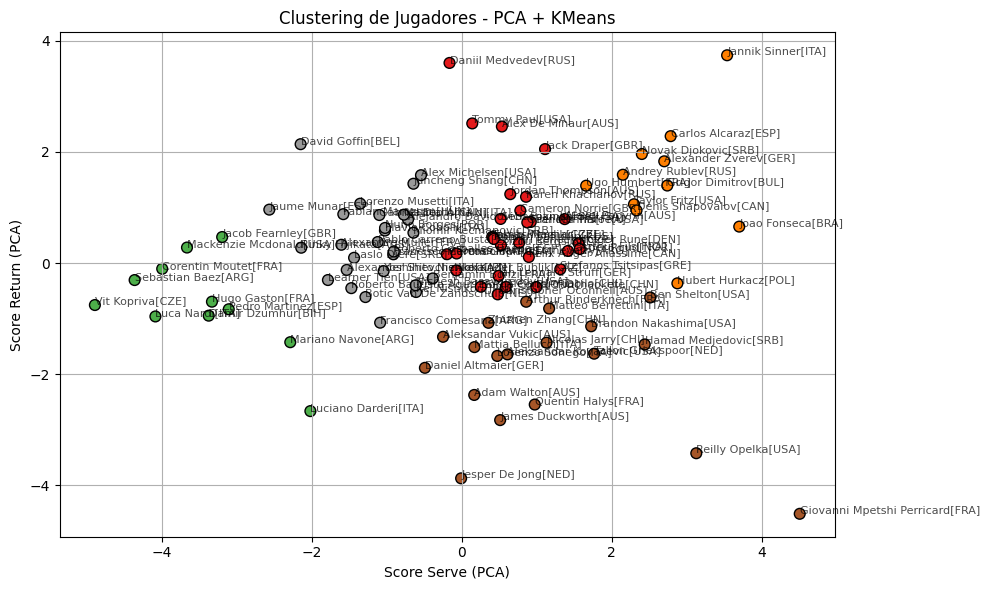


Resumen promedio por cluster:
         Score_Serve  Score_Return
Cluster                           
0               0.67          0.62
1              -3.48         -0.72
2               2.65          1.50
3               1.14         -1.92
4              -1.19          0.37

Pesos del PCA para Score_Serve:
Ace%: 0.395
Hld%: 0.498
1st%: 0.495
2nd%: 0.372
SPW-InP: 0.461

Pesos del PCA para Score_Return:
RPW: 0.447
Brk%: 0.400
BPConv%: 0.128
BPChnc: 0.524
BP/M: 0.591

Jugadores por cluster:

Cluster 2:
   Jannik Sinner[ITA]
Alexander Zverev[GER]
  Carlos Alcaraz[ESP]
    Taylor Fritz[USA]
  Novak Djokovic[SRB]
 Grigor Dimitrov[BUL]
   Andrey Rublev[RUS]
     Ugo Humbert[FRA]
Denis Shapovalov[CAN]
  Hubert Hurkacz[POL]
    Joao Fonseca[BRA]

Cluster 0:
            Jack Draper[GBR]
            Casper Ruud[NOR]
         Alex De Minaur[AUS]
            Holger Rune[DEN]
        Daniil Medvedev[RUS]
             Tommy Paul[USA]
            Arthur Fils[FRA]
         Frances Tiafoe[USA]
     Ste

In [54]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
serve_vars = ['Ace%', 'Hld%', '1st%', '2nd%', 'SPW-InP',] #bp svd
return_vars = ['RPW', 'Brk%', 'BPConv%', 'BPChnc', 'BP/M']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['Score_Serve'] = pca_serve.fit_transform(df[serve_vars])

pca_return = PCA(n_components=1)
df['Score_Return'] = pca_return.fit_transform(df[return_vars])

# 4. Clustering con KMeans
features = df[['Score_Serve', 'Score_Return']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['Score_Serve'], df['Score_Return'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['Score_Serve'][i], df['Score_Return'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score Serve (PCA)")
plt.ylabel("Score Return (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['Score_Serve', 'Score_Return']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Score_Serve:")
for var, weight in zip(serve_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Score_Return:")
for var, weight in zip(return_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Vamos a diferenciar los buenos sacadores de los jugadores que son solidos con su saque

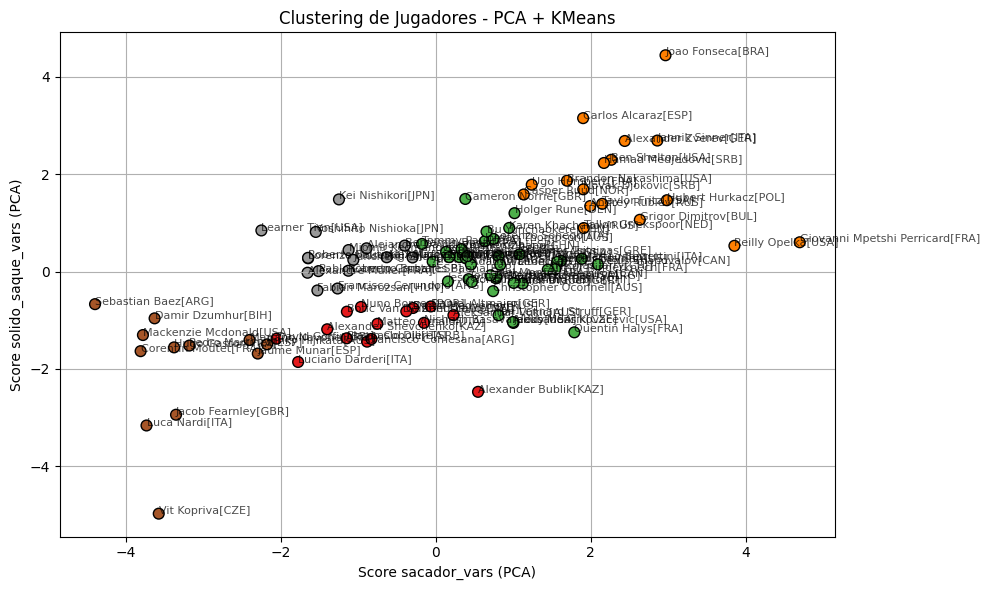


Resumen promedio por cluster:
         sacador_vars  solido_saque_vars
Cluster                                 
0               -0.74              -1.20
1                0.81               0.12
2                2.40               1.87
3               -3.31              -1.94
4               -1.24               0.33

Pesos del PCA para Sacador:
Ace%: 0.456
1stIn: 0.038
1st%: 0.526
SPW: 0.517
Hld%: 0.496

Pesos del PCA para Servicio solido:
DF/2s: -0.284
1stIn: 0.333
2nd%: 0.677
SPW-InP: 0.592

Jugadores por cluster:

Cluster 2:
             Jannik Sinner[ITA]
          Alexander Zverev[GER]
            Carlos Alcaraz[ESP]
              Taylor Fritz[USA]
            Novak Djokovic[SRB]
               Casper Ruud[NOR]
               Ben Shelton[USA]
           Grigor Dimitrov[BUL]
             Andrey Rublev[RUS]
               Ugo Humbert[FRA]
         Brandon Nakashima[USA]
            Hubert Hurkacz[POL]
         Tallon Griekspoor[NED]
Giovanni Mpetshi Perricard[FRA]
              Joao

In [11]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
sacador_vars = ['Ace%', '1stIn', '1st%', 'SPW', 'Hld%'] #bp svd
solido_saque_vars = ['DF/2s','1stIn','2nd%', 'SPW-InP']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['sacador_vars'] = pca_serve.fit_transform(df[sacador_vars])

pca_return = PCA(n_components=1)
df['solido_saque_vars'] = pca_return.fit_transform(df[solido_saque_vars])

# 4. Clustering con KMeans
features = df[['sacador_vars', 'solido_saque_vars']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['sacador_vars'], df['solido_saque_vars'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['sacador_vars'][i], df['solido_saque_vars'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score sacador_vars (PCA)")
plt.ylabel("Score solido_saque_vars (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['sacador_vars', 'solido_saque_vars']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Sacador:")
for var, weight in zip(sacador_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Servicio solido:")
for var, weight in zip(solido_saque_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



este mejor que el de abajo creo

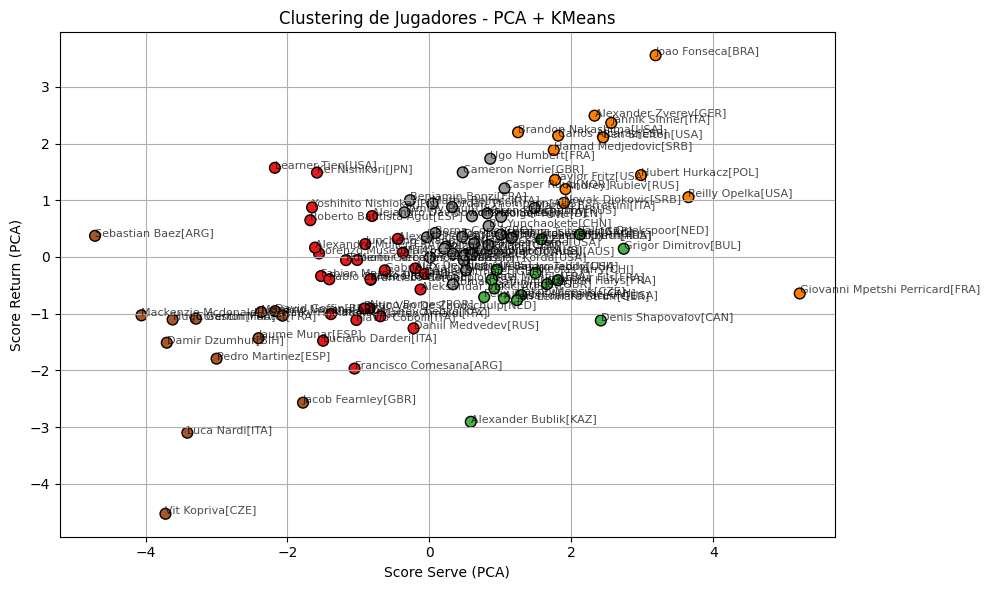


Resumen promedio por cluster:
         sacador_vars  solido_saque_vars
Cluster                                 
0               -1.01              -0.23
1                1.43              -0.56
2                2.52               1.70
3               -3.10              -1.60
4                0.51               0.49

Pesos del PCA para Sacador:
Ace%: 0.459
Hld%: 0.498
1st%: 0.536
SPW-InP: 0.440
TB/S: 0.246

Pesos del PCA para Servicio solido:
DF/2s: -0.412
1stIn: 0.423
2nd%: 0.699
BPSvd%: 0.404

Jugadores por cluster:

Cluster 2:
             Jannik Sinner[ITA]
          Alexander Zverev[GER]
            Carlos Alcaraz[ESP]
              Taylor Fritz[USA]
            Novak Djokovic[SRB]
               Ben Shelton[USA]
             Andrey Rublev[RUS]
         Brandon Nakashima[USA]
            Hubert Hurkacz[POL]
Giovanni Mpetshi Perricard[FRA]
              Joao Fonseca[BRA]
          Hamad Medjedovic[SRB]
             Reilly Opelka[USA]

Cluster 1:
          Jack Draper[GBR]
         

In [ ]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
sacador_vars = ['Ace%', '1stIn', '1st%', 'SPW', 'Hld%'] #bp svd
solido_saque_vars = ['DF/2s','1stIn','2nd%', 'SPW-InP']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['sacador_vars'] = pca_serve.fit_transform(df[sacador_vars])

pca_return = PCA(n_components=1)
df['solido_saque_vars'] = pca_return.fit_transform(df[solido_saque_vars])

# 4. Clustering con KMeans
features = df[['sacador_vars', 'solido_saque_vars']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['sacador_vars'], df['solido_saque_vars'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['sacador_vars'][i], df['solido_saque_vars'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score sacador_vars (PCA)")
plt.ylabel("Score solido_saque_vars (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['sacador_vars', 'solido_saque_vars']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Sacador:")
for var, weight in zip(sacador_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Servicio solido:")
for var, weight in zip(solido_saque_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Perricard ya no es tan bueno, fonseca sera porque ha jugado pocos partidos

Vamos a separar los buenos restadores de los malos restadores

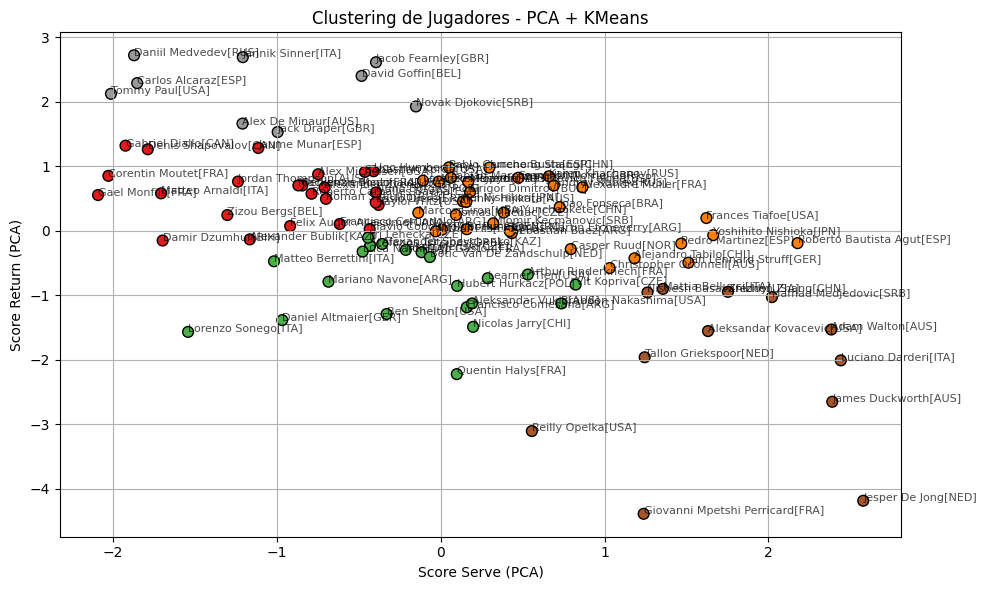


Resumen promedio por cluster:
         Score_Serve  Score_Return
Cluster                           
0              -1.03          0.59
1              -0.17         -0.84
2               0.56          0.29
3               1.74         -2.10
4              -1.13          2.22

Pesos del PCA para Score_Serve:
vAce%: 0.884
v1st%: -0.468

Pesos del PCA para Score_Return:
Brk%: 0.469
BP/S: 0.711
RPW: 0.524

Jugadores por cluster:

Cluster 4:
  Jannik Sinner[ITA]
 Carlos Alcaraz[ESP]
    Jack Draper[GBR]
 Novak Djokovic[SRB]
 Alex De Minaur[AUS]
Daniil Medvedev[RUS]
     Tommy Paul[USA]
   David Goffin[BEL]
 Jacob Fearnley[GBR]

Cluster 0:
       Alexander Zverev[GER]
           Taylor Fritz[USA]
    Francisco Cerundolo[ARG]
            Ugo Humbert[FRA]
        Sebastian Korda[USA]
  Felix Auger Aliassime[CAN]
       Denis Shapovalov[CAN]
         Alex Michelsen[USA]
         Flavio Cobolli[ITA]
         Matteo Arnaldi[ITA]
            Nuno Borges[POR]
        Jordan Thompson[AUS]
          

In [69]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
saque_rival_vars = ['vAce%', 'v1st%'] #bp svd
resto_vars = ['Brk%', 'BP/S', 'RPW']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['Score_Serve'] = pca_serve.fit_transform(df[saque_rival_vars])

pca_return = PCA(n_components=1)
df['Score_Return'] = pca_return.fit_transform(df[resto_vars])

# 4. Clustering con KMeans
features = df[['Score_Serve', 'Score_Return']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['Score_Serve'], df['Score_Return'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['Score_Serve'][i], df['Score_Return'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score Serve (PCA)")
plt.ylabel("Score Return (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['Score_Serve', 'Score_Return']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Score_Serve:")
for var, weight in zip(saque_rival_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Score_Return:")
for var, weight in zip(resto_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Vamos a separar los jugadores regulares(mantienen mucho su primer servicio, provocan muchas bolas de break, buen % de primeros) de los inestables(pocos puntos al resto, pocos saques primeros in ,dobles faltas)

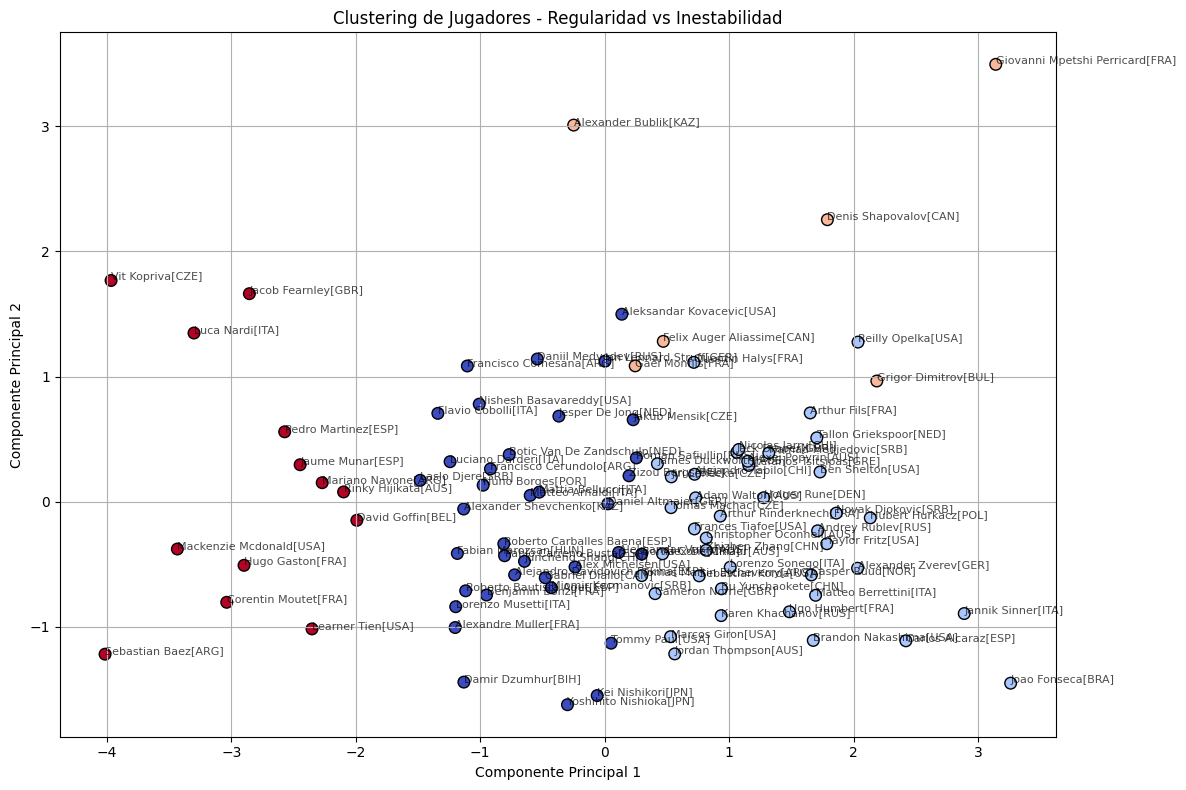


Resumen promedio por cluster:
                     1st%   DF%  Hld%  BPvs/M   RPW
Cluster_Regularidad                                
0                   -0.39 -0.09 -0.34    0.35  0.02
1                    0.69 -0.45  0.71   -0.67 -0.17
2                    1.19  1.95  0.63   -0.74 -0.26
3                   -1.66  0.46 -1.73    1.52  0.18

Cluster 1:
          Jannik Sinner[ITA]
       Alexander Zverev[GER]
         Carlos Alcaraz[ESP]
           Taylor Fritz[USA]
            Jack Draper[GBR]
         Novak Djokovic[SRB]
            Casper Ruud[NOR]
         Alex De Minaur[AUS]
            Holger Rune[DEN]
            Ben Shelton[USA]
            Arthur Fils[FRA]
         Frances Tiafoe[USA]
          Andrey Rublev[RUS]
     Stefanos Tsitsipas[GRE]
           Tomas Machac[CZE]
            Ugo Humbert[FRA]
        Sebastian Korda[USA]
        Karen Khachanov[RUS]
         Alexei Popyrin[AUS]
      Brandon Nakashima[USA]
      Matteo Berrettini[ITA]
         Hubert Hurkacz[POL]
      T

In [71]:
# === 2. Variables para regularidad ===
vars_reg = ['1st%', 'DF%', 'Hld%', 'BPvs/M', 'RPW']
X = df[vars_reg]

# === 3. PCA sin reescalar (ya están normalizadas) ===
X_pca = PCA(n_components=2).fit_transform(X)

# === 4. KMeans clustering ===
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Regularidad'] = kmeans.fit_predict(X)

# === 5. Visualización ===
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Regularidad'], cmap='coolwarm', s=70, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - Regularidad vs Inestabilidad")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Promedio por grupo para interpretación ===
summary = df.groupby('Cluster_Regularidad')[vars_reg].mean().round(2)
print("\nResumen promedio por cluster:")
print(summary)

# === 7. Jugadores por grupo ===
for cluster in df['Cluster_Regularidad'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster_Regularidad'] == cluster]['Player'].to_string(index=False))

este no me vale

Vamos a enfrentar un buen restador contra uno que aprovecha mucho sus oportunidades

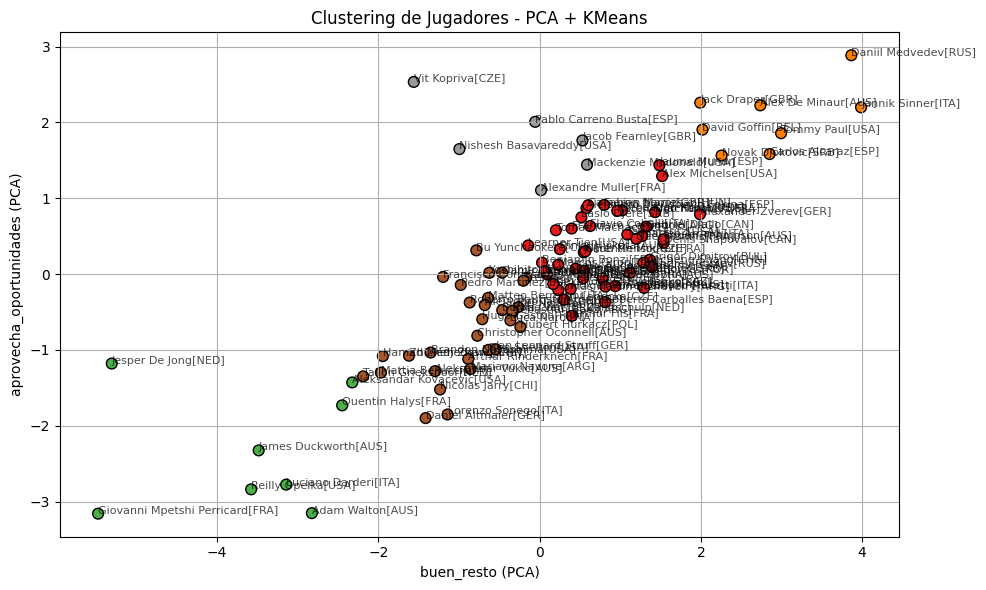


Resumen promedio por cluster:
         buen_resto  aprovecha_oportunidades
Cluster                                     
0              0.79                     0.32
1             -3.57                    -2.32
2              2.84                     2.06
3             -0.88                    -0.72
4             -0.25                     1.75

Pesos del PCA para buen_resto:
vAce%: -0.341
v1st%: 0.341
RPW: 0.397
v2nd%: 0.403
BPChnc: 0.431
BP/M: 0.512

Pesos del PCA para aprovecha_oportunidades:
Brk%: 0.519
BPConv%: 0.395
Bks/M: 0.758

Jugadores por cluster:

Cluster 2:
  Jannik Sinner[ITA]
 Carlos Alcaraz[ESP]
    Jack Draper[GBR]
 Novak Djokovic[SRB]
 Alex De Minaur[AUS]
Daniil Medvedev[RUS]
     Tommy Paul[USA]
   David Goffin[BEL]

Cluster 0:
           Alexander Zverev[GER]
               Taylor Fritz[USA]
            Lorenzo Musetti[ITA]
                Holger Rune[DEN]
                Arthur Fils[FRA]
            Grigor Dimitrov[BUL]
             Frances Tiafoe[USA]
             

In [13]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
buen_resto = ['vAce%', 'v1st%', 'RPW', 'v2nd%', 'BPChnc', 'BP/M'] #bp svd
aprovecha_oportunidades = ['Brk%', 'BPConv%', 'Bks/M']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['buen_resto'] = pca_serve.fit_transform(df[buen_resto])

pca_return = PCA(n_components=1)
df['aprovecha_oportunidades'] = pca_return.fit_transform(df[aprovecha_oportunidades])

# 4. Clustering con KMeans
features = df[['buen_resto', 'aprovecha_oportunidades']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['buen_resto'], df['aprovecha_oportunidades'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['buen_resto'][i], df['aprovecha_oportunidades'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("buen_resto (PCA)")
plt.ylabel("aprovecha_oportunidades (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['buen_resto', 'aprovecha_oportunidades']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para buen_resto:")
for var, weight in zip(buen_resto, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para aprovecha_oportunidades:")
for var, weight in zip(aprovecha_oportunidades, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Este es interesante pero los jugadores siguen un patron

no hay uno que no reste bien pero aprovecche muchas oportunidades y viceversa

In [72]:
# === Diccionario con rutas por superficie y periodo ===
rutas = {
    "general": {
        "2019_23": "Juego_2019_23/merged_general.csv",
        "2024_25": "Juego_2024_25/merged_general.csv",
    },
    "hard": {
        "2019_23": "Juego_2019_23/merged_hard.csv",
        "2024_25": "Juego_2024_25/merged_hard.csv",
    },
    "clay": {
        "2019_23": "Juego_2019_23/merged_clay.csv",
        "2024_25": "Juego_2024_25/merged_clay.csv",
    }
}


========== PROCESANDO: GENERAL ==========


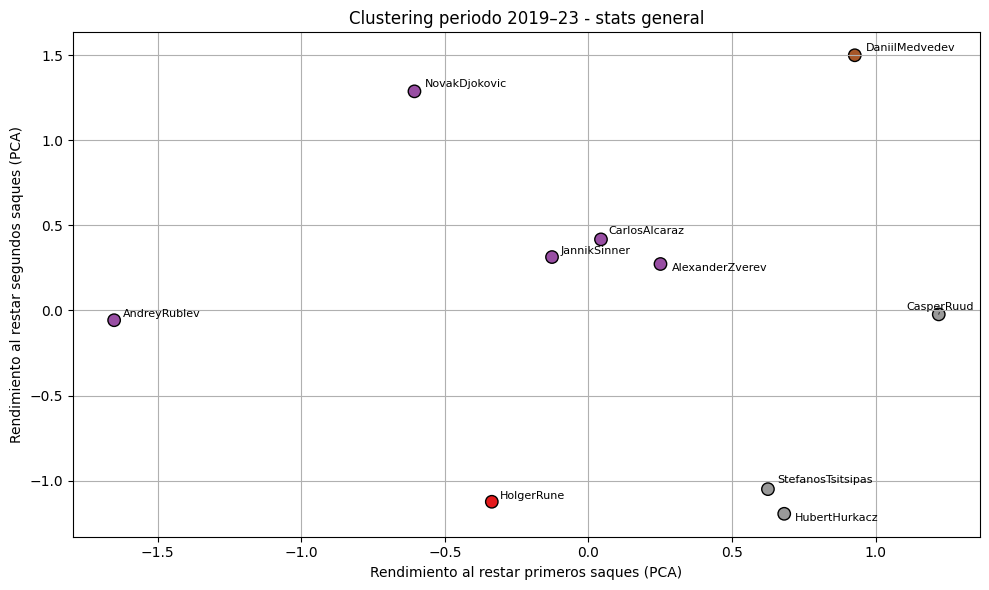


Resumen de clusters - Periodo 2019–23 - general:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune    -0.336347     -1.124582        0
0    AlexanderZverev     0.250782      0.273251        1
2      CarlosAlcaraz     0.043664      0.418001        1
1       AndreyRublev    -1.650991     -0.057234        1
7       JannikSinner    -0.126792      0.314055        1
8      NovakDjokovic    -0.605621      1.288315        1
4     DaniilMedvedev     0.927127      1.500466        2
3         CasperRuud     1.219458     -0.022975        3
6      HubertHurkacz     0.681482     -1.195333        3
9  StefanosTsitsipas     0.624834     -1.050298        3


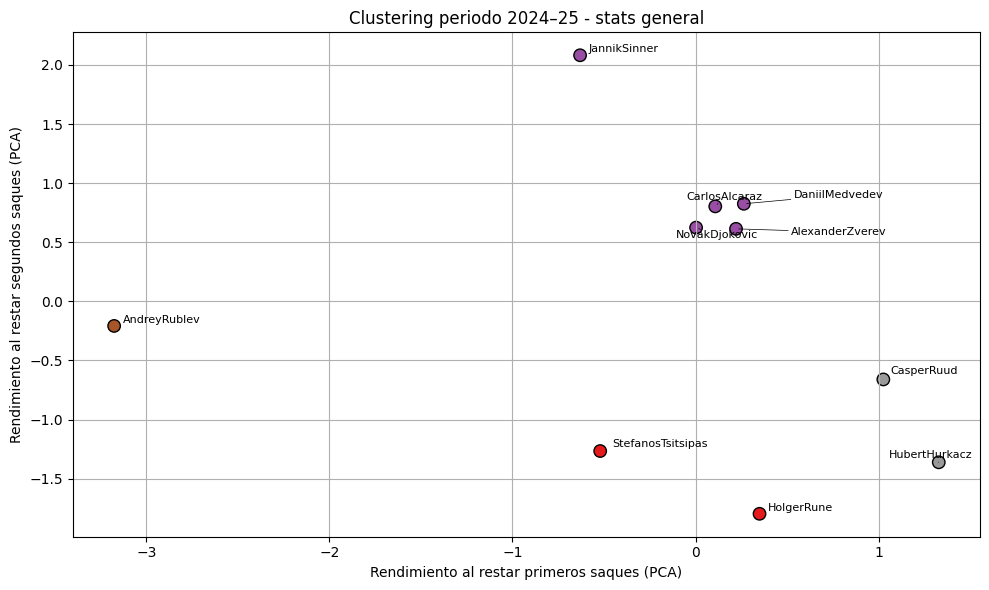


Resumen de clusters - Periodo 2024–25 - general:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune     0.349601     -1.796460        0
9  StefanosTsitsipas    -0.520859     -1.265695        0
4     DaniilMedvedev     0.263785      0.825341        1
0    AlexanderZverev     0.221194      0.613528        1
7       JannikSinner    -0.630694      2.081437        1
2      CarlosAlcaraz     0.107837      0.803393        1
8      NovakDjokovic     0.003059      0.623658        1
1       AndreyRublev    -3.176214     -0.207697        2
6      HubertHurkacz     1.328781     -1.360965        3
3         CasperRuud     1.025915     -0.660205        3

========== PROCESANDO: HARD ==========


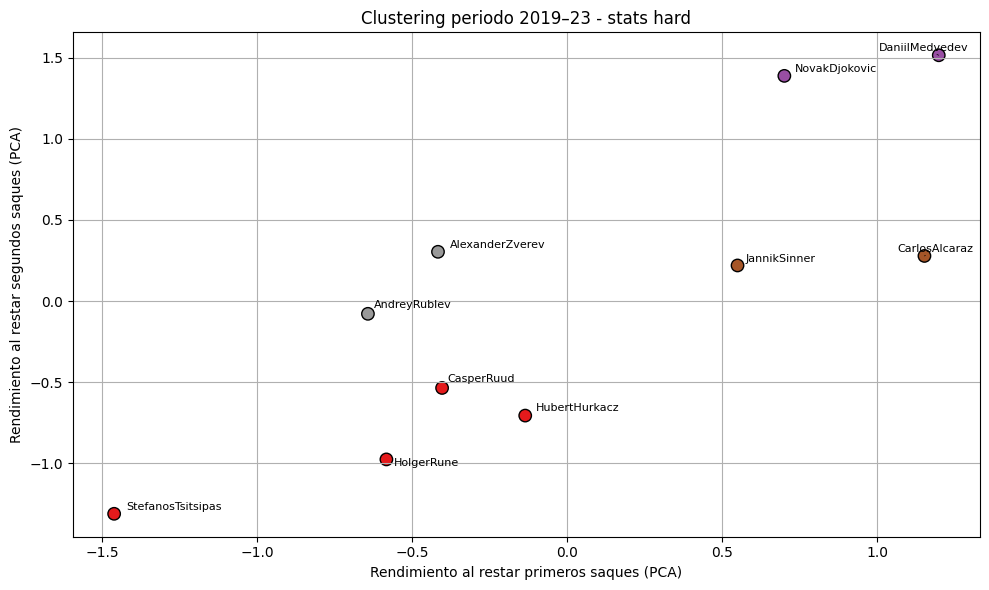


Resumen de clusters - Periodo 2019–23 - hard:
              Player  Score_Serve  Score_Return  Cluster
3         CasperRuud    -0.404020     -0.535105        0
5         HolgerRune    -0.583656     -0.975303        0
6      HubertHurkacz    -0.135869     -0.705381        0
9  StefanosTsitsipas    -1.461889     -1.310360        0
8      NovakDjokovic     0.699949      1.387507        1
4     DaniilMedvedev     1.198060      1.514475        1
2      CarlosAlcaraz     1.151870      0.278176        2
7       JannikSinner     0.548978      0.219517        2
1       AndreyRublev    -0.643236     -0.078360        3
0    AlexanderZverev    -0.417230      0.303741        3


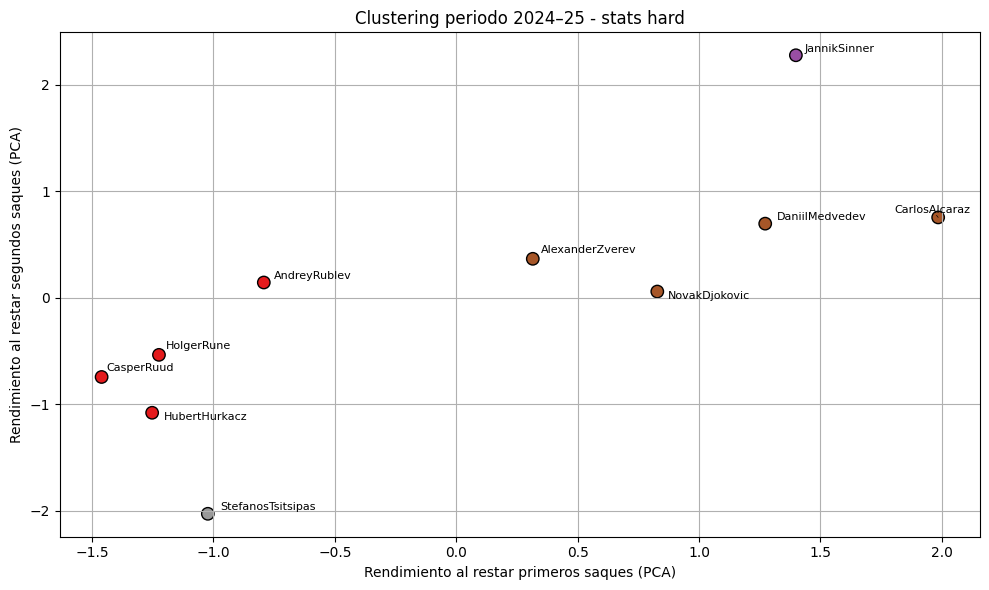


Resumen de clusters - Periodo 2024–25 - hard:
              Player  Score_Serve  Score_Return  Cluster
1       AndreyRublev    -0.792498      0.142689        0
3         CasperRuud    -1.460542     -0.744184        0
6      HubertHurkacz    -1.252418     -1.080016        0
5         HolgerRune    -1.224291     -0.536515        0
7       JannikSinner     1.398904      2.275717        1
0    AlexanderZverev     0.315334      0.365147        2
2      CarlosAlcaraz     1.984902      0.753653        2
4     DaniilMedvedev     1.272556      0.695066        2
8      NovakDjokovic     0.828094      0.057903        2
9  StefanosTsitsipas    -1.022998     -2.028366        3

========== PROCESANDO: CLAY ==========


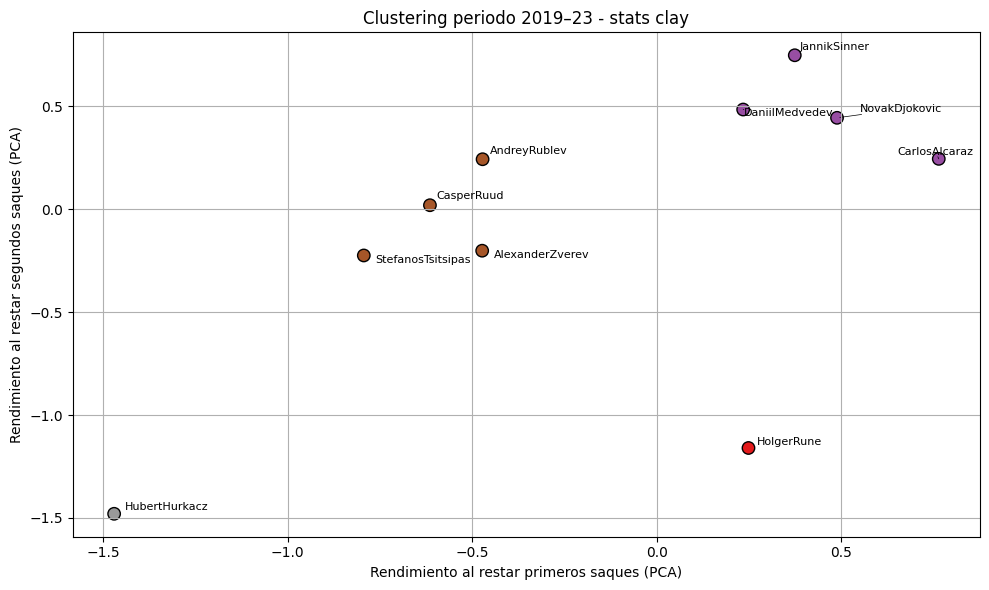


Resumen de clusters - Periodo 2019–23 - clay:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune     0.248616     -1.160162        0
2      CarlosAlcaraz     0.764260      0.245135        1
4     DaniilMedvedev     0.234172      0.484910        1
7       JannikSinner     0.374038      0.748670        1
8      NovakDjokovic     0.488569      0.444641        1
3         CasperRuud    -0.614604      0.019808        2
0    AlexanderZverev    -0.473060     -0.201276        2
1       AndreyRublev    -0.471947      0.243299        2
9  StefanosTsitsipas    -0.793837     -0.224450        2
6      HubertHurkacz    -1.470427     -1.480021        3


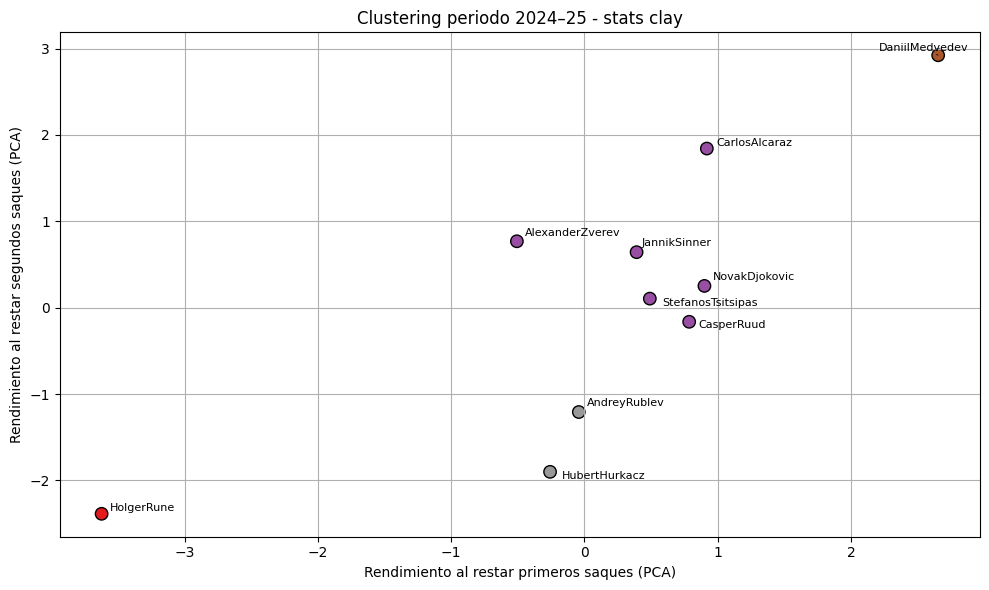


Resumen de clusters - Periodo 2024–25 - clay:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune    -3.622903     -2.385788        0
0    AlexanderZverev    -0.506631      0.769316        1
3         CasperRuud     0.786315     -0.162724        1
2      CarlosAlcaraz     0.918783      1.842833        1
7       JannikSinner     0.391623      0.643123        1
8      NovakDjokovic     0.900710      0.252478        1
9  StefanosTsitsipas     0.491009      0.105161        1
4     DaniilMedvedev     2.654728      2.922858        2
6      HubertHurkacz    -0.257602     -1.900158        3
1       AndreyRublev    -0.041811     -1.207654        3


In [93]:
# === Variables a usar ===
serve_vars = ['1st: RiP%', 'RiP W%.1_x']
return_vars = ['2nd: RiP%', 'RiP W%.2_x']



# === Función para proyectar un dataframe usando los modelos ya entrenados ===
def proyectar_periodo(df, scaler_serve, scaler_return, pca_serve, pca_return):
    df_scaled = df.copy()
    df_scaled["Score_Serve"] = pca_serve.transform(scaler_serve.transform(df[serve_vars]))
    df_scaled["Score_Return"] = pca_return.transform(scaler_return.transform(df[return_vars]))
    return df_scaled

# === Función para graficar los clusters ===
def graficar_clusters(df, periodo, tipo):
    features = df[["Score_Serve", "Score_Return"]]
    kmeans = KMeans(n_clusters=4, random_state=0)
    df["Cluster"] = kmeans.fit_predict(features)

    plt.figure(figsize=(10, 6))
    plt.scatter(df["Score_Serve"], df["Score_Return"], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

    texts = []
    for _, row in df.iterrows():
        texts.append(
            plt.text(row["Score_Serve"], row["Score_Return"], row["Player"], fontsize=8)
        )

    adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.xlabel("Rendimiento al restar primeros saques (PCA)")
    plt.ylabel("Rendimiento al restar segundos saques (PCA)")
    plt.title(f"Clustering periodo {periodo} - stats {tipo}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nResumen de clusters - Periodo {periodo} - {tipo}:")
    print(df[["Player", "Score_Serve", "Score_Return", "Cluster"]].sort_values(by="Cluster"))

# === Bucle principal por superficie ===
for tipo in ["general", "hard", "clay"]:
    print(f"\n========== PROCESANDO: {tipo.upper()} ==========")
    
    # Cargar ambos periodos
    df_2019 = pd.read_csv(rutas[tipo]["2019_23"])
    df_2024 = pd.read_csv(rutas[tipo]["2024_25"])
    
    # Concatenar para escalar y hacer PCA conjunto
    df_all = pd.concat([df_2019, df_2024], ignore_index=True)
    
    # Entrenar escaladores y PCA
    scaler_serve = StandardScaler().fit(df_all[serve_vars])
    scaler_return = StandardScaler().fit(df_all[return_vars])
    
    pca_serve = PCA(n_components=1).fit(scaler_serve.transform(df_all[serve_vars]))
    pca_return = PCA(n_components=1).fit(scaler_return.transform(df_all[return_vars]))

    # Proyectar cada periodo con los modelos conjuntos
    df_2019_proj = proyectar_periodo(df_2019, scaler_serve, scaler_return, pca_serve, pca_return)
    df_2024_proj = proyectar_periodo(df_2024, scaler_serve, scaler_return, pca_serve, pca_return)

    # Graficar
    graficar_clusters(df_2019_proj.copy(), "2019–23", tipo)
    graficar_clusters(df_2024_proj.copy(), "2024–25", tipo)

EL SIGUIENTE ES MAS INDIVIDUAL PARA VER QUIEN RESTA MAS ATRAS


========== PROCESANDO: GENERAL ==========


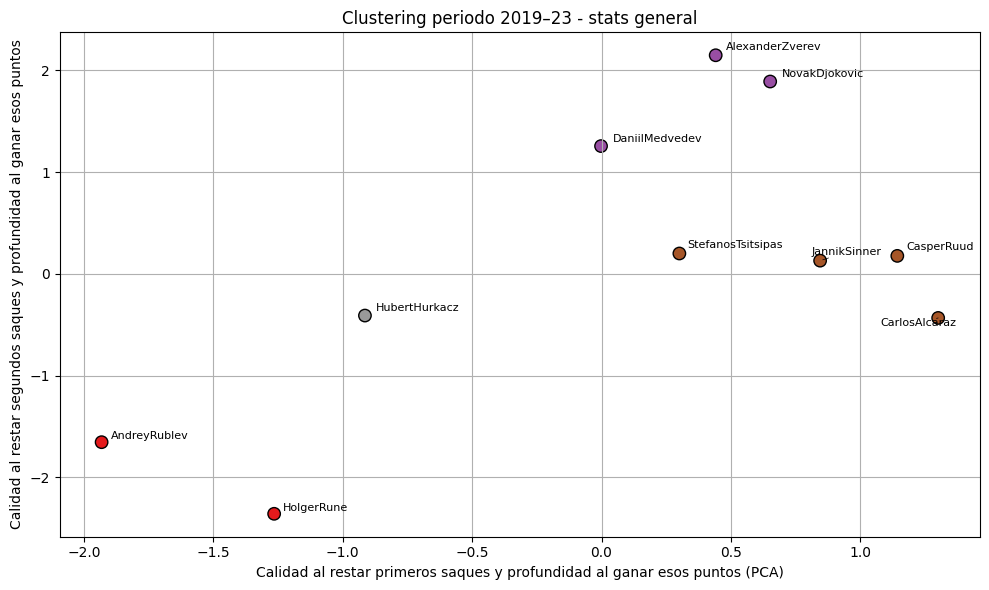


Resumen de clusters - Periodo 2019–23 - general:
              Player  Score_Serve  Score_Return  Cluster
1       AndreyRublev    -1.932082     -1.653358        0
5         HolgerRune    -1.265248     -2.356976        0
4     DaniilMedvedev    -0.001774      1.255958        1
0    AlexanderZverev     0.441351      2.148236        1
8      NovakDjokovic     0.651930      1.890242        1
3         CasperRuud     1.143281      0.177077        2
7       JannikSinner     0.844961      0.130169        2
2      CarlosAlcaraz     1.301216     -0.432725        2
9  StefanosTsitsipas     0.300965      0.200531        2
6      HubertHurkacz    -0.914283     -0.409271        3


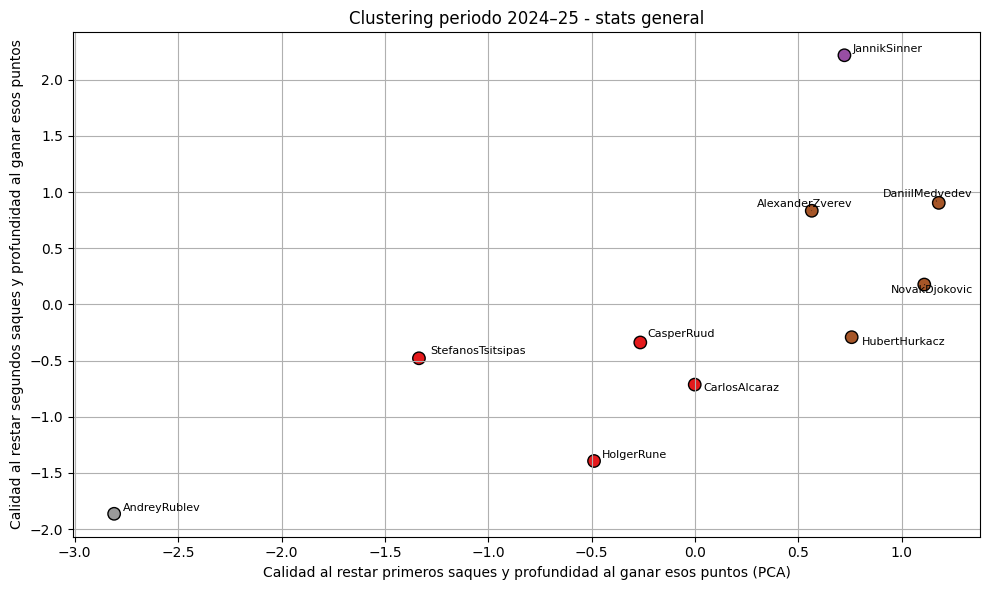


Resumen de clusters - Periodo 2024–25 - general:
              Player  Score_Serve  Score_Return  Cluster
3         CasperRuud    -0.264998     -0.338909        0
2      CarlosAlcaraz    -0.001774     -0.714172        0
5         HolgerRune    -0.488706     -1.394336        0
9  StefanosTsitsipas    -1.335441     -0.479633        0
7       JannikSinner     0.722123      2.218597        1
4     DaniilMedvedev     1.178378      0.904149        2
6      HubertHurkacz     0.757220     -0.292001        2
0    AlexanderZverev     0.564189      0.833787        2
8      NovakDjokovic     1.108185      0.177077        2
1       AndreyRublev    -2.809494     -1.864443        3

========== PROCESANDO: HARD ==========


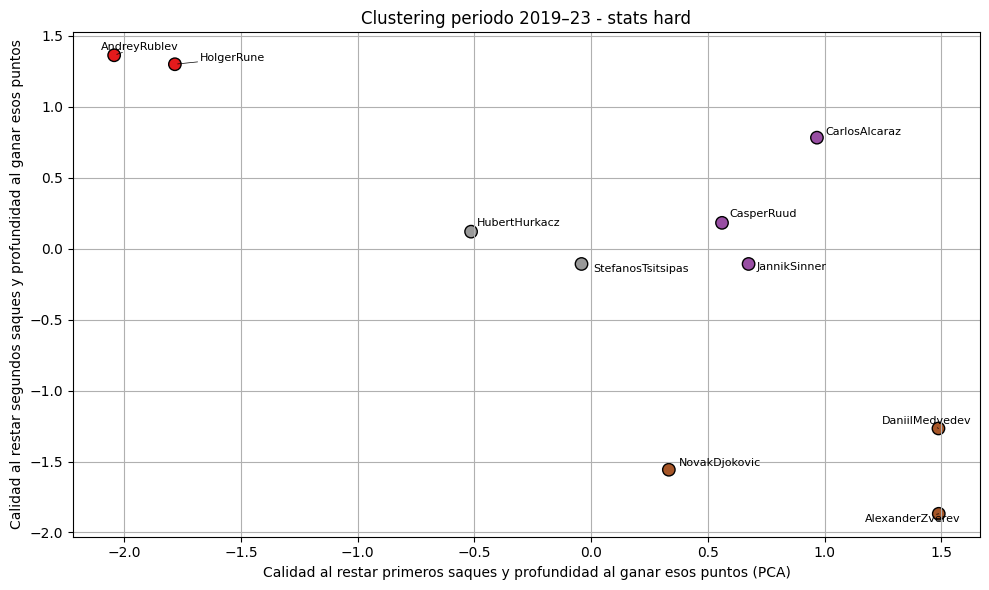


Resumen de clusters - Periodo 2019–23 - hard:
              Player  Score_Serve  Score_Return  Cluster
1       AndreyRublev    -2.043019      1.363503        0
5         HolgerRune    -1.782775      1.300241        0
3         CasperRuud     0.560731      0.182249        1
2      CarlosAlcaraz     0.967362      0.782652        1
7       JannikSinner     0.674588     -0.107601        1
0    AlexanderZverev     1.489163     -1.868555        2
4     DaniilMedvedev     1.487849     -1.267000        2
8      NovakDjokovic     0.333018     -1.558001        2
6      HubertHurkacz    -0.514087      0.120138        3
9  StefanosTsitsipas    -0.041082     -0.107601        3


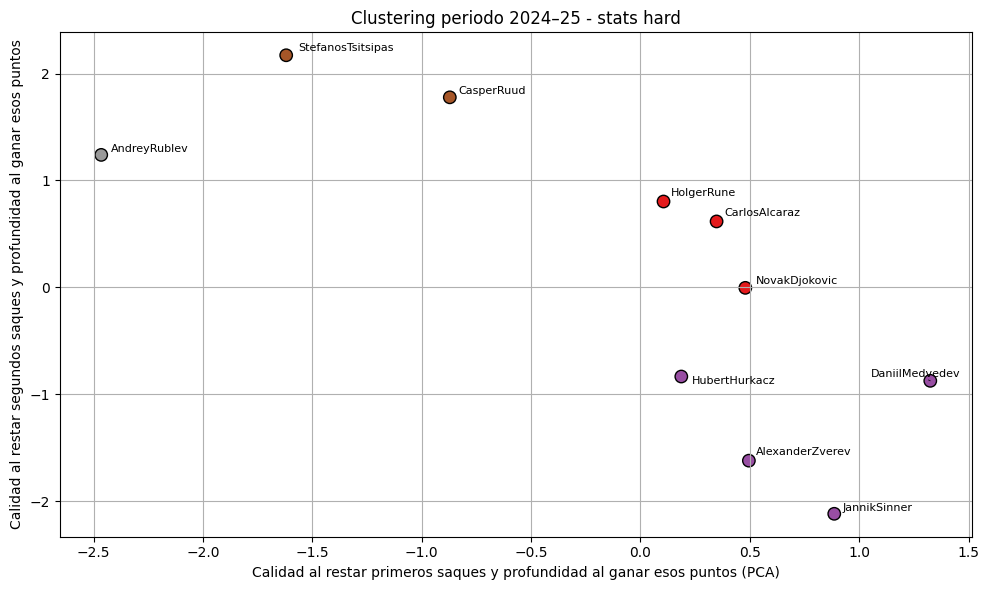


Resumen de clusters - Periodo 2024–25 - hard:
              Player  Score_Serve  Score_Return  Cluster
2      CarlosAlcaraz     0.347970      0.617024        0
5         HolgerRune     0.105305      0.803356        0
8      NovakDjokovic     0.479405     -0.004083        0
4     DaniilMedvedev     1.325197     -0.873633        1
6      HubertHurkacz     0.186631     -0.833377        1
7       JannikSinner     0.886036     -2.116997        1
0    AlexanderZverev     0.495670     -1.620112        1
3         CasperRuud    -0.871922      1.777574        2
9  StefanosTsitsipas    -1.620123      2.170942        2
1       AndreyRublev    -2.465915      1.239282        3

========== PROCESANDO: CLAY ==========


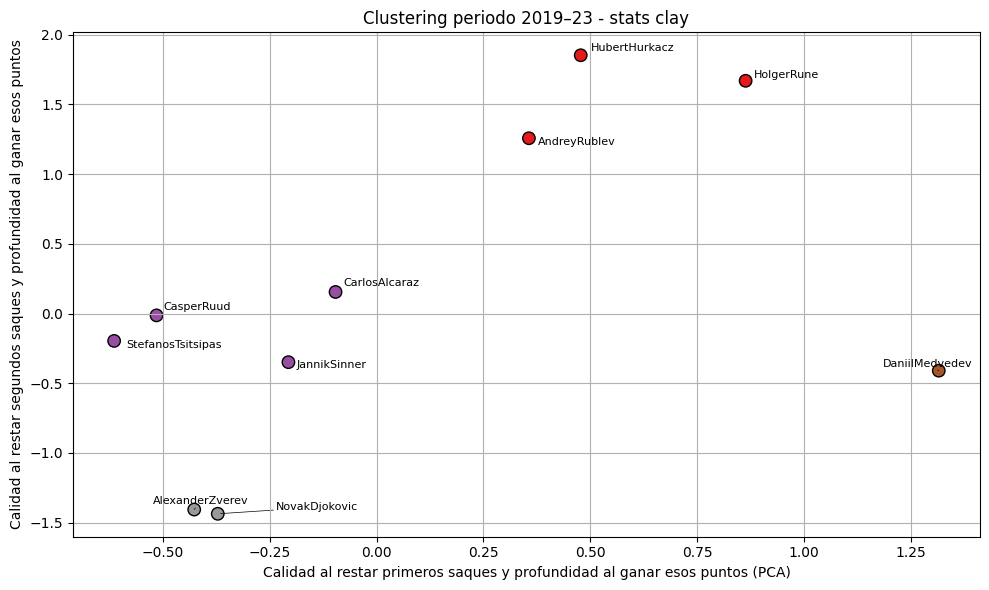


Resumen de clusters - Periodo 2019–23 - clay:
              Player  Score_Serve  Score_Return  Cluster
1       AndreyRublev     0.356524      1.257650        0
5         HolgerRune     0.863795      1.669634        0
6      HubertHurkacz     0.477828      1.852737        0
2      CarlosAlcaraz    -0.096119      0.154875        1
7       JannikSinner    -0.206395     -0.348660        1
3         CasperRuud    -0.515169     -0.012970        1
9  StefanosTsitsipas    -0.614417     -0.196073        1
4     DaniilMedvedev     1.315928     -0.409694        2
0    AlexanderZverev    -0.426948     -1.405659        3
8      NovakDjokovic    -0.371809     -1.436176        3


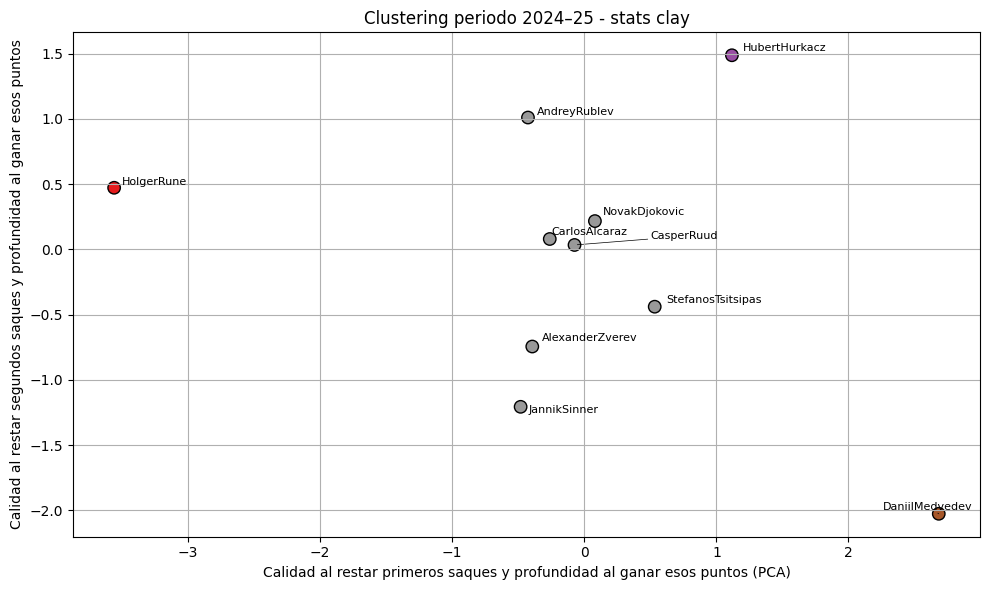


Resumen de clusters - Periodo 2024–25 - clay:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune    -3.559304      0.471153        0
6      HubertHurkacz     1.117430      1.486530        1
4     DaniilMedvedev     2.683354     -2.027109        2
0    AlexanderZverev    -0.393865     -0.745384        3
3         CasperRuud    -0.074063      0.032806        3
2      CarlosAlcaraz    -0.261533      0.078582        3
1       AndreyRublev    -0.426438      1.009359        3
7       JannikSinner    -0.482086     -1.207297        3
8      NovakDjokovic     0.080323      0.215910        3
9  StefanosTsitsipas     0.532966     -0.440212        3


In [91]:
# === Variables a usar ===
serve_vars = ['1st: RiP%', 'RDI']
return_vars = ['2nd: RiP%', 'RDI.1']



# === Función para proyectar un dataframe usando los modelos ya entrenados ===
def proyectar_periodo(df, scaler_serve, scaler_return, pca_serve, pca_return):
    df_scaled = df.copy()
    df_scaled["Score_Serve"] = pca_serve.transform(scaler_serve.transform(df[serve_vars]))
    df_scaled["Score_Return"] = pca_return.transform(scaler_return.transform(df[return_vars]))
    return df_scaled

# === Función para graficar los clusters ===
def graficar_clusters(df, periodo, tipo):
    features = df[["Score_Serve", "Score_Return"]]
    kmeans = KMeans(n_clusters=4, random_state=0)
    df["Cluster"] = kmeans.fit_predict(features)

    plt.figure(figsize=(10, 6))
    plt.scatter(df["Score_Serve"], df["Score_Return"], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

    texts = []
    for _, row in df.iterrows():
        texts.append(
            plt.text(row["Score_Serve"], row["Score_Return"], row["Player"], fontsize=8)
        )

    adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.xlabel("Calidad al restar primeros saques y profundidad al ganar esos puntos (PCA)")
    plt.ylabel("Calidad al restar segundos saques y profundidad al ganar esos puntos")
    plt.title(f"Clustering periodo {periodo} - stats {tipo}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nResumen de clusters - Periodo {periodo} - {tipo}:")
    print(df[["Player", "Score_Serve", "Score_Return", "Cluster"]].sort_values(by="Cluster"))

# === Bucle principal por superficie ===
for tipo in ["general", "hard", "clay"]:
    print(f"\n========== PROCESANDO: {tipo.upper()} ==========")
    
    # Cargar ambos periodos
    df_2019 = pd.read_csv(rutas[tipo]["2019_23"])
    df_2024 = pd.read_csv(rutas[tipo]["2024_25"])
    
    # Concatenar para escalar y hacer PCA conjunto
    df_all = pd.concat([df_2019, df_2024], ignore_index=True)
    
    # Entrenar escaladores y PCA
    scaler_serve = StandardScaler().fit(df_all[serve_vars])
    scaler_return = StandardScaler().fit(df_all[return_vars])
    
    pca_serve = PCA(n_components=1).fit(scaler_serve.transform(df_all[serve_vars]))
    pca_return = PCA(n_components=1).fit(scaler_return.transform(df_all[return_vars]))

    # Proyectar cada periodo con los modelos conjuntos
    df_2019_proj = proyectar_periodo(df_2019, scaler_serve, scaler_return, pca_serve, pca_return)
    df_2024_proj = proyectar_periodo(df_2024, scaler_serve, scaler_return, pca_serve, pca_return)

    # Graficar
    graficar_clusters(df_2019_proj.copy(), "2019–23", tipo)
    graficar_clusters(df_2024_proj.copy(), "2024–25", tipo)


========== PROCESANDO: GENERAL ==========


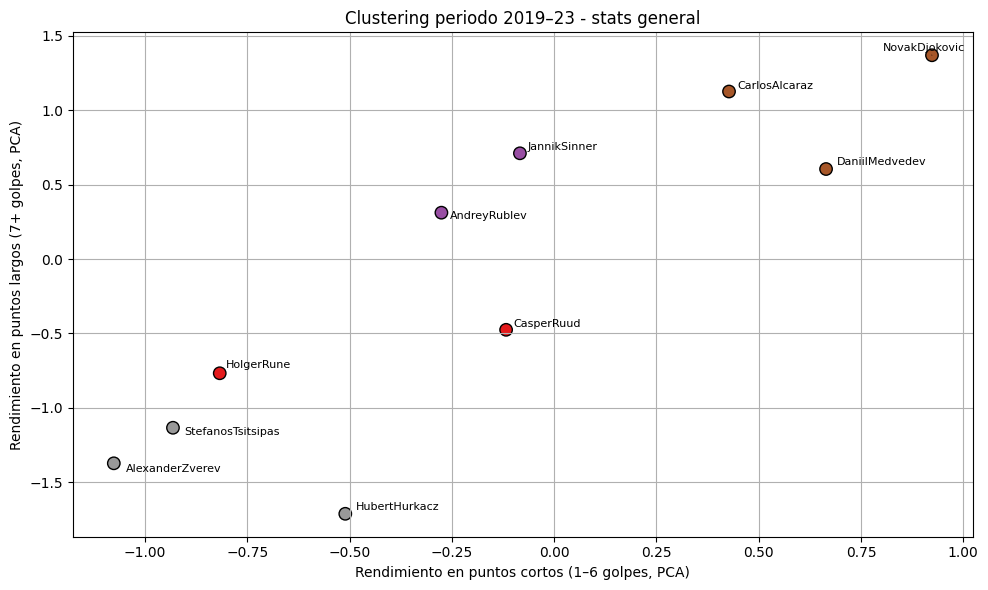


Resumen de clusters - Periodo 2019–23 - general:
              Player  Score_Serve  Score_Return  Cluster
3         CasperRuud    -0.117559     -0.475978        0
5         HolgerRune    -0.817525     -0.768098        0
7       JannikSinner    -0.083746      0.710716        1
1       AndreyRublev    -0.275678      0.311413        1
4     DaniilMedvedev     0.664536      0.604958        2
2      CarlosAlcaraz     0.427358      1.126066        2
8      NovakDjokovic     0.923469      1.369798        2
0    AlexanderZverev    -1.076458     -1.373466        3
6      HubertHurkacz    -0.510630     -1.712921        3
9  StefanosTsitsipas    -0.931864     -1.134567        3


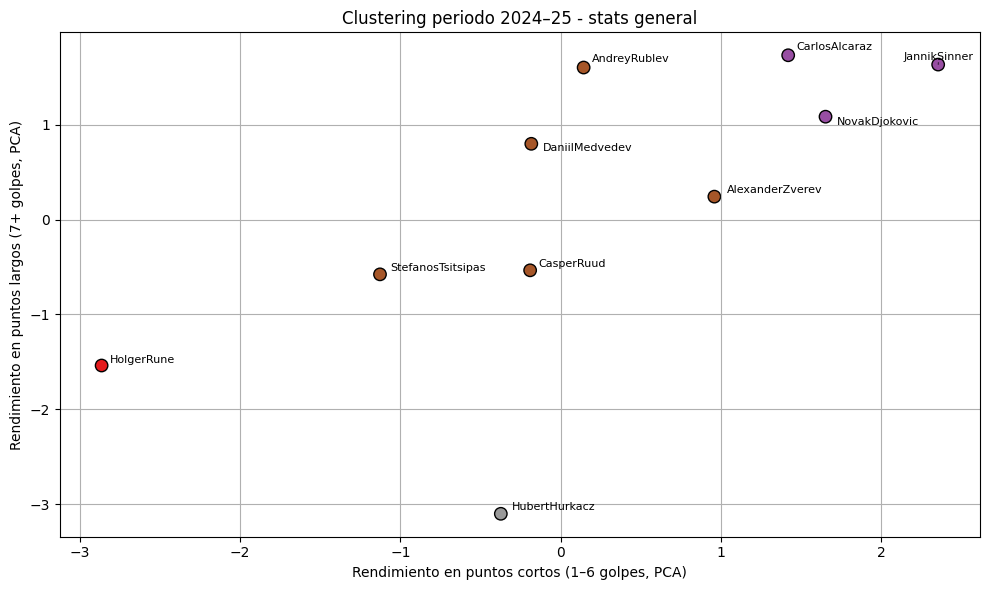


Resumen de clusters - Periodo 2024–25 - general:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune    -2.864301     -1.539196        0
2      CarlosAlcaraz     1.420559      1.732981        1
7       JannikSinner     2.356591      1.634782        1
8      NovakDjokovic     1.653555      1.084989        1
3         CasperRuud    -0.189856     -0.535209        2
1       AndreyRublev     0.143955      1.603495        2
4     DaniilMedvedev    -0.182604      0.799126        2
0    AlexanderZverev     0.959862      0.241899        2
9  StefanosTsitsipas    -1.126865     -0.577710        2
6      HubertHurkacz    -0.372799     -3.103078        3

========== PROCESANDO: HARD ==========


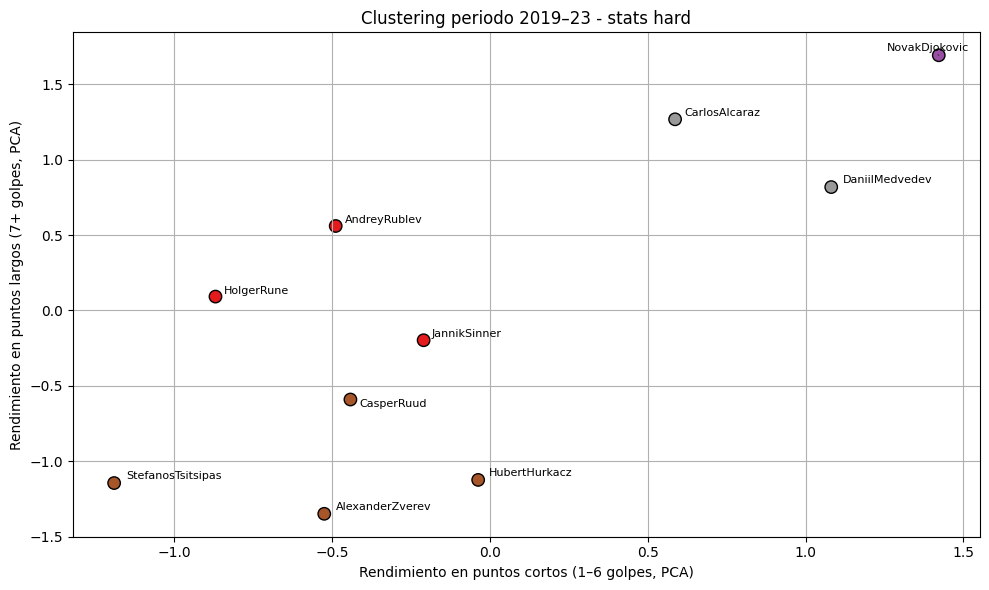


Resumen de clusters - Periodo 2019–23 - hard:
              Player  Score_Serve  Score_Return  Cluster
1       AndreyRublev    -0.488701      0.560469        0
5         HolgerRune    -0.869566      0.092088        0
7       JannikSinner    -0.210173     -0.197513        0
8      NovakDjokovic     1.421902      1.693221        1
6      HubertHurkacz    -0.037320     -1.124198        2
3         CasperRuud    -0.442061     -0.590850        2
9  StefanosTsitsipas    -1.190642     -1.144991        2
0    AlexanderZverev    -0.524972     -1.349060        2
4     DaniilMedvedev     1.081201      0.818654        3
2      CarlosAlcaraz     0.586517      1.268331        3


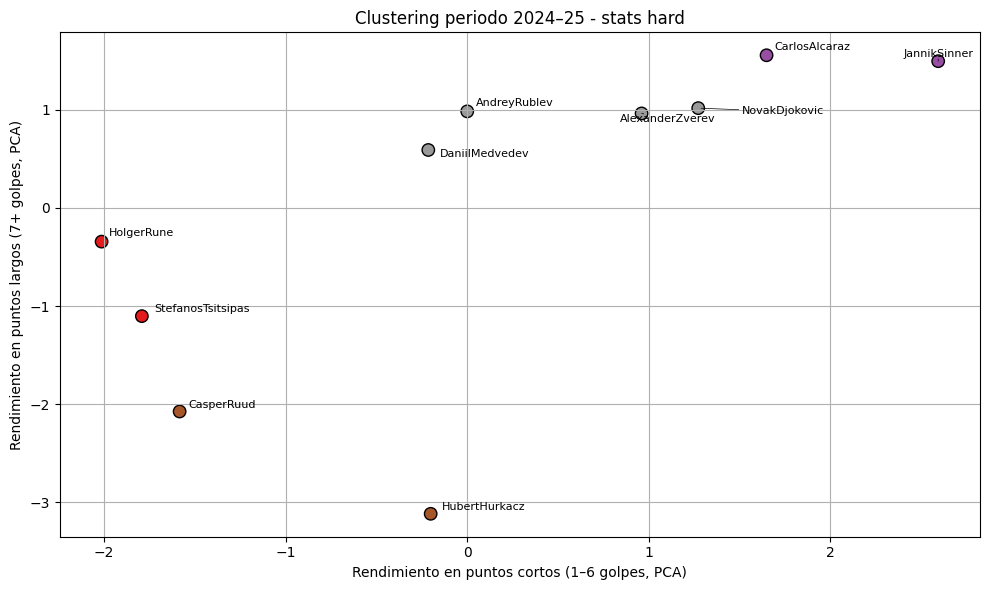


Resumen de clusters - Periodo 2024–25 - hard:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune    -2.013631     -0.343153        0
9  StefanosTsitsipas    -1.791914     -1.103087        0
7       JannikSinner     2.594650      1.497324        1
2      CarlosAlcaraz     1.649340      1.557704        1
6      HubertHurkacz    -0.200916     -3.119123        2
3         CasperRuud    -1.583902     -2.075717        2
0    AlexanderZverev     0.960907      0.964430        3
1       AndreyRublev     0.000421      0.985359        3
4     DaniilMedvedev    -0.214066      0.591613        3
8      NovakDjokovic     1.272925      1.018500        3

========== PROCESANDO: CLAY ==========


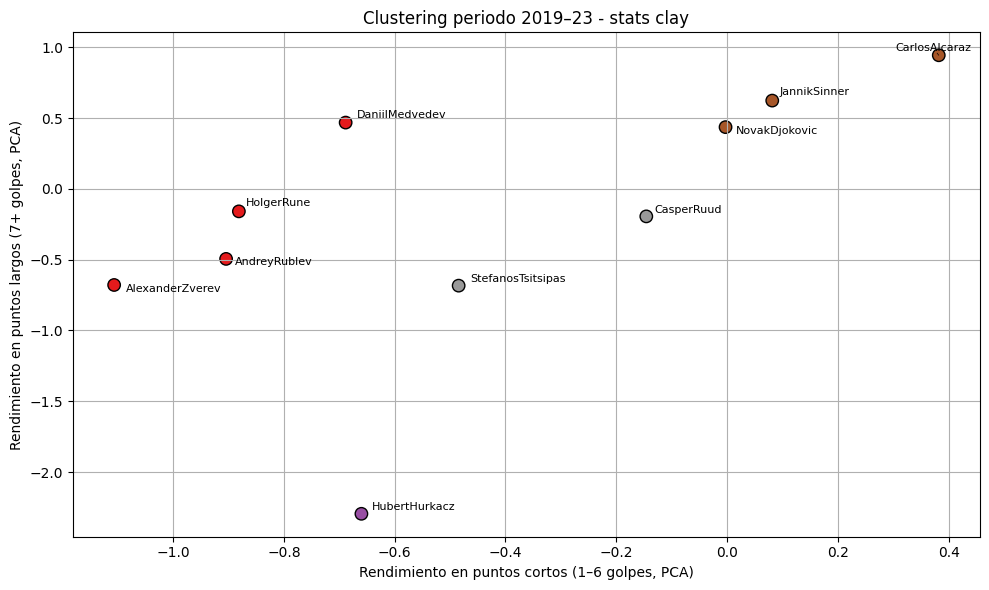


Resumen de clusters - Periodo 2019–23 - clay:
              Player  Score_Serve  Score_Return  Cluster
0    AlexanderZverev    -1.106397     -0.678877        0
1       AndreyRublev    -0.904313     -0.494663        0
5         HolgerRune    -0.881231     -0.158926        0
4     DaniilMedvedev    -0.688526      0.468118        0
6      HubertHurkacz    -0.660062     -2.294948        1
2      CarlosAlcaraz     0.382038      0.943640        2
7       JannikSinner     0.081465      0.623467        2
8      NovakDjokovic    -0.002819      0.436029        2
3         CasperRuud    -0.145864     -0.194336        3
9  StefanosTsitsipas    -0.484556     -0.683616        3


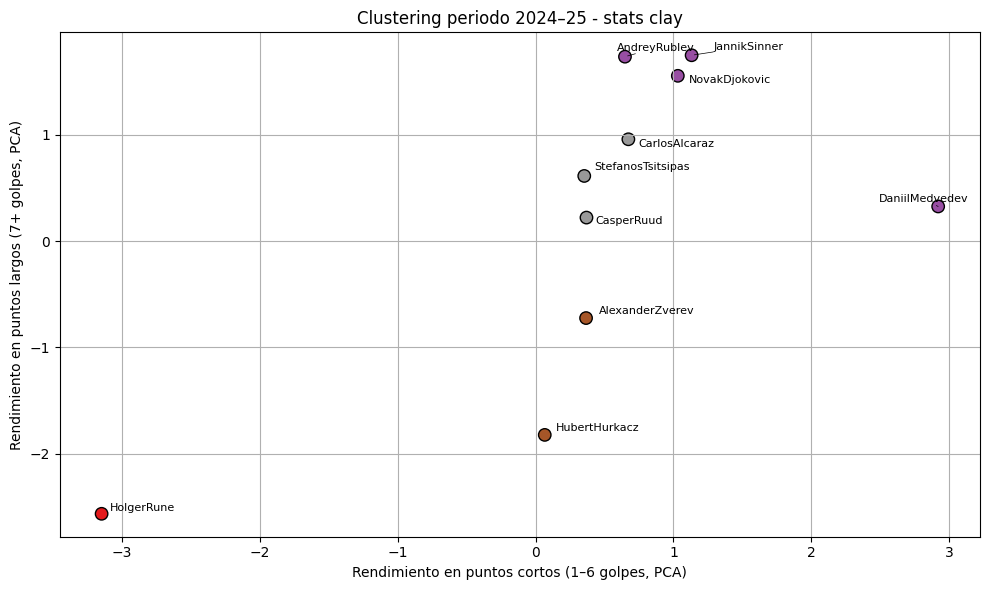


Resumen de clusters - Periodo 2024–25 - clay:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune    -3.149361     -2.564486        0
1       AndreyRublev     0.648265      1.732936        1
4     DaniilMedvedev     2.920896      0.324847        1
7       JannikSinner     1.131888      1.746335        1
8      NovakDjokovic     1.031789      1.553052        1
0    AlexanderZverev     0.365946     -0.724366        2
6      HubertHurkacz     0.066202     -1.822698        2
3         CasperRuud     0.368888      0.220231        3
2      CarlosAlcaraz     0.672956      0.956534        3
9  StefanosTsitsipas     0.352795      0.611728        3


In [94]:
# === Variables a usar ===
serve_vars = ['1-3 W%','4-6 W%']
return_vars = ['7-9 W%','10+ W%']



# === Función para proyectar un dataframe usando los modelos ya entrenados ===
def proyectar_periodo(df, scaler_serve, scaler_return, pca_serve, pca_return):
    df_scaled = df.copy()
    df_scaled["Score_Serve"] = pca_serve.transform(scaler_serve.transform(df[serve_vars]))
    df_scaled["Score_Return"] = pca_return.transform(scaler_return.transform(df[return_vars]))
    return df_scaled

# === Función para graficar los clusters ===
def graficar_clusters(df, periodo, tipo):
    features = df[["Score_Serve", "Score_Return"]]
    kmeans = KMeans(n_clusters=4, random_state=0)
    df["Cluster"] = kmeans.fit_predict(features)

    plt.figure(figsize=(10, 6))
    plt.scatter(df["Score_Serve"], df["Score_Return"], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

    texts = []
    for _, row in df.iterrows():
        texts.append(
            plt.text(row["Score_Serve"], row["Score_Return"], row["Player"], fontsize=8)
        )

    adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.xlabel("Rendimiento en puntos cortos (1–6 golpes, PCA)")
    plt.ylabel("Rendimiento en puntos largos (7+ golpes, PCA)")
    plt.title(f"Clustering periodo {periodo} - stats {tipo}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nResumen de clusters - Periodo {periodo} - {tipo}:")
    print(df[["Player", "Score_Serve", "Score_Return", "Cluster"]].sort_values(by="Cluster"))

# === Bucle principal por superficie ===
for tipo in ["general", "hard", "clay"]:
    print(f"\n========== PROCESANDO: {tipo.upper()} ==========")
    
    # Cargar ambos periodos
    df_2019 = pd.read_csv(rutas[tipo]["2019_23"])
    df_2024 = pd.read_csv(rutas[tipo]["2024_25"])
    
    # Concatenar para escalar y hacer PCA conjunto
    df_all = pd.concat([df_2019, df_2024], ignore_index=True)
    
    # Entrenar escaladores y PCA
    scaler_serve = StandardScaler().fit(df_all[serve_vars])
    scaler_return = StandardScaler().fit(df_all[return_vars])
    
    pca_serve = PCA(n_components=1).fit(scaler_serve.transform(df_all[serve_vars]))
    pca_return = PCA(n_components=1).fit(scaler_return.transform(df_all[return_vars]))

    # Proyectar cada periodo con los modelos conjuntos
    df_2019_proj = proyectar_periodo(df_2019, scaler_serve, scaler_return, pca_serve, pca_return)
    df_2024_proj = proyectar_periodo(df_2024, scaler_serve, scaler_return, pca_serve, pca_return)

    # Graficar
    graficar_clusters(df_2019_proj.copy(), "2019–23", tipo)
    graficar_clusters(df_2024_proj.copy(), "2024–25", tipo)


========== PROCESANDO: GENERAL ==========


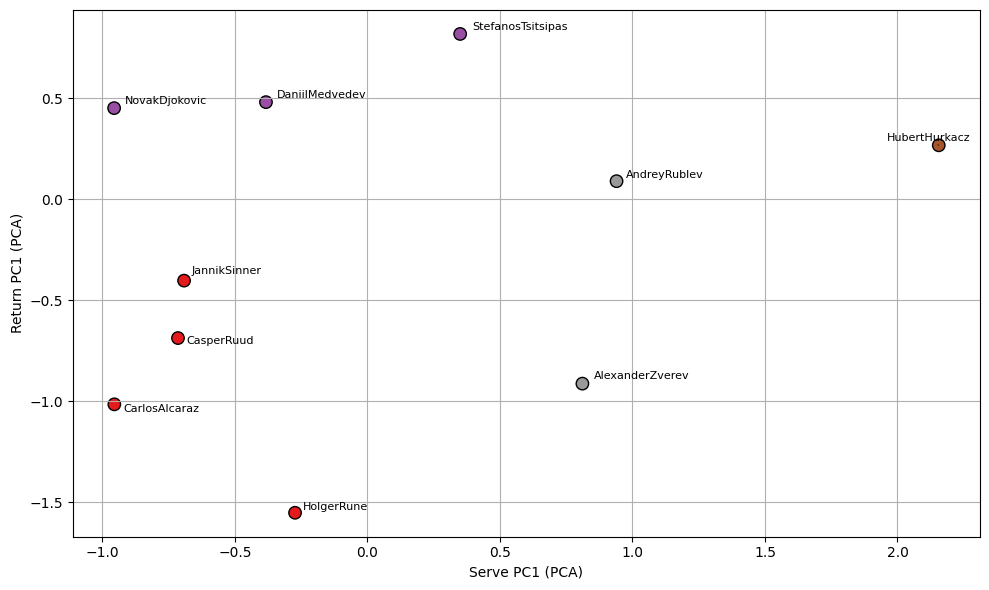


Resumen de clusters - Periodo 2019–23 - general:
              Player  Serve_PC1  Serve_PC2  Return_PC1  Return_PC2  Cluster
3         CasperRuud  -0.714767  -0.475203   -0.686863   -0.692582        0
2      CarlosAlcaraz  -0.954942  -0.384946   -1.014687   -0.963216        0
7       JannikSinner  -0.691819  -0.947904   -0.402596   -0.408315        0
5         HolgerRune  -0.273043  -0.804489   -1.551353   -0.127321        0
4     DaniilMedvedev  -0.382808   0.242260    0.480484   -0.154325        1
8      NovakDjokovic  -0.955709   0.440368    0.450916   -0.812983        1
9  StefanosTsitsipas   0.349954   0.259086    0.817958   -0.102801        1
6      HubertHurkacz   2.155855   0.027319    0.266949    2.034121        2
1       AndreyRublev   0.940069  -0.968179    0.089449    0.655631        3
0    AlexanderZverev   0.811185  -0.876774   -0.912349    0.969203        3


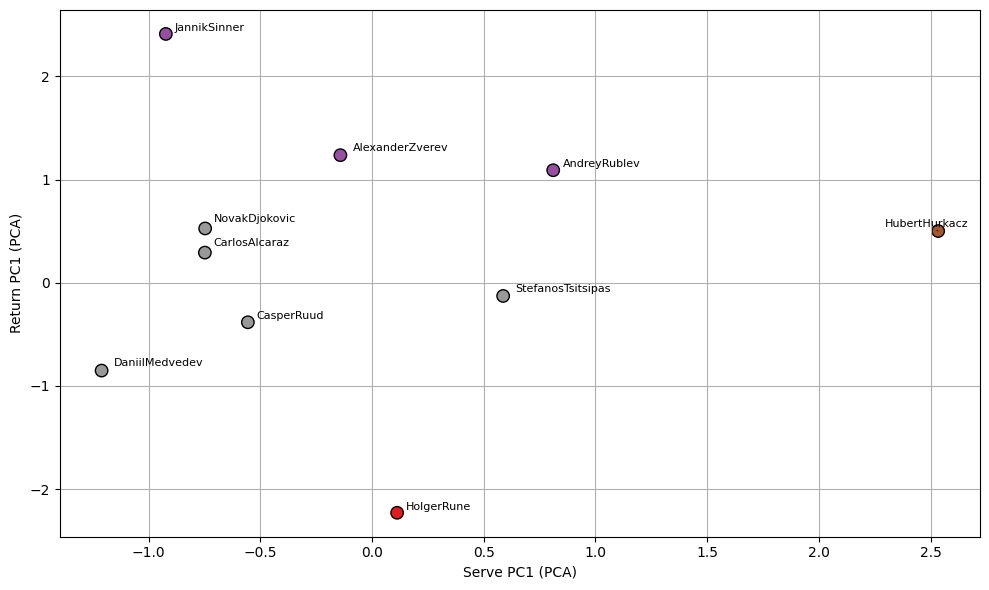


Resumen de clusters - Periodo 2024–25 - general:
              Player  Serve_PC1  Serve_PC2  Return_PC1  Return_PC2  Cluster
5         HolgerRune   0.112082  -2.126598   -2.229311    0.281331        0
0    AlexanderZverev  -0.141874   2.025213    1.235906   -0.371134        1
7       JannikSinner  -0.923206   1.794601    2.410602   -0.797758        1
1       AndreyRublev   0.810797   0.885145    1.089920    0.283541        1
6      HubertHurkacz   2.534090   0.735986    0.500666    2.668168        2
2      CarlosAlcaraz  -0.748426   0.757796    0.291652   -0.743488        3
3         CasperRuud  -0.556053  -0.371562   -0.383296   -0.846535        3
4     DaniilMedvedev  -1.210795  -0.916160   -0.851439   -0.857158        3
8      NovakDjokovic  -0.747279   0.869087    0.525724   -0.738176        3
9  StefanosTsitsipas   0.586688  -0.165045   -0.128333    0.723798        3

========== PROCESANDO: HARD ==========


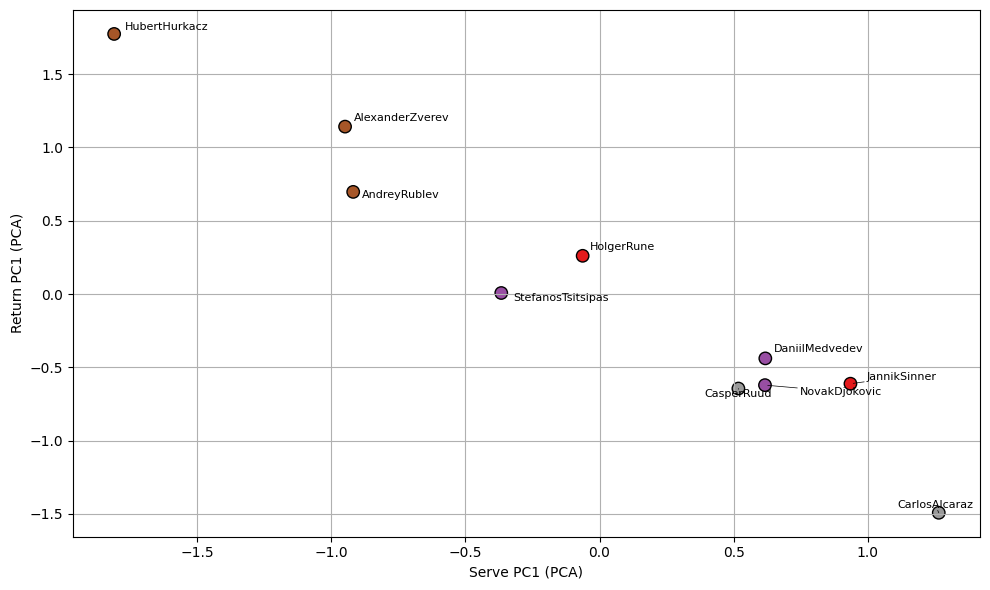


Resumen de clusters - Periodo 2019–23 - hard:
              Player  Serve_PC1  Serve_PC2  Return_PC1  Return_PC2  Cluster
7       JannikSinner   0.935179  -1.409905   -0.611838   -0.635052        0
5         HolgerRune  -0.062944  -0.770065    0.260659   -1.310152        0
4     DaniilMedvedev   0.617873   0.430106   -0.439052    0.672639        1
8      NovakDjokovic   0.616604   1.147943   -0.621449    1.315627        1
9  StefanosTsitsipas  -0.366259   0.205031    0.006934    0.654345        1
6      HubertHurkacz  -1.809185   0.080466    1.774034    0.203223        2
1       AndreyRublev  -0.918189  -0.586602    0.696640    0.260734        2
0    AlexanderZverev  -0.948470  -0.377180    1.141839   -0.480560        2
2      CarlosAlcaraz   1.264331  -0.081995   -1.492229   -0.741644        3
3         CasperRuud   0.517484  -0.589140   -0.644737   -0.667951        3


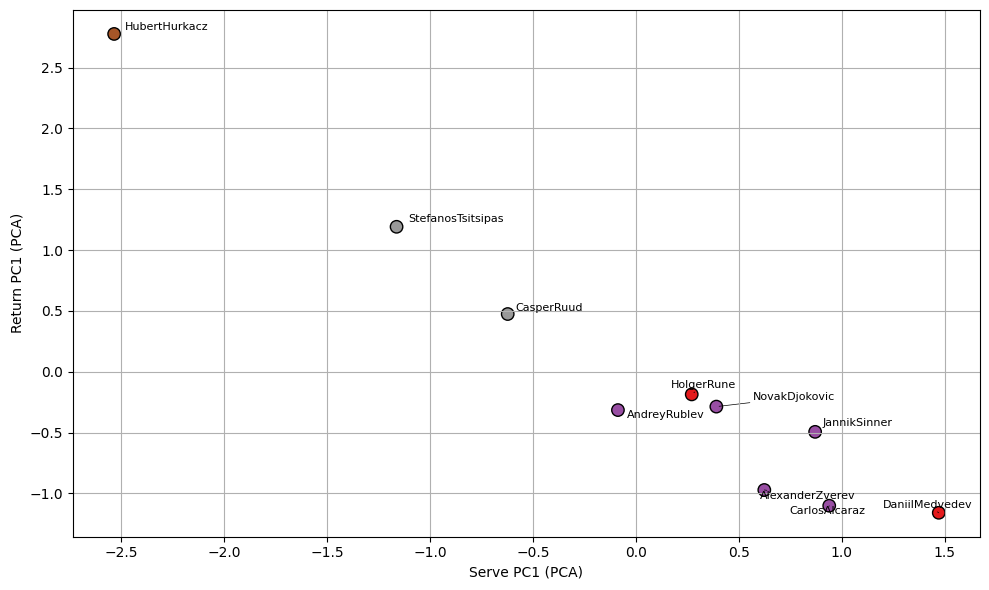


Resumen de clusters - Periodo 2024–25 - hard:
              Player  Serve_PC1  Serve_PC2  Return_PC1  Return_PC2  Cluster
5         HolgerRune   0.270650  -1.954583   -0.186115   -2.014859        0
4     DaniilMedvedev   1.470822  -1.273766   -1.159153   -0.976021        0
0    AlexanderZverev   0.623222   1.633965   -0.971762    0.810555        1
1       AndreyRublev  -0.087876   0.643215   -0.314955    0.384044        1
7       JannikSinner   0.870176   1.521367   -0.493932    2.010597        1
2      CarlosAlcaraz   0.938624   0.870708   -1.101122    0.578021        1
8      NovakDjokovic   0.390259   0.881648   -0.286530    0.618815        1
6      HubertHurkacz  -2.535543   0.672469    2.776680    0.483656        2
3         CasperRuud  -0.623397  -0.970965    0.474506   -1.096306        3
9  StefanosTsitsipas  -1.163361  -0.072717    1.191582   -0.069710        3

========== PROCESANDO: CLAY ==========


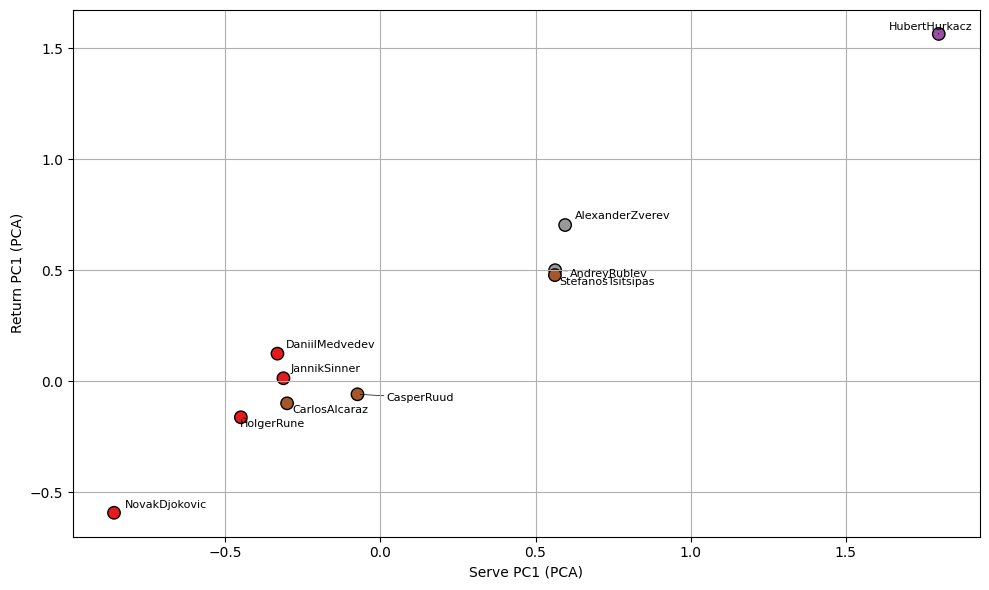


Resumen de clusters - Periodo 2019–23 - clay:
              Player  Serve_PC1  Serve_PC2  Return_PC1  Return_PC2  Cluster
5         HolgerRune  -0.449987  -0.784204   -0.163144   -0.990747        0
7       JannikSinner  -0.312638  -0.921554    0.012744   -0.839900        0
4     DaniilMedvedev  -0.331993  -0.849342    0.123615   -0.503660        0
8      NovakDjokovic  -0.858874  -0.613171   -0.593516   -0.594768        0
6      HubertHurkacz   1.799928   0.427959    1.564359    0.686675        1
2      CarlosAlcaraz  -0.300905   0.097409   -0.100245   -0.176620        2
9  StefanosTsitsipas   0.562468   0.106163    0.477501    0.225840        2
3         CasperRuud  -0.074036  -0.103032   -0.059516   -0.286136        2
1       AndreyRublev   0.563200  -1.480254    0.499678   -0.277842        3
0    AlexanderZverev   0.595403  -0.746043    0.703174   -0.550124        3


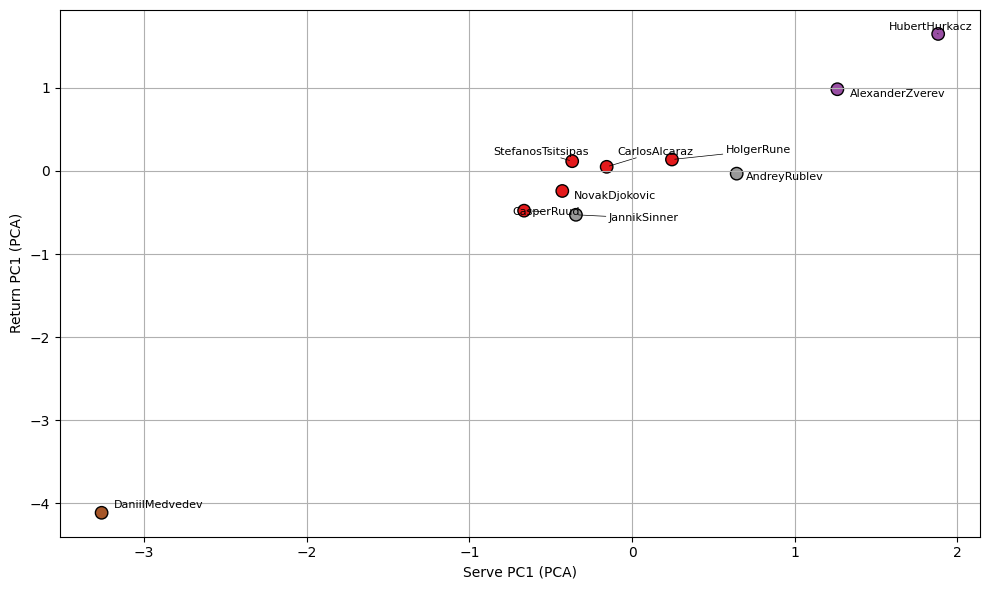


Resumen de clusters - Periodo 2024–25 - clay:
              Player  Serve_PC1  Serve_PC2  Return_PC1  Return_PC2  Cluster
3         CasperRuud  -0.663825  -0.173945   -0.478723   -0.279647        0
2      CarlosAlcaraz  -0.156299  -0.337906    0.048645   -0.703835        0
5         HolgerRune   0.244948  -1.584852    0.136593   -1.342074        0
8      NovakDjokovic  -0.429134   0.304922   -0.241892   -0.017776        0
9  StefanosTsitsipas  -0.368273   0.640482    0.116220    0.140009        0
0    AlexanderZverev   1.261697   1.019046    0.981785    0.529796        1
6      HubertHurkacz   1.881259   0.478769    1.646572    0.518479        1
4     DaniilMedvedev  -3.260633   1.075031   -4.111904    0.344130        2
7       JannikSinner  -0.345190   1.304529   -0.528363    1.799191        3
1       AndreyRublev   0.642884   2.139993   -0.033584    2.319011        3
Varianza PCA Serve: [0.56530058 0.43469942]
Varianza PCA Return: [0.62531596 0.37468404]


In [66]:
# === Variables a usar ===
serve_vars = ['<=3 W%', 'RiP W%_y']
return_vars = ['<=3 W%.1', 'RiP W%.1_y']

# === Función para proyectar un dataframe usando los modelos ya entrenados ===
def proyectar_periodo(df, scaler_serve, scaler_return, pca_serve, pca_return):
    df_scaled = df.copy()
    
    serve_pca = pca_serve.transform(scaler_serve.transform(df[serve_vars]))
    return_pca = pca_return.transform(scaler_return.transform(df[return_vars]))

    df_scaled["Serve_PC1"] = serve_pca[:, 0]
    df_scaled["Serve_PC2"] = serve_pca[:, 1]
    df_scaled["Return_PC1"] = return_pca[:, 0]
    df_scaled["Return_PC2"] = return_pca[:, 1]

    return df_scaled

# === Función para graficar los clusters (usando 2 componentes de cada bloque) ===
def graficar_clusters(df, periodo, tipo):
    features = df[["Serve_PC1", "Serve_PC2", "Return_PC1", "Return_PC2"]]
    kmeans = KMeans(n_clusters=4, random_state=0)
    df["Cluster"] = kmeans.fit_predict(features)

    # Visualización en 2D usando solo los primeros componentes para representar
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Serve_PC1"], df["Return_PC1"], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

    texts = []
    for _, row in df.iterrows():
        texts.append(
            plt.text(row["Serve_PC1"], row["Return_PC1"], row["Player"], fontsize=8)
        )

    adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.xlabel("Serve PC1 (PCA)")
    plt.ylabel("Return PC1 (PCA)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nResumen de clusters - Periodo {periodo} - {tipo}:")
    print(df[["Player", "Serve_PC1", "Serve_PC2", "Return_PC1", "Return_PC2", "Cluster"]].sort_values(by="Cluster"))

# === Bucle principal por superficie ===
for tipo in ["general", "hard", "clay"]:
    print(f"\n========== PROCESANDO: {tipo.upper()} ==========")
    
    # Cargar ambos periodos
    df_2019 = pd.read_csv(rutas[tipo]["2019_23"])
    df_2024 = pd.read_csv(rutas[tipo]["2024_25"])
    
    # Concatenar para escalar y hacer PCA conjunto
    df_all = pd.concat([df_2019, df_2024], ignore_index=True)
    
    # Entrenar escaladores y PCA
    scaler_serve = StandardScaler().fit(df_all[serve_vars])
    scaler_return = StandardScaler().fit(df_all[return_vars])
    
    pca_serve = PCA(n_components=2).fit(scaler_serve.transform(df_all[serve_vars]))
    pca_return = PCA(n_components=2).fit(scaler_return.transform(df_all[return_vars]))

    # Proyectar cada periodo con los modelos conjuntos
    df_2019_proj = proyectar_periodo(df_2019, scaler_serve, scaler_return, pca_serve, pca_return)
    df_2024_proj = proyectar_periodo(df_2024, scaler_serve, scaler_return, pca_serve, pca_return)

    # Graficar
    graficar_clusters(df_2019_proj.copy(), "2019–23", tipo)
    graficar_clusters(df_2024_proj.copy(), "2024–25", tipo)

print("Varianza PCA Serve:", pca_serve.explained_variance_ratio_)
print("Varianza PCA Return:", pca_return.explained_variance_ratio_)




========== PROCESANDO: GENERAL ==========


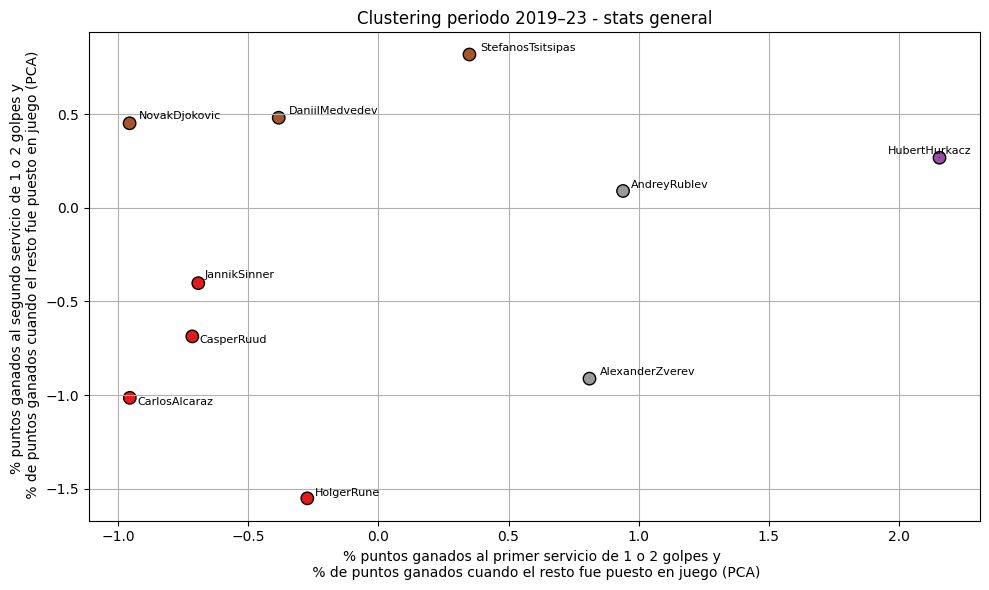


Resumen de clusters - Periodo 2019–23 - general:
              Player  Score_Serve  Score_Return  Cluster
3         CasperRuud    -0.714767     -0.686863        0
2      CarlosAlcaraz    -0.954942     -1.014687        0
7       JannikSinner    -0.691819     -0.402596        0
5         HolgerRune    -0.273043     -1.551353        0
6      HubertHurkacz     2.155855      0.266949        1
4     DaniilMedvedev    -0.382808      0.480484        2
9  StefanosTsitsipas     0.349954      0.817958        2
8      NovakDjokovic    -0.955709      0.450916        2
1       AndreyRublev     0.940069      0.089449        3
0    AlexanderZverev     0.811185     -0.912349        3


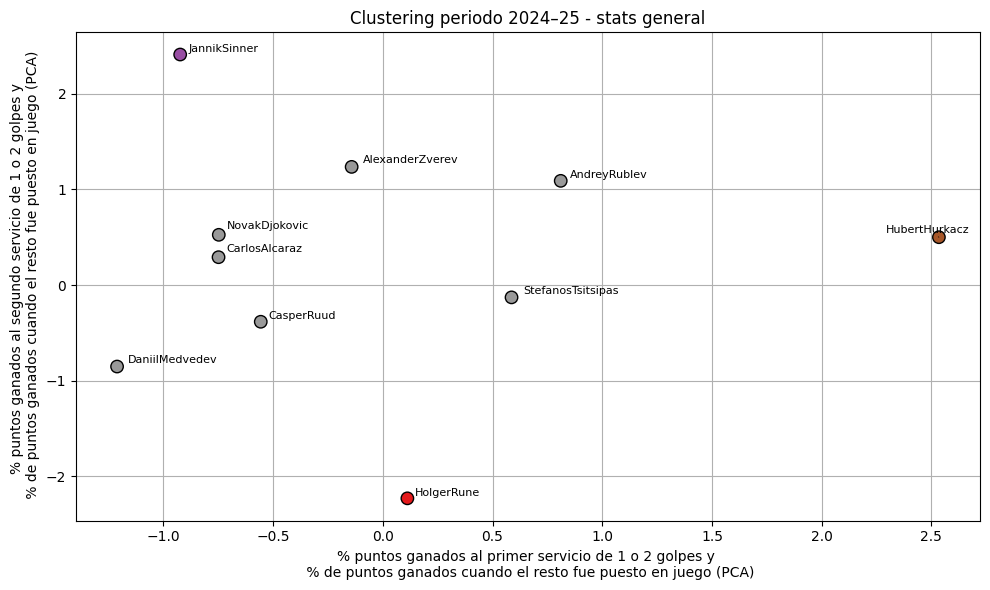


Resumen de clusters - Periodo 2024–25 - general:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune     0.112082     -2.229311        0
7       JannikSinner    -0.923206      2.410602        1
6      HubertHurkacz     2.534090      0.500666        2
0    AlexanderZverev    -0.141874      1.235906        3
3         CasperRuud    -0.556053     -0.383296        3
2      CarlosAlcaraz    -0.748426      0.291652        3
1       AndreyRublev     0.810797      1.089920        3
4     DaniilMedvedev    -1.210795     -0.851439        3
8      NovakDjokovic    -0.747279      0.525724        3
9  StefanosTsitsipas     0.586688     -0.128333        3

========== PROCESANDO: HARD ==========


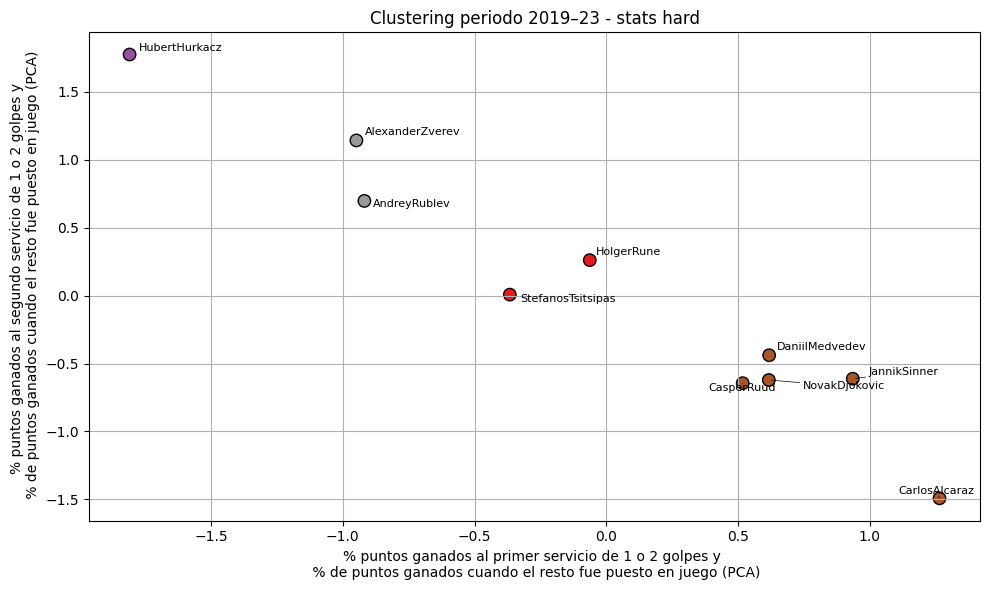


Resumen de clusters - Periodo 2019–23 - hard:
              Player  Score_Serve  Score_Return  Cluster
5         HolgerRune    -0.062944      0.260659        0
9  StefanosTsitsipas    -0.366259      0.006934        0
6      HubertHurkacz    -1.809185      1.774034        1
3         CasperRuud     0.517484     -0.644737        2
4     DaniilMedvedev     0.617873     -0.439052        2
7       JannikSinner     0.935179     -0.611838        2
8      NovakDjokovic     0.616604     -0.621449        2
2      CarlosAlcaraz     1.264331     -1.492229        2
1       AndreyRublev    -0.918189      0.696640        3
0    AlexanderZverev    -0.948470      1.141839        3


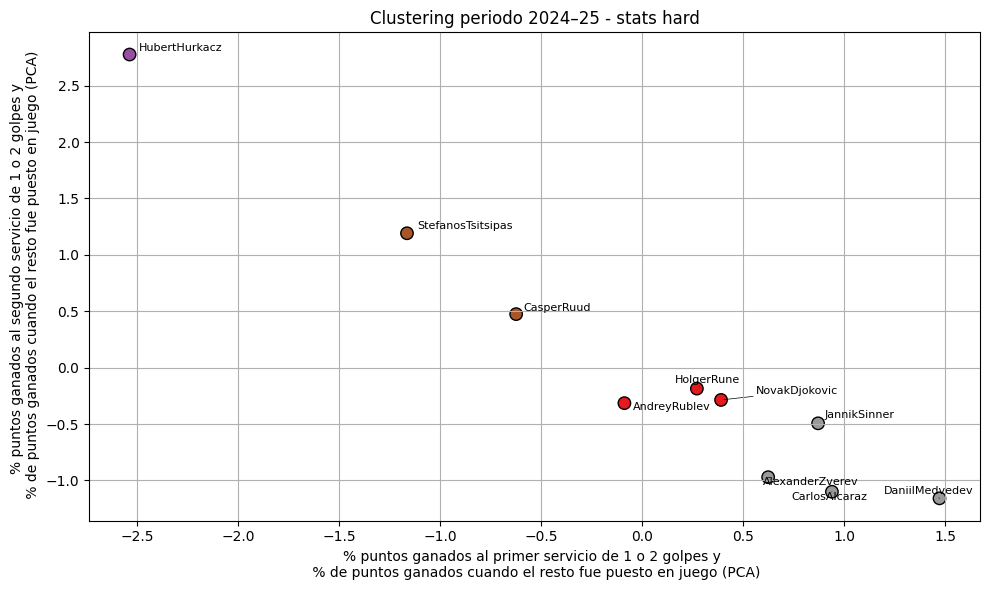


Resumen de clusters - Periodo 2024–25 - hard:
              Player  Score_Serve  Score_Return  Cluster
1       AndreyRublev    -0.087876     -0.314955        0
5         HolgerRune     0.270650     -0.186115        0
8      NovakDjokovic     0.390259     -0.286530        0
6      HubertHurkacz    -2.535543      2.776680        1
9  StefanosTsitsipas    -1.163361      1.191582        2
3         CasperRuud    -0.623397      0.474506        2
2      CarlosAlcaraz     0.938624     -1.101122        3
0    AlexanderZverev     0.623222     -0.971762        3
7       JannikSinner     0.870176     -0.493932        3
4     DaniilMedvedev     1.470822     -1.159153        3

========== PROCESANDO: CLAY ==========


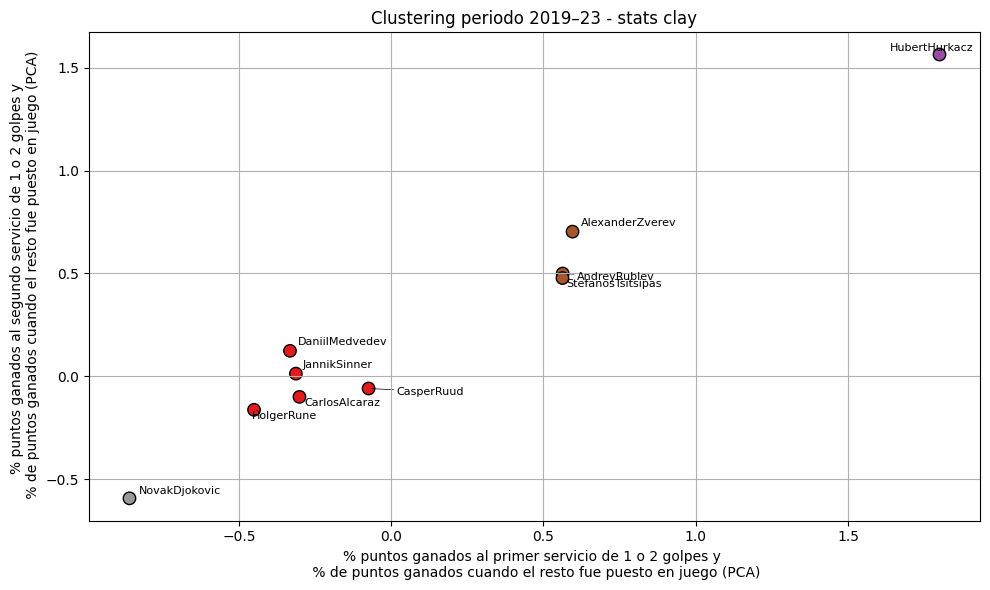


Resumen de clusters - Periodo 2019–23 - clay:
              Player  Score_Serve  Score_Return  Cluster
3         CasperRuud    -0.074036     -0.059516        0
2      CarlosAlcaraz    -0.300905     -0.100245        0
5         HolgerRune    -0.449987     -0.163144        0
4     DaniilMedvedev    -0.331993      0.123615        0
7       JannikSinner    -0.312638      0.012744        0
6      HubertHurkacz     1.799928      1.564359        1
0    AlexanderZverev     0.595403      0.703174        2
1       AndreyRublev     0.563200      0.499678        2
9  StefanosTsitsipas     0.562468      0.477501        2
8      NovakDjokovic    -0.858874     -0.593516        3


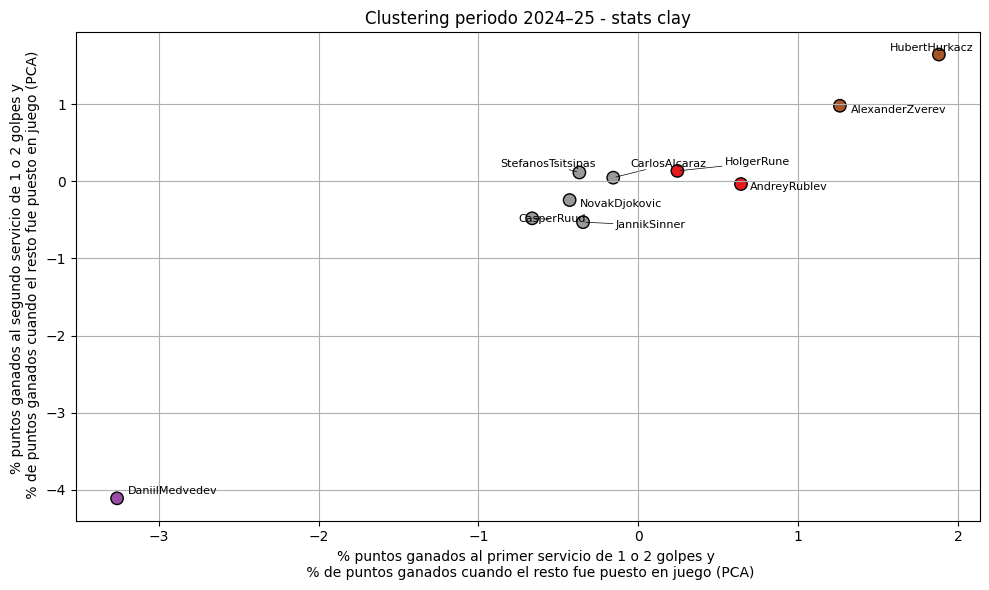


Resumen de clusters - Periodo 2024–25 - clay:
              Player  Score_Serve  Score_Return  Cluster
1       AndreyRublev     0.642884     -0.033584        0
5         HolgerRune     0.244948      0.136593        0
4     DaniilMedvedev    -3.260633     -4.111904        1
0    AlexanderZverev     1.261697      0.981785        2
6      HubertHurkacz     1.881259      1.646572        2
2      CarlosAlcaraz    -0.156299      0.048645        3
3         CasperRuud    -0.663825     -0.478723        3
7       JannikSinner    -0.345190     -0.528363        3
8      NovakDjokovic    -0.429134     -0.241892        3
9  StefanosTsitsipas    -0.368273      0.116220        3


In [69]:
# === Variables a usar ===
serve_vars = ['<=3 W%','RiP W%_y']
return_vars = ['<=3 W%.1','RiP W%.1_y']



# === Función para proyectar un dataframe usando los modelos ya entrenados ===
def proyectar_periodo(df, scaler_serve, scaler_return, pca_serve, pca_return):
    df_scaled = df.copy()
    df_scaled["Score_Serve"] = pca_serve.transform(scaler_serve.transform(df[serve_vars]))
    df_scaled["Score_Return"] = pca_return.transform(scaler_return.transform(df[return_vars]))
    return df_scaled

# === Función para graficar los clusters ===
def graficar_clusters(df, periodo, tipo):
    features = df[["Score_Serve", "Score_Return"]]
    kmeans = KMeans(n_clusters=4, random_state=0)
    df["Cluster"] = kmeans.fit_predict(features)

    plt.figure(figsize=(10, 6))
    plt.scatter(df["Score_Serve"], df["Score_Return"], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

    texts = []
    for _, row in df.iterrows():
        texts.append(
            plt.text(row["Score_Serve"], row["Score_Return"], row["Player"], fontsize=8)
        )

    adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.xlabel("% puntos ganados al primer servicio de 1 o 2 golpes y \n % de puntos ganados cuando el resto fue puesto en juego (PCA)")
    plt.ylabel("% puntos ganados al segundo servicio de 1 o 2 golpes y \n % de puntos ganados cuando el resto fue puesto en juego (PCA)")
    plt.grid(True)
    plt.title(f"Clustering periodo {periodo} - stats {tipo}")

    plt.tight_layout()
    plt.show()

    print(f"\nResumen de clusters - Periodo {periodo} - {tipo}:")
    print(df[["Player", "Score_Serve", "Score_Return", "Cluster"]].sort_values(by="Cluster"))

# === Bucle principal por superficie ===
for tipo in ["general", "hard", "clay"]:
    print(f"\n========== PROCESANDO: {tipo.upper()} ==========")
    
    # Cargar ambos periodos
    df_2019 = pd.read_csv(rutas[tipo]["2019_23"])
    df_2024 = pd.read_csv(rutas[tipo]["2024_25"])
    
    # Concatenar para escalar y hacer PCA conjunto
    df_all = pd.concat([df_2019, df_2024], ignore_index=True)
    
    # Entrenar escaladores y PCA
    scaler_serve = StandardScaler().fit(df_all[serve_vars])
    scaler_return = StandardScaler().fit(df_all[return_vars])
    
    pca_serve = PCA(n_components=1).fit(scaler_serve.transform(df_all[serve_vars]))
    pca_return = PCA(n_components=1).fit(scaler_return.transform(df_all[return_vars]))

    # Proyectar cada periodo con los modelos conjuntos
    df_2019_proj = proyectar_periodo(df_2019, scaler_serve, scaler_return, pca_serve, pca_return)
    df_2024_proj = proyectar_periodo(df_2024, scaler_serve, scaler_return, pca_serve, pca_return)

    # Graficar
    graficar_clusters(df_2019_proj.copy(), "2019–23", tipo)
    graficar_clusters(df_2024_proj.copy(), "2024–25", tipo)


Procesando: GENERAL - 2019_23


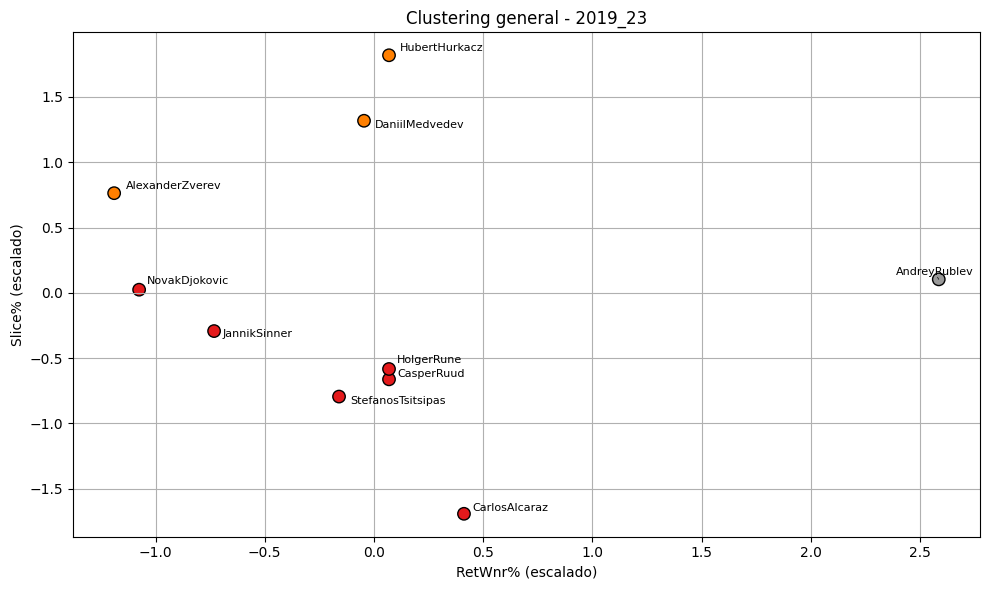


Procesando: GENERAL - 2024_25


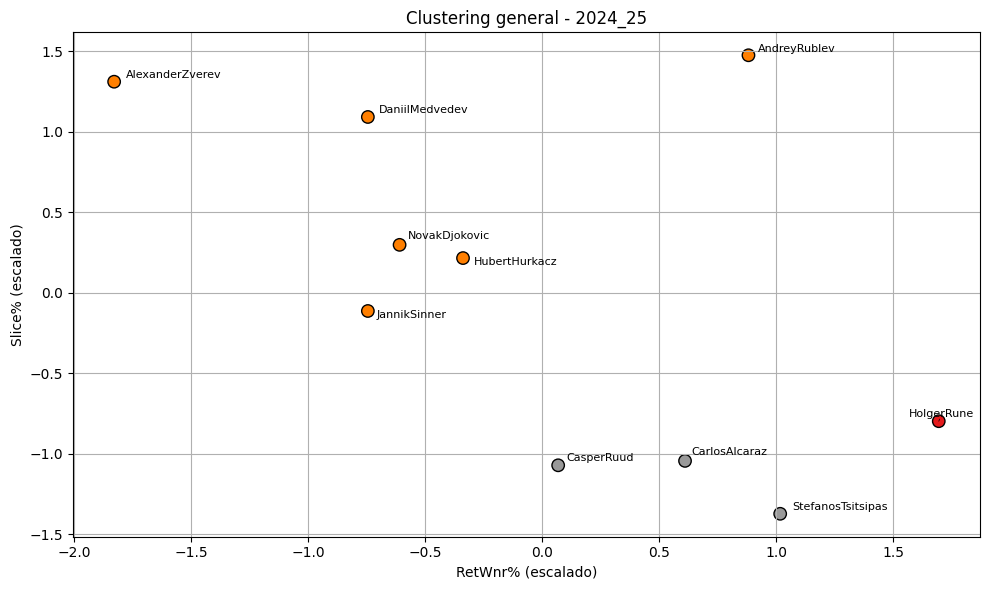


Procesando: HARD - 2019_23


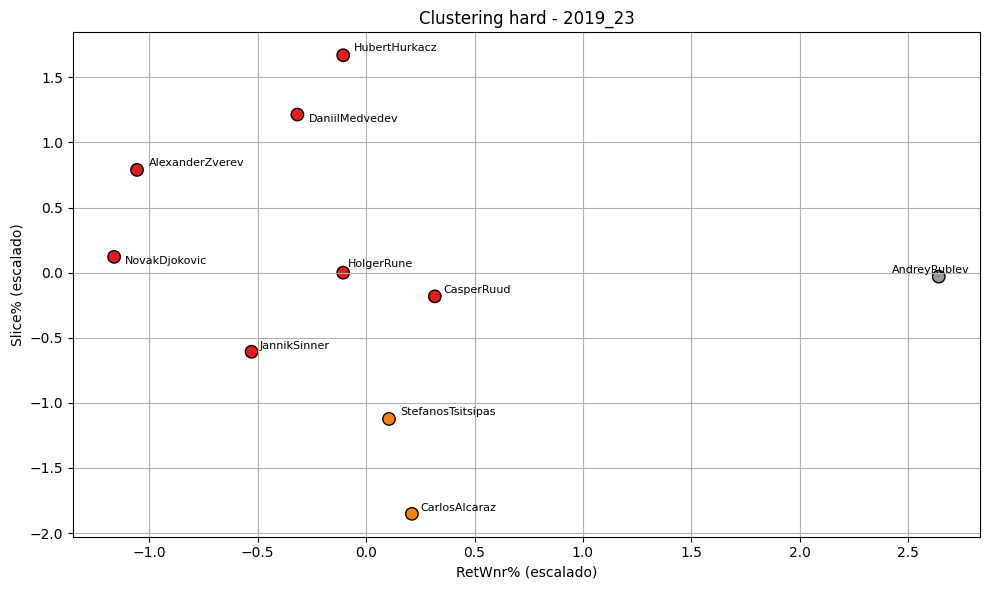


Procesando: HARD - 2024_25


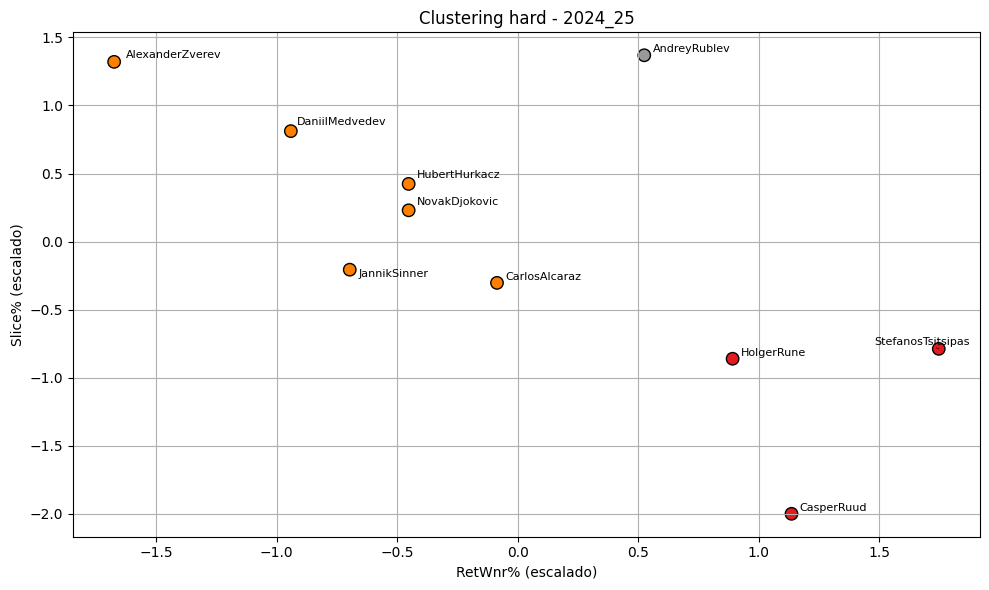


Procesando: CLAY - 2019_23


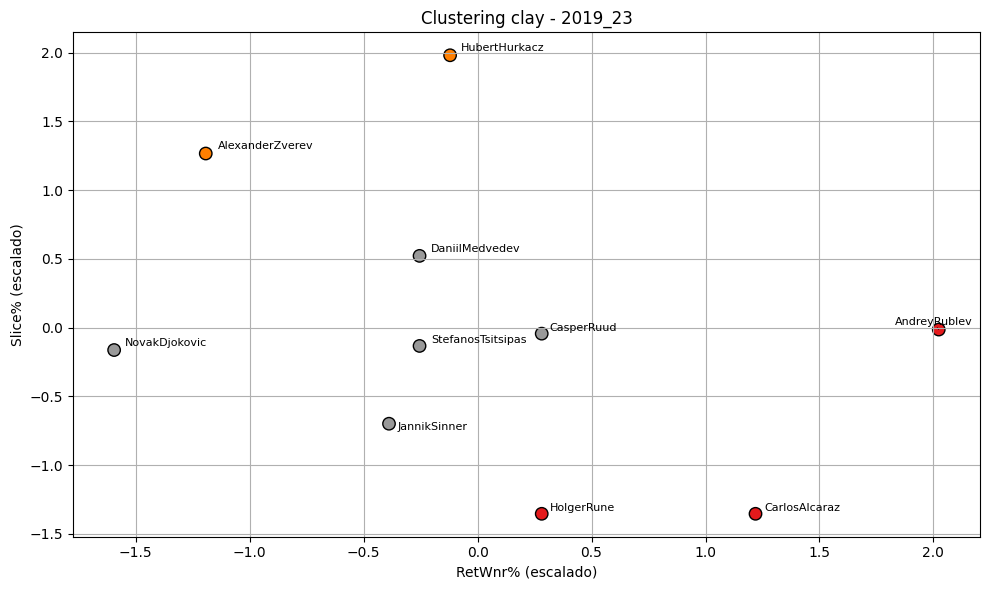


Procesando: CLAY - 2024_25


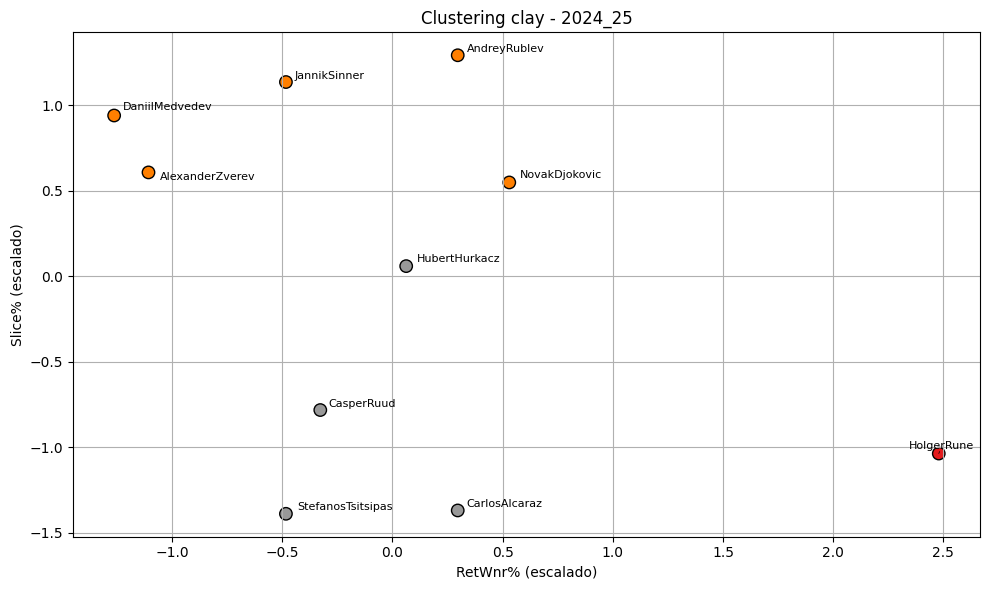


=== COMPARATIVA GLOBAL ===
               Player  RetWnr%  Slice%  Cluster Superficie  Periodo
41       AndreyRublev      4.6    10.7        0       clay  2019_23
42      CarlosAlcaraz      4.0     6.2        0       clay  2019_23
45         HolgerRune      3.3     6.2        0       clay  2019_23
40    AlexanderZverev      2.2    15.0        1       clay  2019_23
46      HubertHurkacz      3.0    17.4        1       clay  2019_23
43         CasperRuud      3.3    10.6        2       clay  2019_23
44     DaniilMedvedev      2.9    12.5        2       clay  2019_23
47       JannikSinner      2.8     8.4        2       clay  2019_23
48      NovakDjokovic      1.9    10.2        2       clay  2019_23
49  StefanosTsitsipas      2.9    10.3        2       clay  2019_23
55         HolgerRune      6.4     7.5        0       clay  2024_25
50    AlexanderZverev      1.8    15.9        1       clay  2024_25
51       AndreyRublev      3.6    19.4        1       clay  2024_25
54     DaniilMedvede

In [74]:
# === Variables a comparar ===
var1 = "RetWnr%"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "Slice%" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


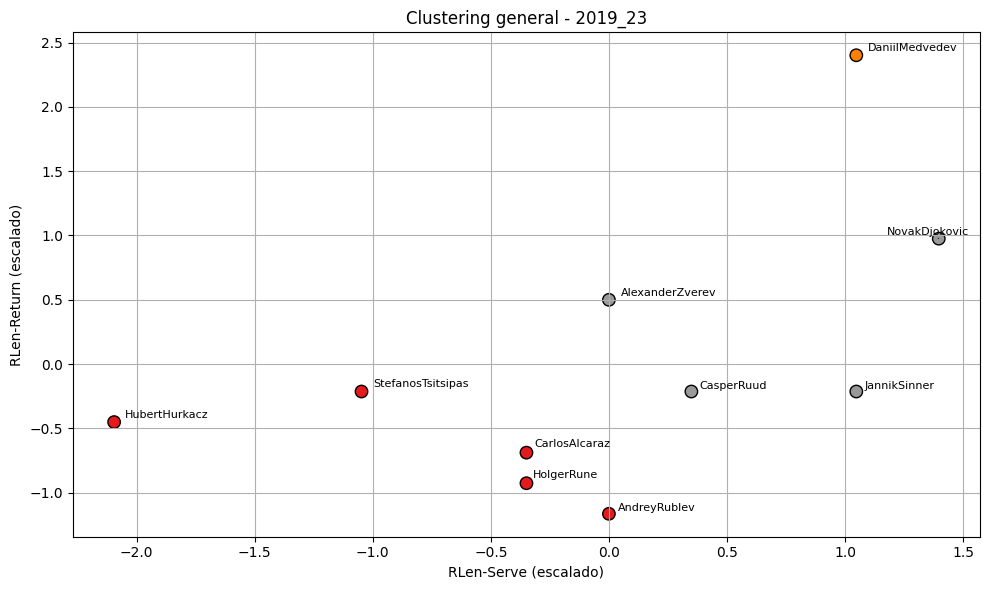


Procesando: GENERAL - 2024_25


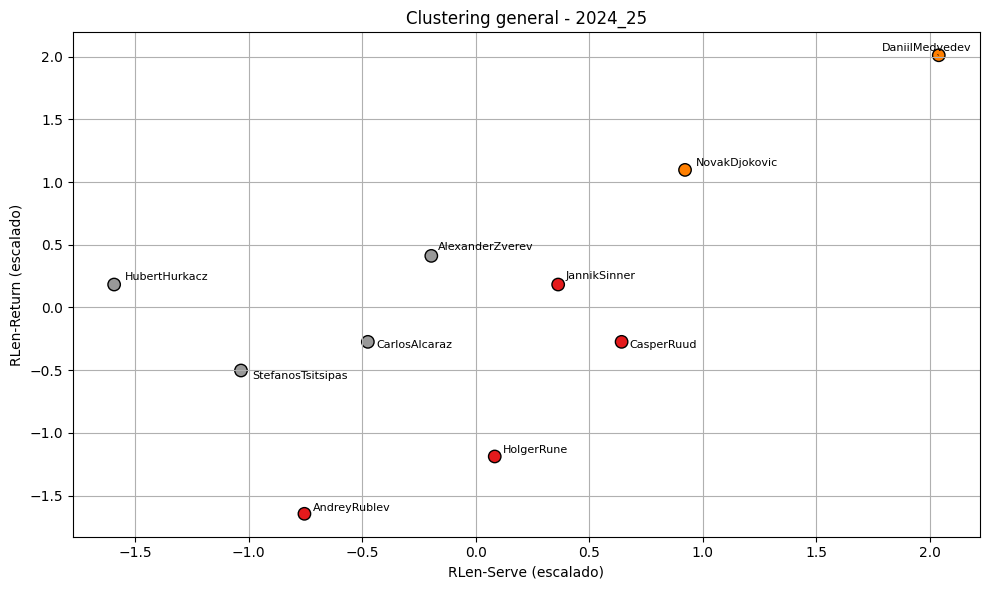


Procesando: HARD - 2019_23


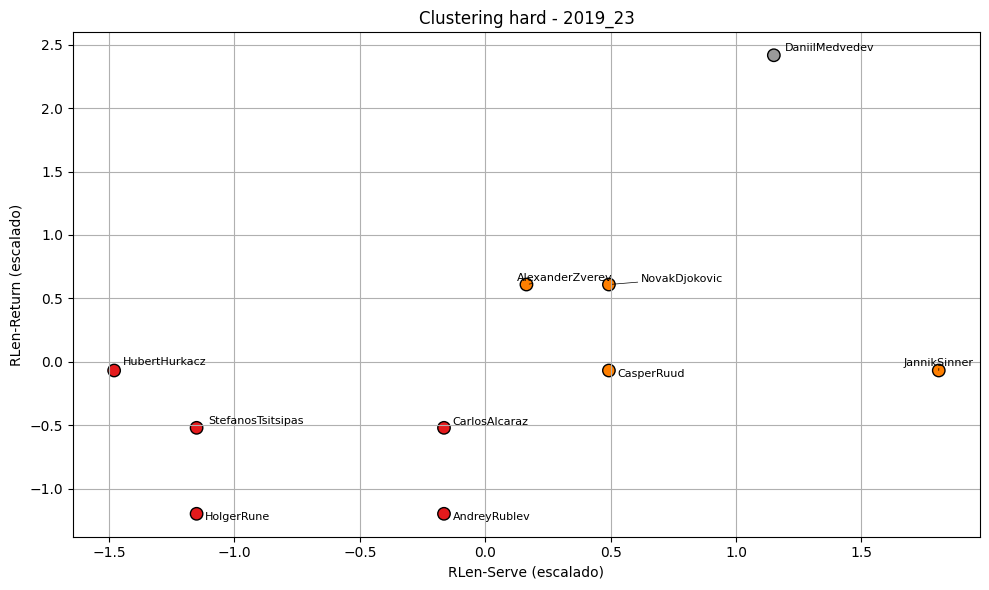


Procesando: HARD - 2024_25


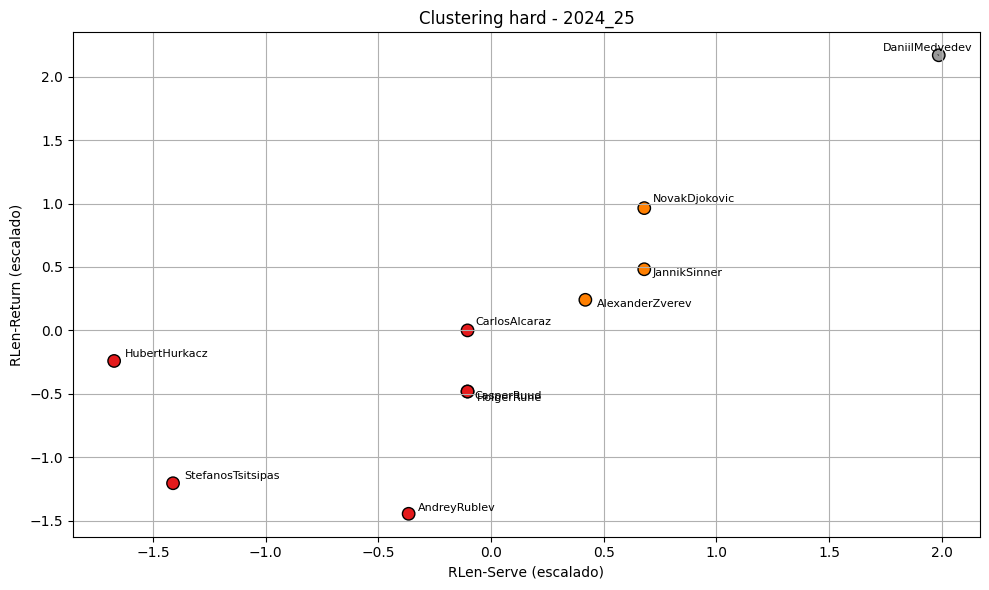


Procesando: CLAY - 2019_23


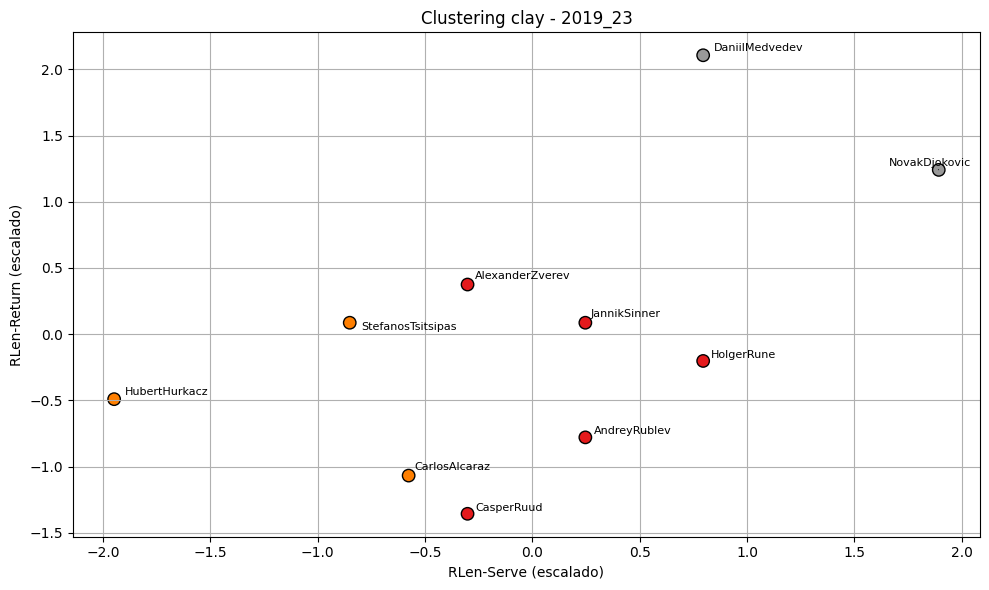


Procesando: CLAY - 2024_25


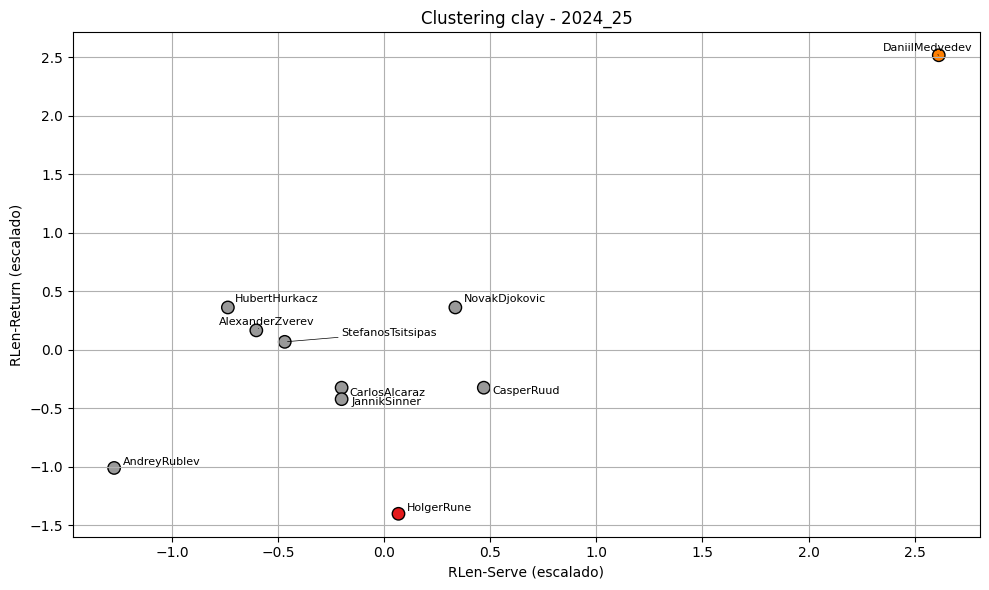


=== COMPARATIVA GLOBAL ===
               Player  RLen-Serve  RLen-Return  Cluster Superficie  Periodo
40    AlexanderZverev         4.3          4.8        0       clay  2019_23
41       AndreyRublev         4.5          4.4        0       clay  2019_23
43         CasperRuud         4.3          4.2        0       clay  2019_23
45         HolgerRune         4.7          4.6        0       clay  2019_23
47       JannikSinner         4.5          4.7        0       clay  2019_23
42      CarlosAlcaraz         4.2          4.3        1       clay  2019_23
46      HubertHurkacz         3.7          4.5        1       clay  2019_23
49  StefanosTsitsipas         4.1          4.7        1       clay  2019_23
44     DaniilMedvedev         4.7          5.4        2       clay  2019_23
48      NovakDjokovic         5.1          5.1        2       clay  2019_23
55         HolgerRune         4.4          3.2        0       clay  2024_25
54     DaniilMedvedev         6.3          7.2        1     

In [77]:
# === Variables a comparar ===
var1 = "RLen-Serve"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "RLen-Return" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


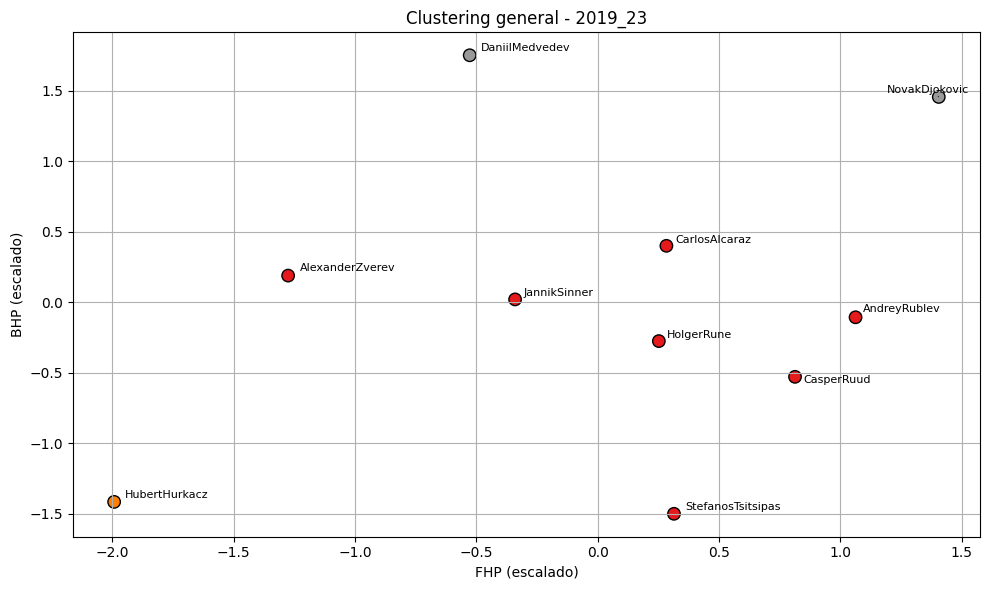


Procesando: GENERAL - 2024_25


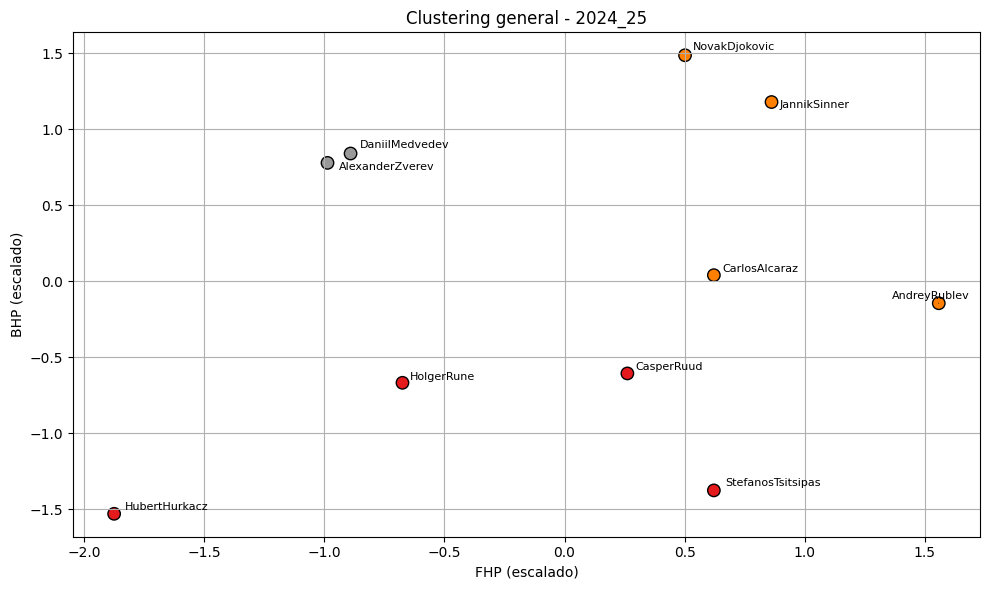


Procesando: HARD - 2019_23


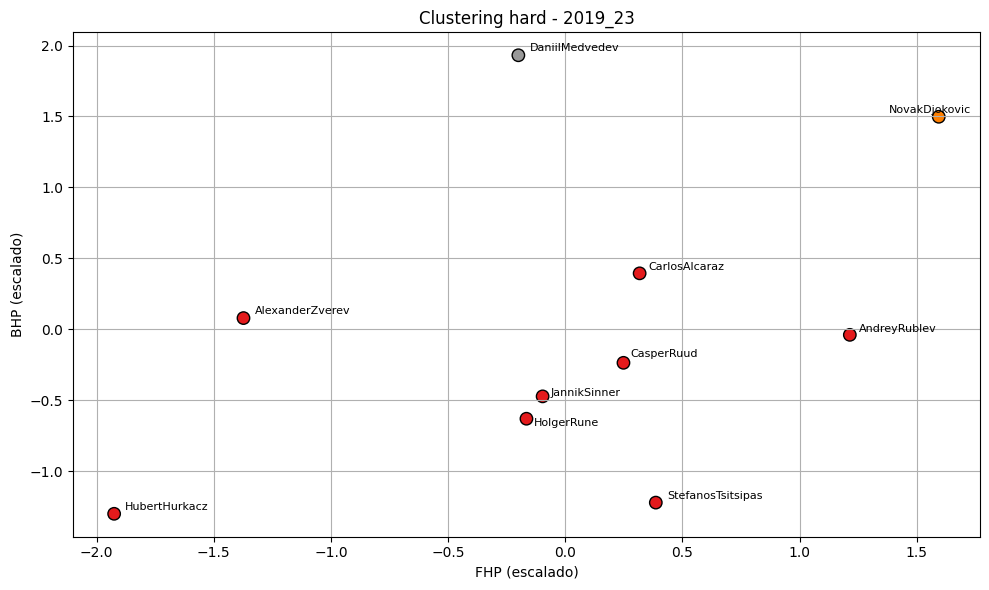


Procesando: HARD - 2024_25


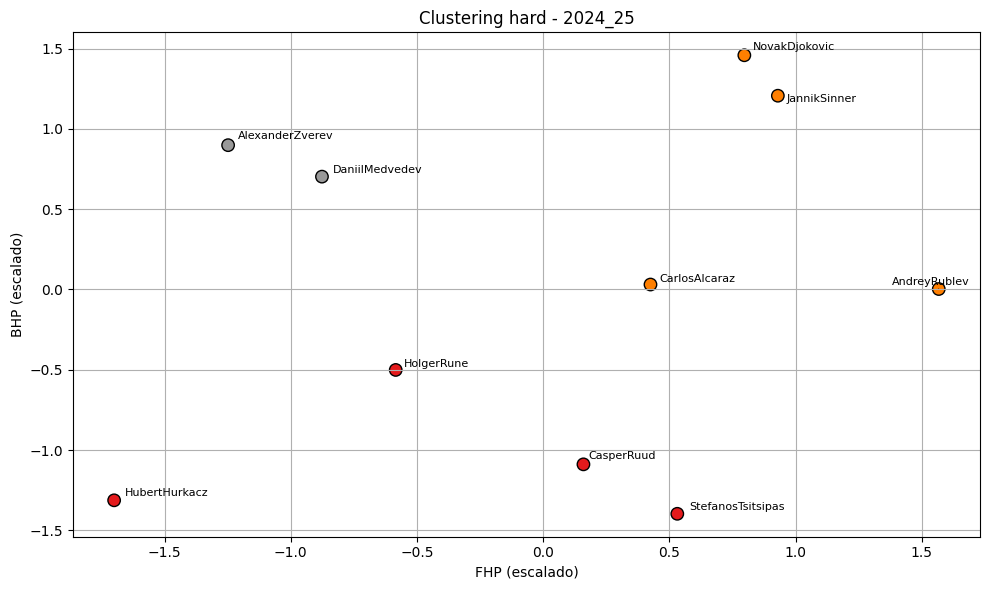


Procesando: CLAY - 2019_23


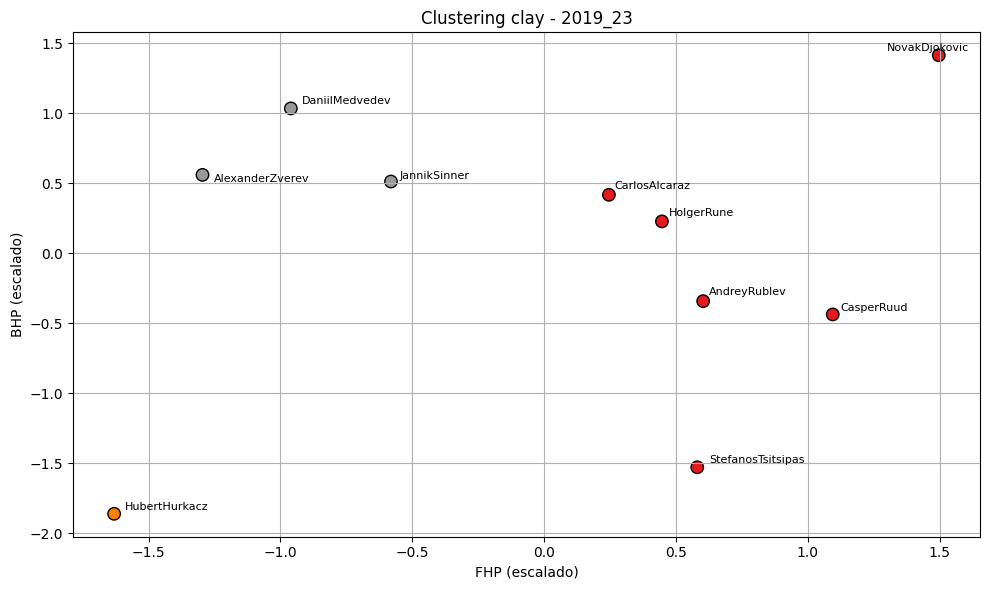


Procesando: CLAY - 2024_25


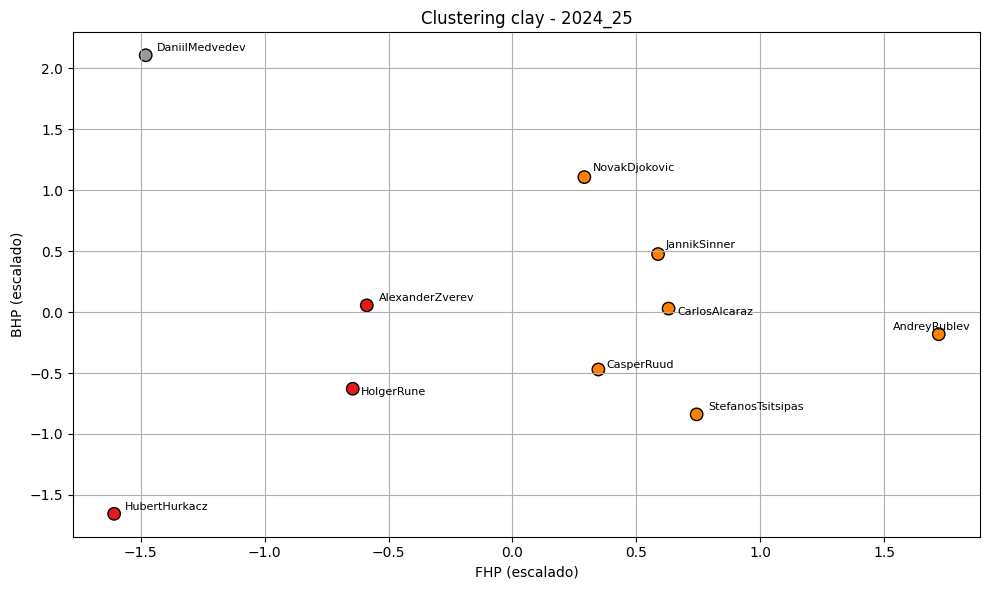


=== COMPARATIVA GLOBAL ===
               Player   FHP   BHP  Cluster Superficie  Periodo
41       AndreyRublev  12.3  -0.5        0       clay  2019_23
42      CarlosAlcaraz  10.7   1.1        0       clay  2019_23
43         CasperRuud  14.5  -0.7        0       clay  2019_23
45         HolgerRune  11.6   0.7        0       clay  2019_23
48      NovakDjokovic  16.3   3.2        0       clay  2019_23
49  StefanosTsitsipas  12.2  -3.0        0       clay  2019_23
46      HubertHurkacz   2.3  -3.7        1       clay  2019_23
40    AlexanderZverev   3.8   1.4        2       clay  2019_23
44     DaniilMedvedev   5.3   2.4        2       clay  2019_23
47       JannikSinner   7.0   1.3        2       clay  2019_23
50    AlexanderZverev   6.8   3.7        0       clay  2024_25
55         HolgerRune   6.4   1.1        0       clay  2024_25
56      HubertHurkacz  -0.4  -2.8        0       clay  2024_25
51       AndreyRublev  23.1   2.8        1       clay  2024_25
52      CarlosAlcaraz  15.4

In [79]:
# === Variables a comparar ===
var1 = "FHP"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "BHP" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


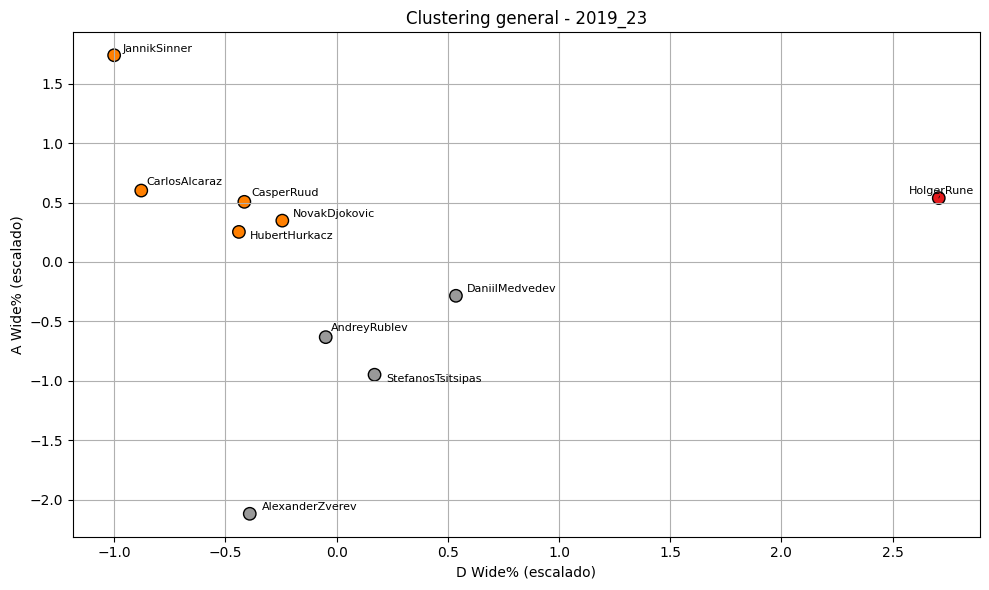


Procesando: GENERAL - 2024_25


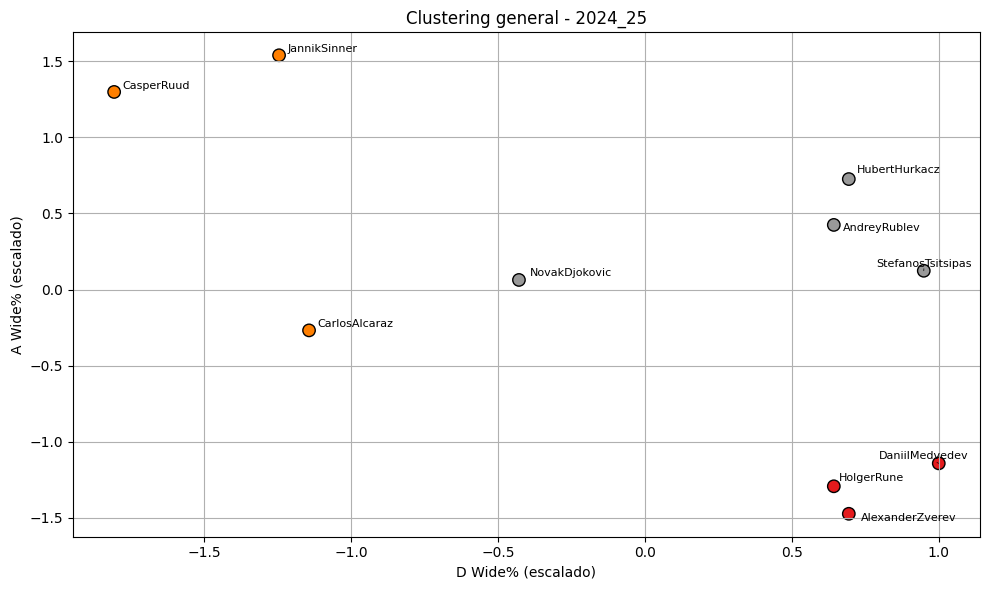


Procesando: HARD - 2019_23


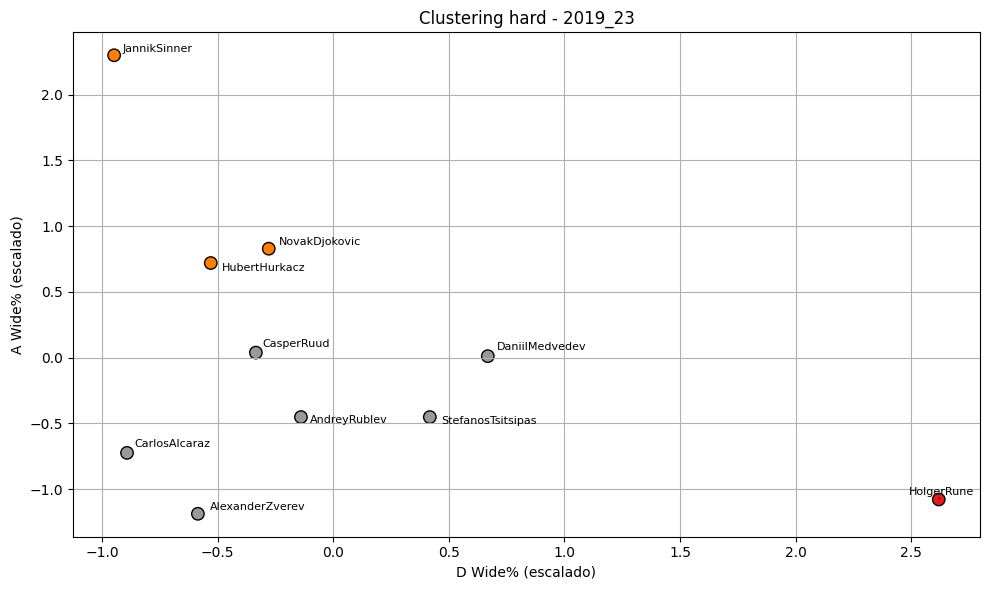


Procesando: HARD - 2024_25


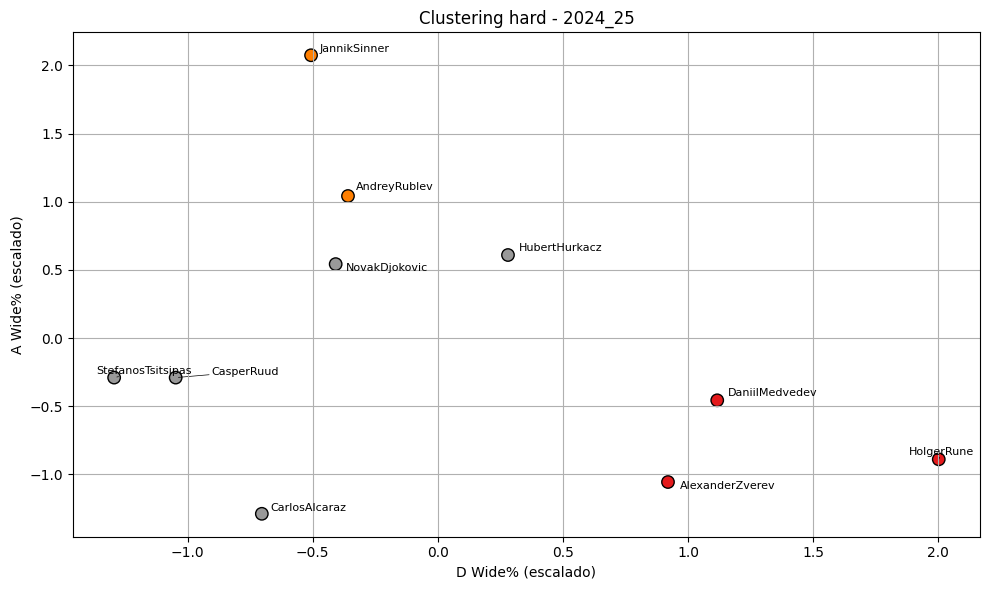


Procesando: CLAY - 2019_23


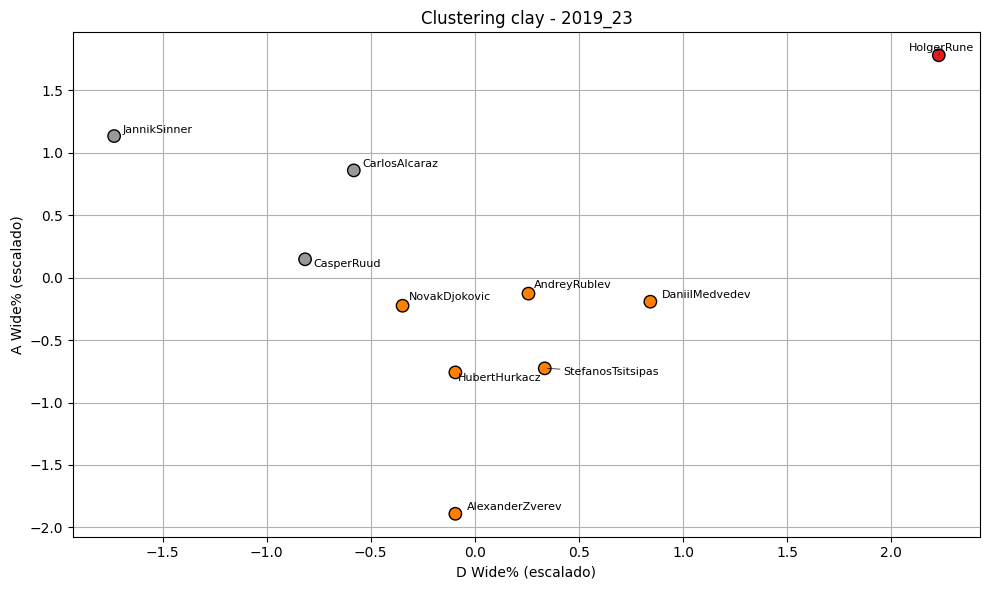


Procesando: CLAY - 2024_25


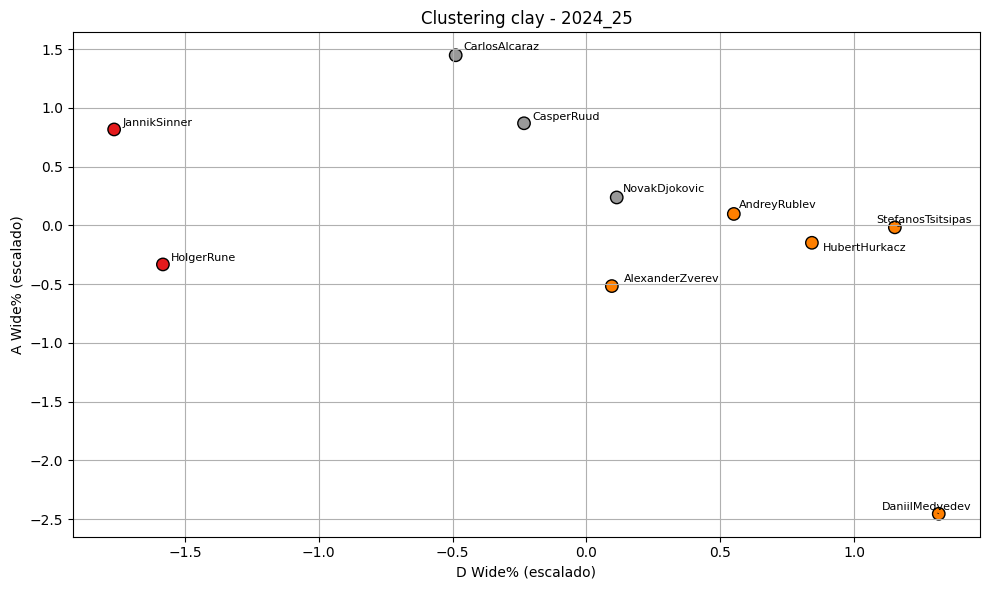


=== COMPARATIVA GLOBAL ===
               Player  D Wide%  A Wide%  Cluster Superficie  Periodo
45         HolgerRune     62.3     63.1        0       clay  2019_23
40    AlexanderZverev     50.4     40.4        1       clay  2019_23
41       AndreyRublev     52.2     51.3        1       clay  2019_23
44     DaniilMedvedev     55.2     50.9        1       clay  2019_23
46      HubertHurkacz     50.4     47.4        1       clay  2019_23
48      NovakDjokovic     49.1     50.7        1       clay  2019_23
49  StefanosTsitsipas     52.6     47.6        1       clay  2019_23
42      CarlosAlcaraz     47.9     57.4        2       clay  2019_23
43         CasperRuud     46.7     53.0        2       clay  2019_23
47       JannikSinner     42.0     59.1        2       clay  2019_23
55         HolgerRune     41.2     47.7        0       clay  2024_25
57       JannikSinner     40.2     60.8        0       clay  2024_25
50    AlexanderZverev     50.4     45.6        1       clay  2024_25
51    

In [80]:
# === Variables a comparar ===
var1 = "D Wide%"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "A Wide%" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


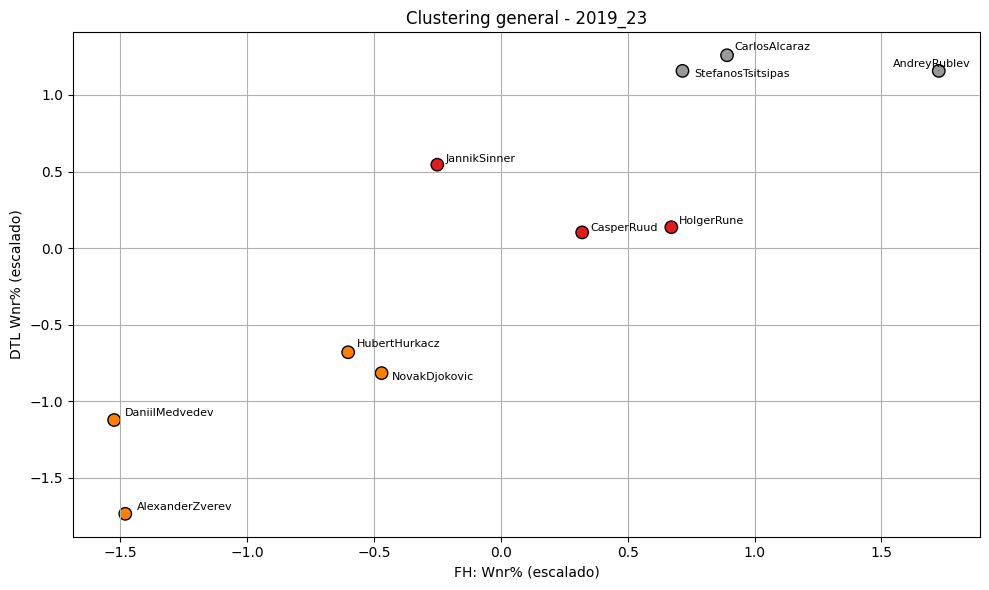


Procesando: GENERAL - 2024_25


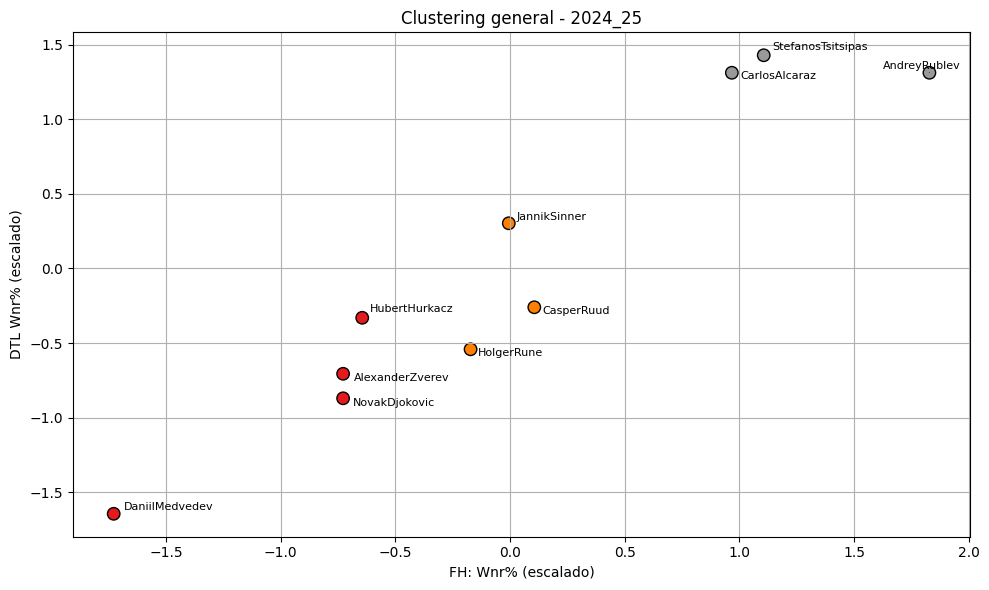


Procesando: HARD - 2019_23


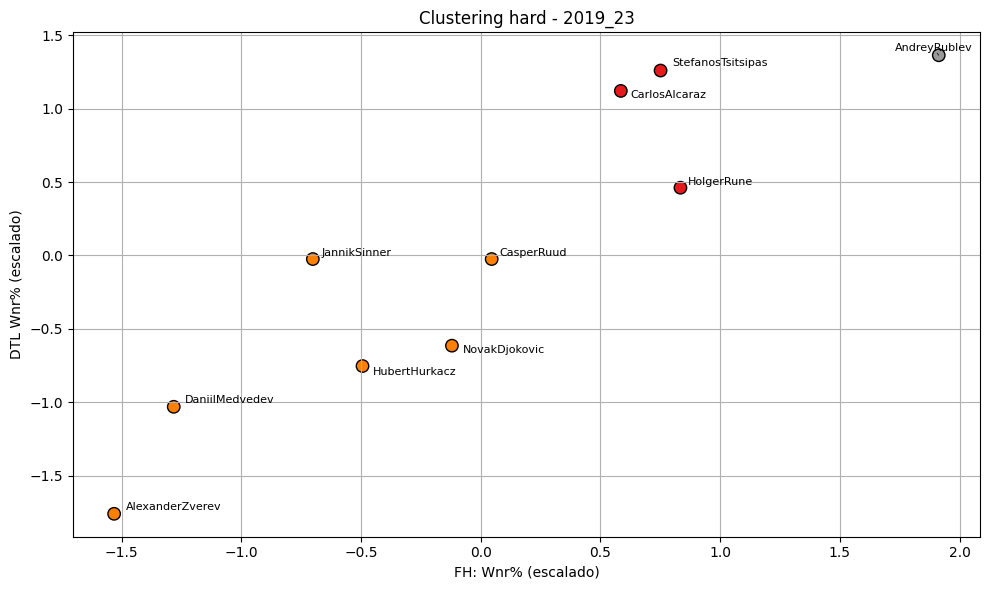


Procesando: HARD - 2024_25


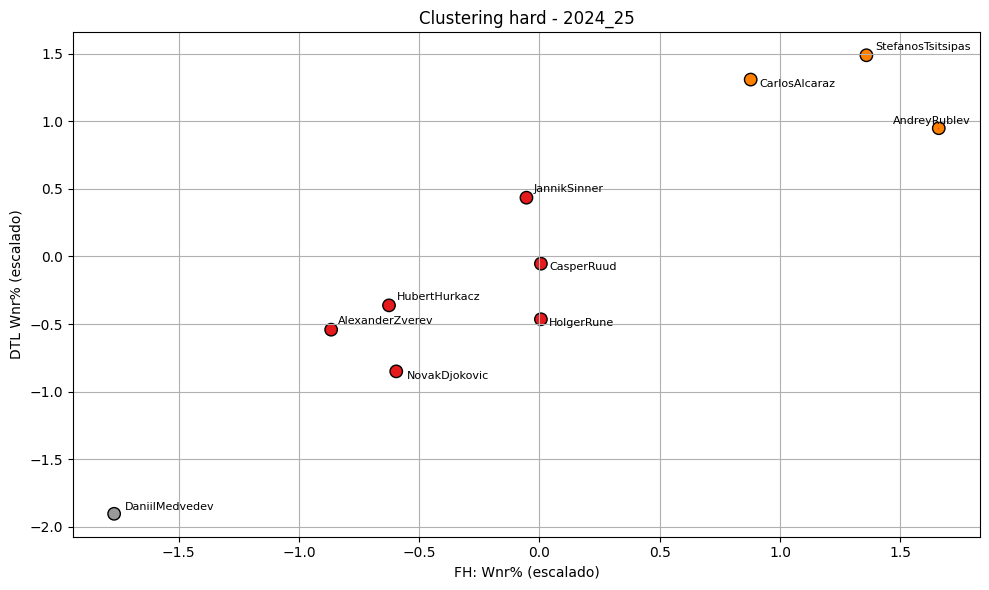


Procesando: CLAY - 2019_23


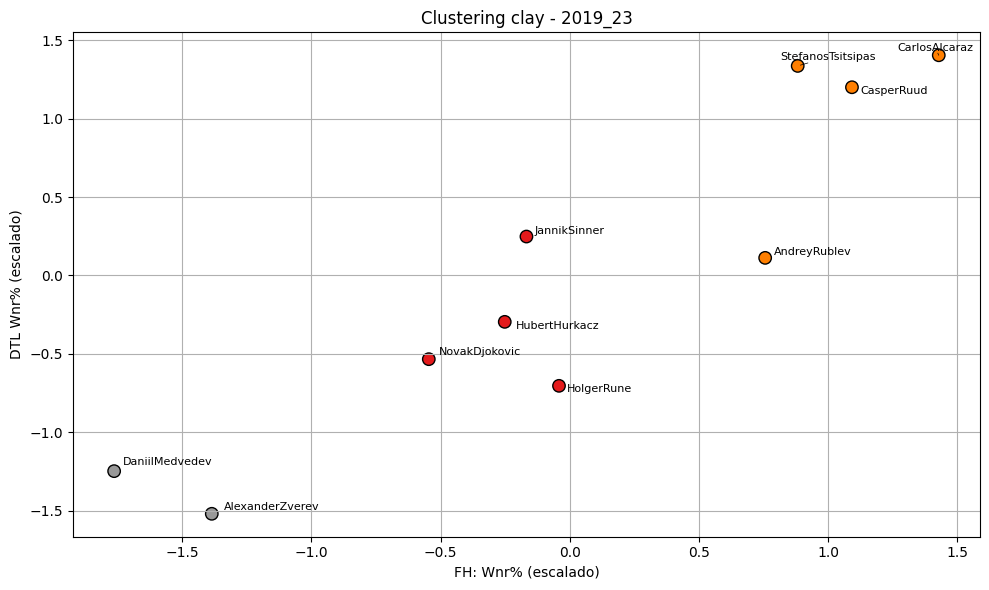


Procesando: CLAY - 2024_25


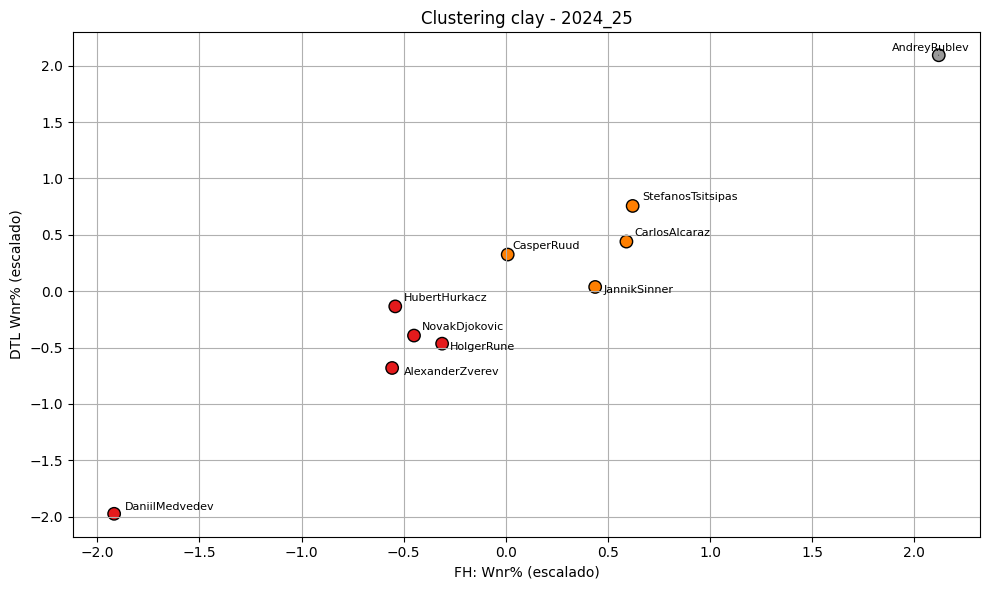


=== COMPARATIVA GLOBAL ===
               Player  FH: Wnr%  DTL Wnr%  Cluster Superficie  Periodo
45         HolgerRune      13.8      15.4        0       clay  2019_23
46      HubertHurkacz      13.3      16.6        0       clay  2019_23
47       JannikSinner      13.5      18.2        0       clay  2019_23
48      NovakDjokovic      12.6      15.9        0       clay  2019_23
41       AndreyRublev      15.7      17.8        1       clay  2019_23
42      CarlosAlcaraz      17.3      21.6        1       clay  2019_23
43         CasperRuud      16.5      21.0        1       clay  2019_23
49  StefanosTsitsipas      16.0      21.4        1       clay  2019_23
40    AlexanderZverev      10.6      13.0        2       clay  2019_23
44     DaniilMedvedev       9.7      13.8        2       clay  2019_23
50    AlexanderZverev      12.3      14.1        0       clay  2024_25
54     DaniilMedvedev       3.4       5.1        0       clay  2024_25
55         HolgerRune      13.9      15.6        

In [81]:
# === Variables a comparar ===
var1 = "FH: Wnr%"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "DTL Wnr%" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


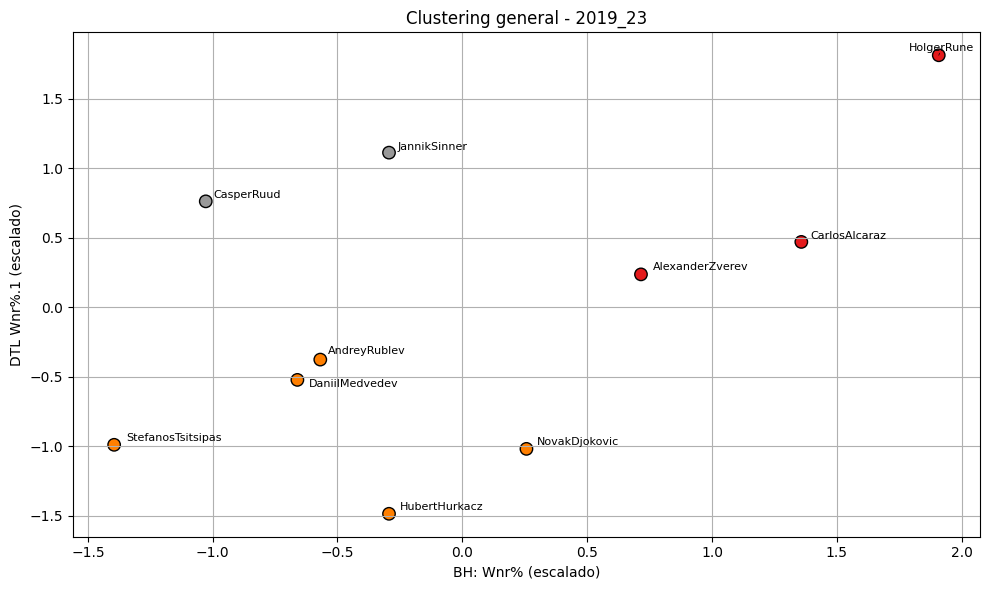


Procesando: GENERAL - 2024_25


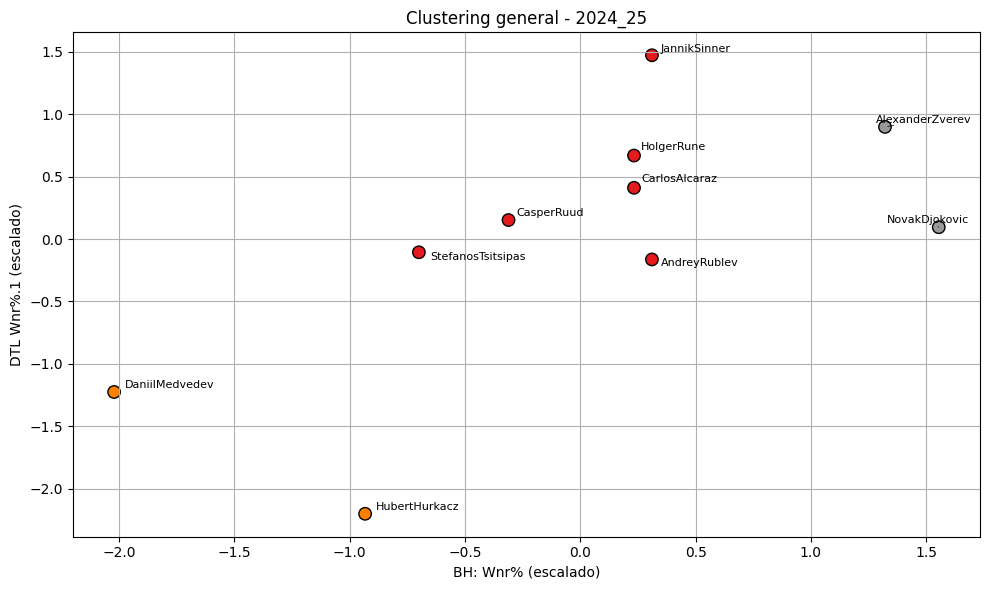


Procesando: HARD - 2019_23


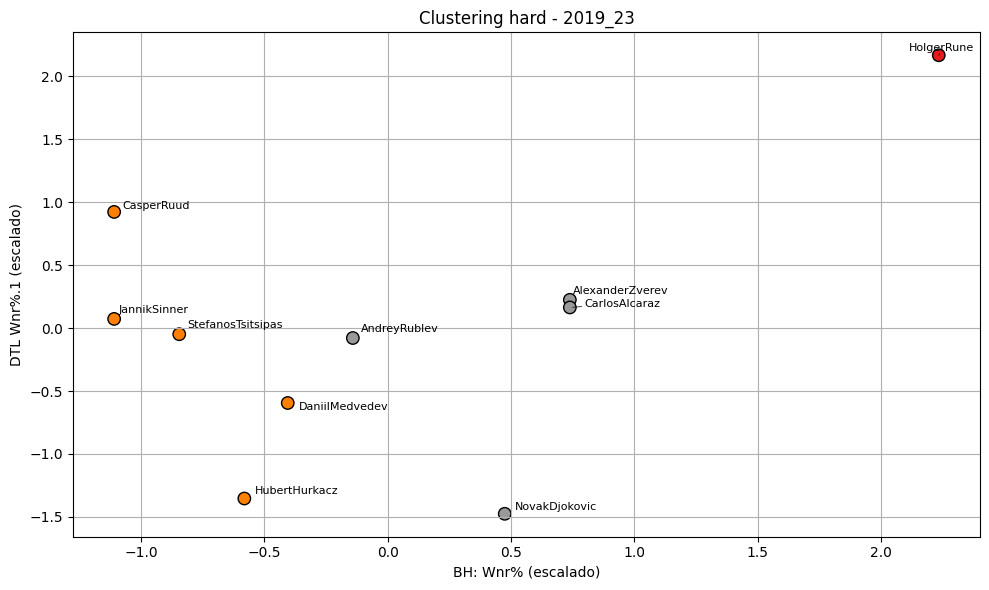


Procesando: HARD - 2024_25


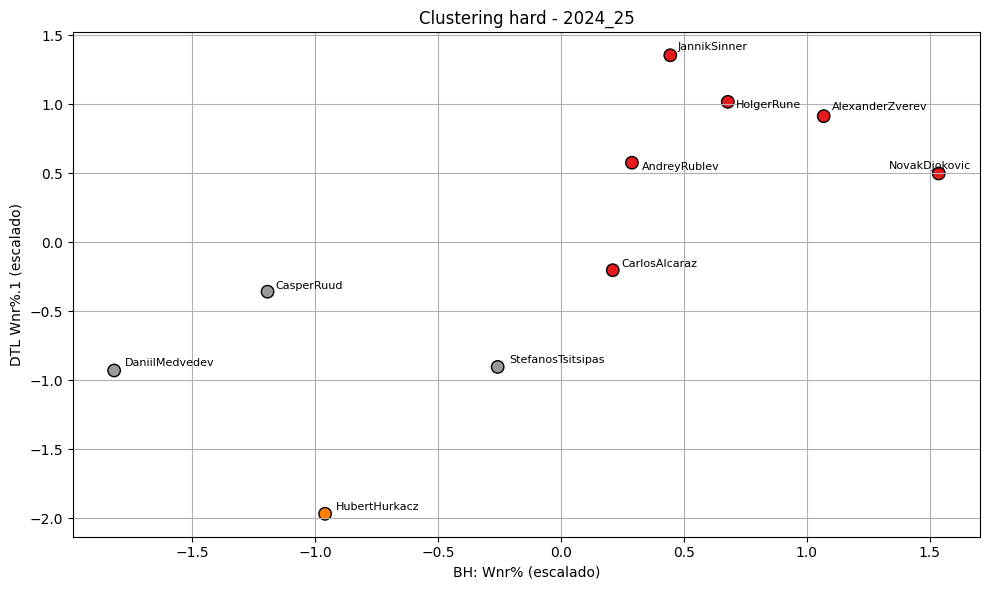


Procesando: CLAY - 2019_23


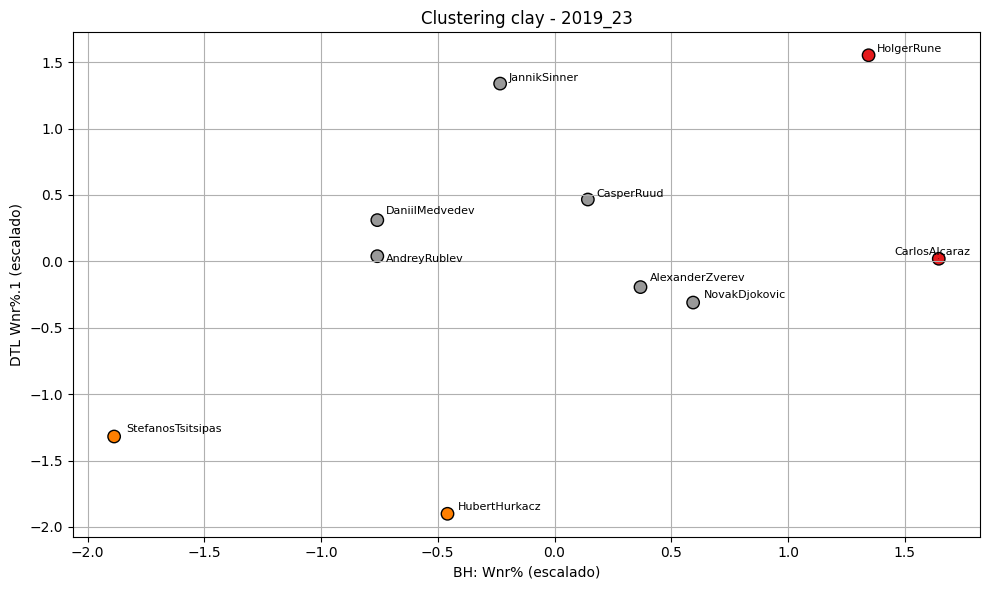


Procesando: CLAY - 2024_25


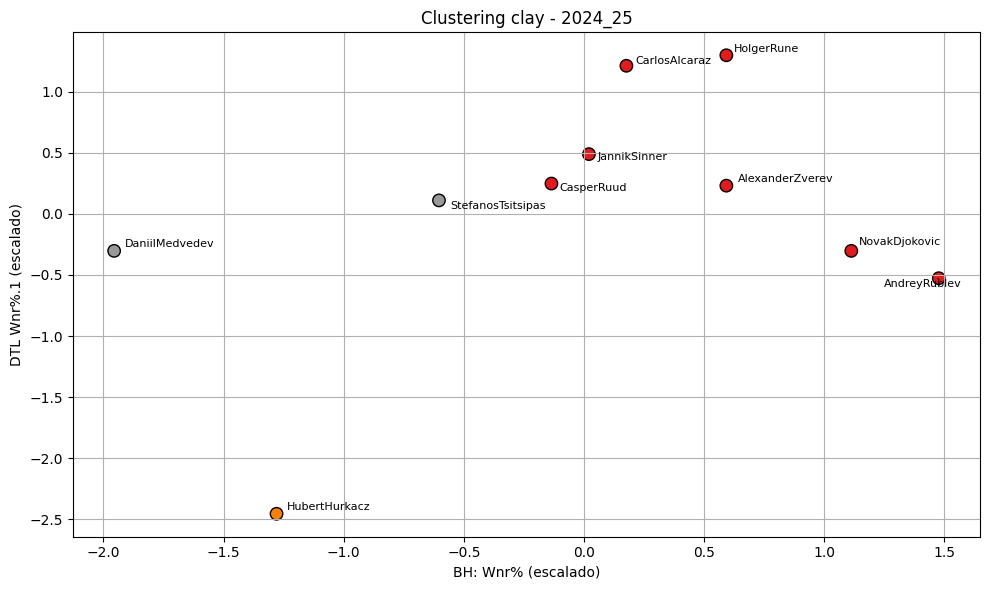


=== COMPARATIVA GLOBAL ===
               Player  BH: Wnr%  DTL Wnr%.1  Cluster Superficie  Periodo
42      CarlosAlcaraz       8.9        23.0        0       clay  2019_23
45         HolgerRune       8.5        30.9        0       clay  2019_23
46      HubertHurkacz       6.1        13.1        1       clay  2019_23
49  StefanosTsitsipas       4.2        16.1        1       clay  2019_23
40    AlexanderZverev       7.2        21.9        2       clay  2019_23
41       AndreyRublev       5.7        23.1        2       clay  2019_23
43         CasperRuud       6.9        25.3        2       clay  2019_23
44     DaniilMedvedev       5.7        24.5        2       clay  2019_23
47       JannikSinner       6.4        29.8        2       clay  2019_23
48      NovakDjokovic       7.5        21.3        2       clay  2019_23
50    AlexanderZverev       9.1        28.1        0       clay  2024_25
51       AndreyRublev      10.8        23.7        0       clay  2024_25
52      CarlosAlcaraz  

In [82]:
# === Variables a comparar ===
var1 = "BH: Wnr%"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "DTL Wnr%.1" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


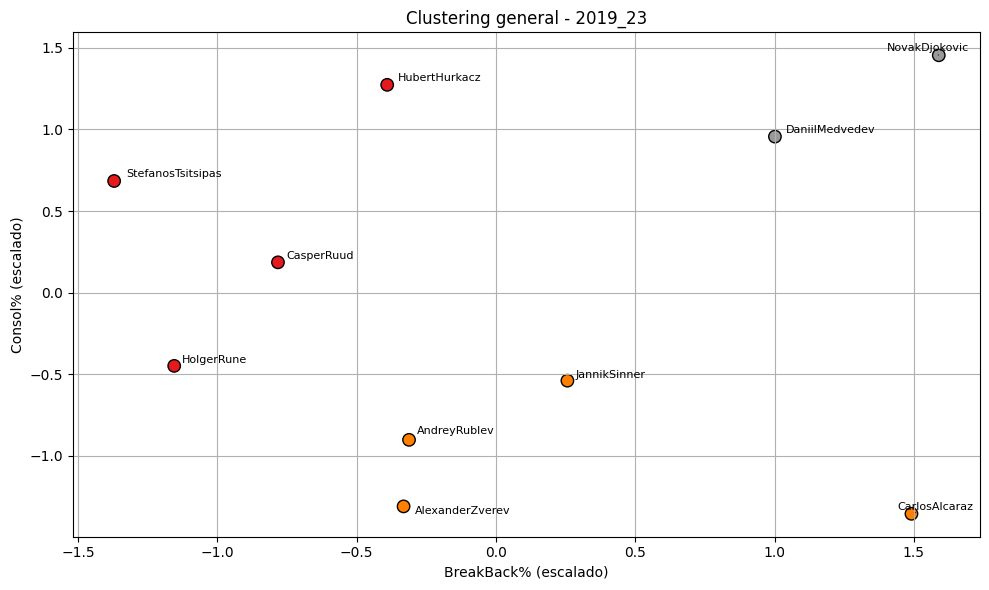


Procesando: GENERAL - 2024_25


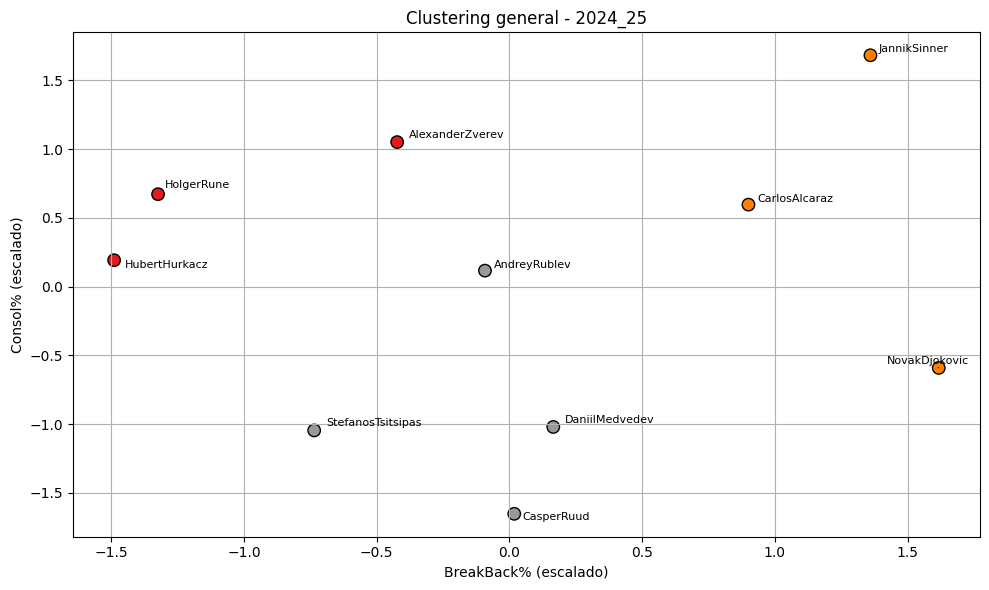


Procesando: HARD - 2019_23


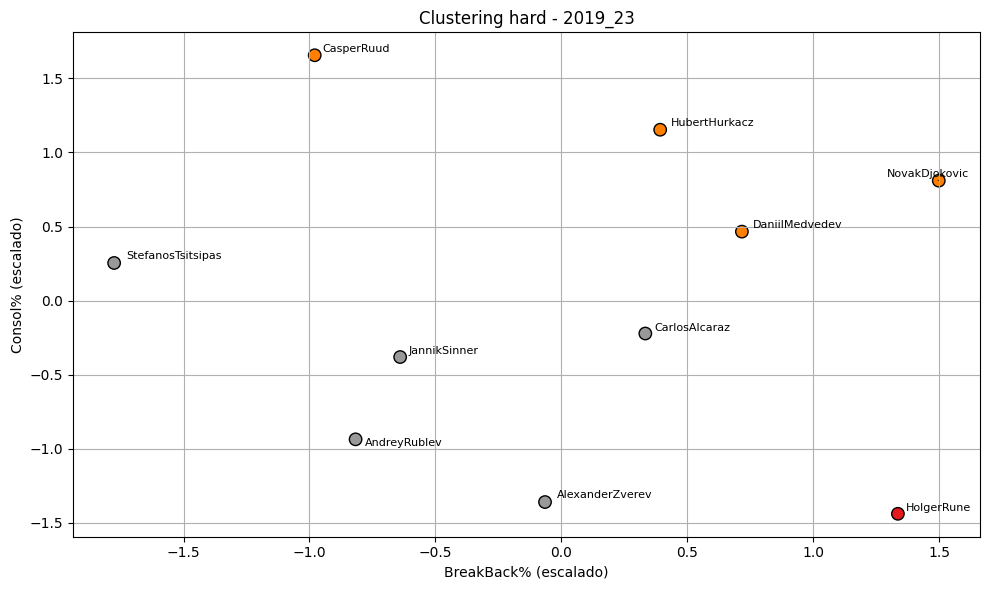


Procesando: HARD - 2024_25


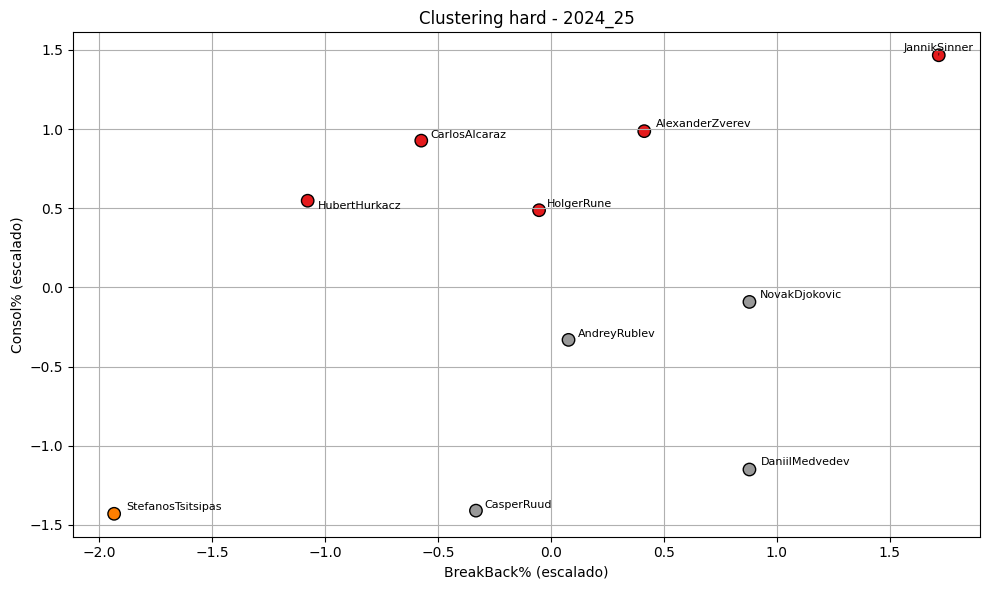


Procesando: CLAY - 2019_23


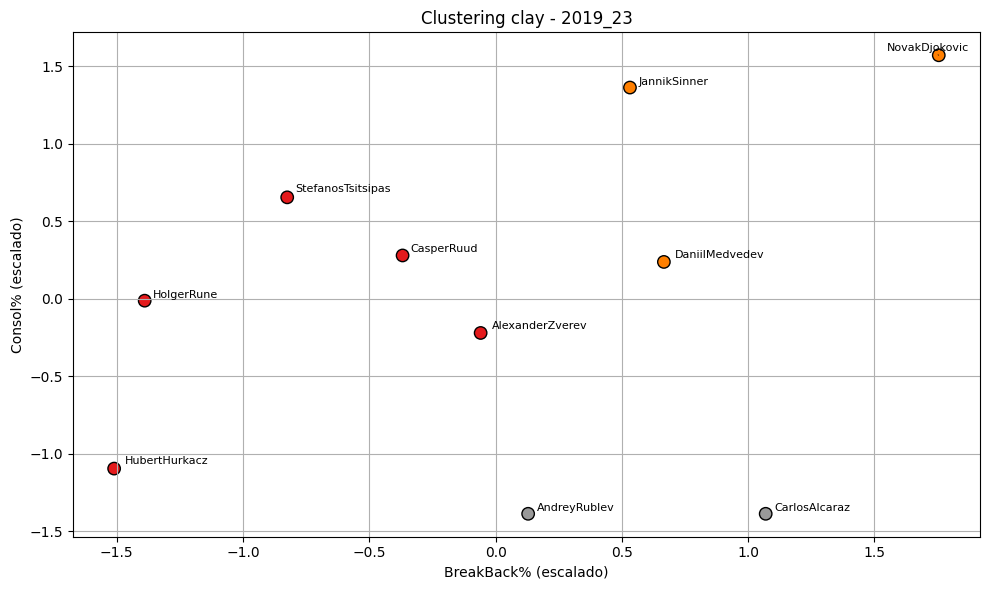


Procesando: CLAY - 2024_25


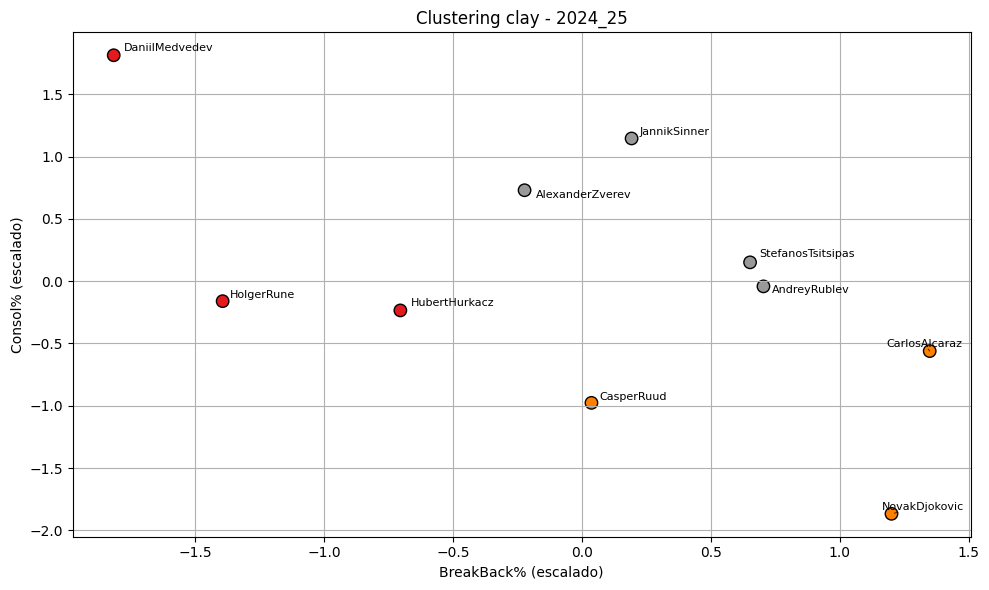


=== COMPARATIVA GLOBAL ===
               Player  BreakBack%  Consol%  Cluster Superficie  Periodo
40    AlexanderZverev        25.9     81.3        0       clay  2019_23
43         CasperRuud        23.6     82.5        0       clay  2019_23
45         HolgerRune        16.0     81.8        0       clay  2019_23
46      HubertHurkacz        15.1     79.2        0       clay  2019_23
49  StefanosTsitsipas        20.2     83.4        0       clay  2019_23
44     DaniilMedvedev        31.3     82.4        1       clay  2019_23
47       JannikSinner        30.3     85.1        1       clay  2019_23
48      NovakDjokovic        39.4     85.6        1       clay  2019_23
41       AndreyRublev        27.3     78.5        2       clay  2019_23
42      CarlosAlcaraz        34.3     78.5        2       clay  2019_23
54     DaniilMedvedev         0.0    100.0        0       clay  2024_25
55         HolgerRune         5.7     86.7        0       clay  2024_25
56      HubertHurkacz        15.0   

In [83]:
# === Variables a comparar ===
var1 = "BreakBack%"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "Consol%" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


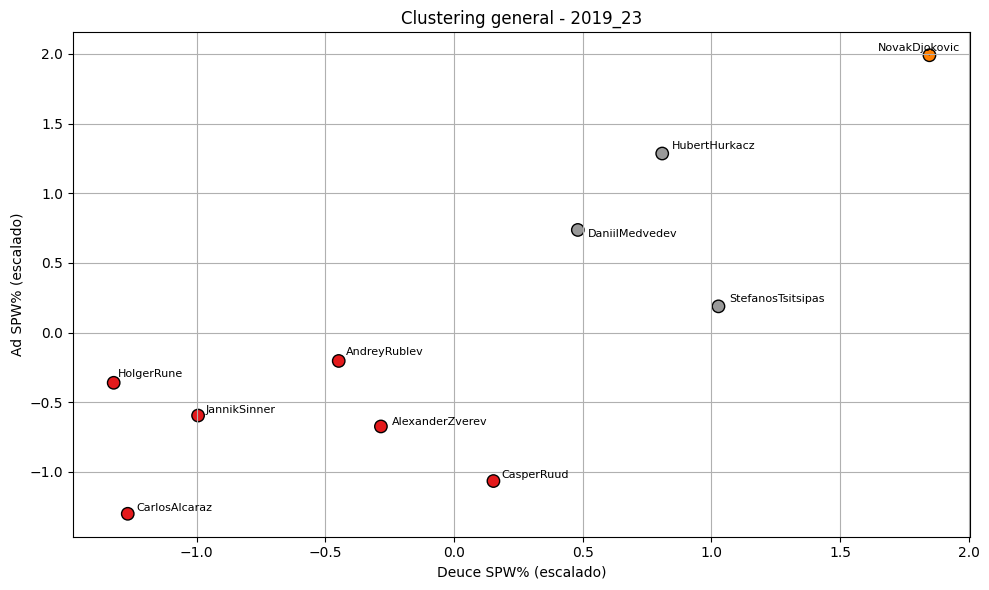


Procesando: GENERAL - 2024_25


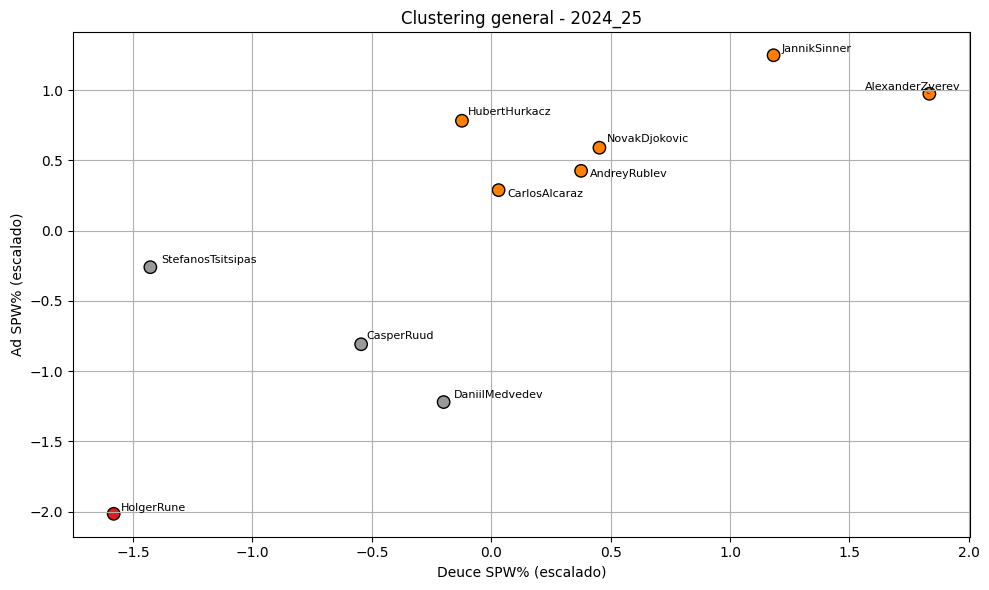


Procesando: HARD - 2019_23


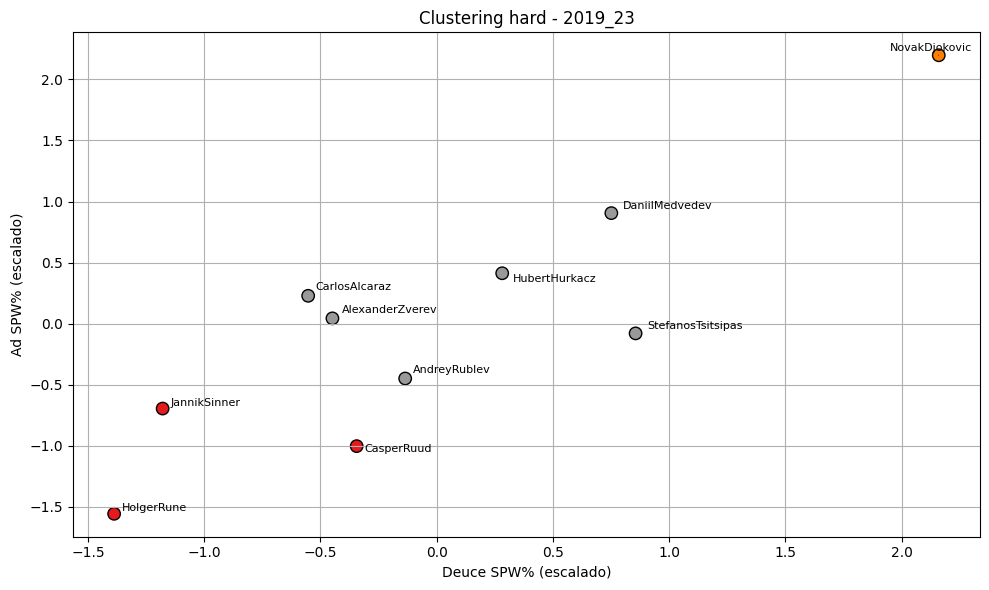


Procesando: HARD - 2024_25


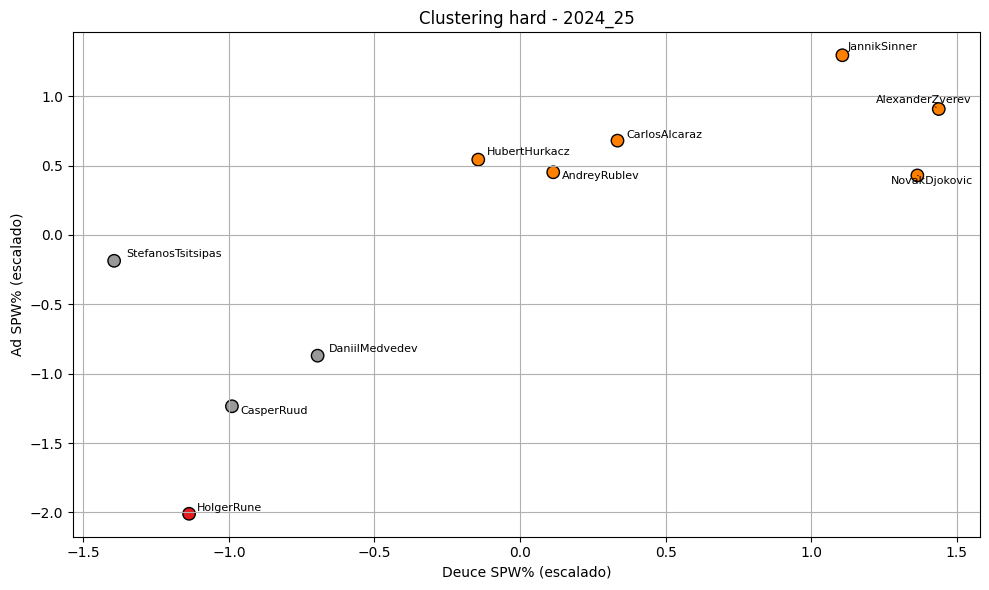


Procesando: CLAY - 2019_23


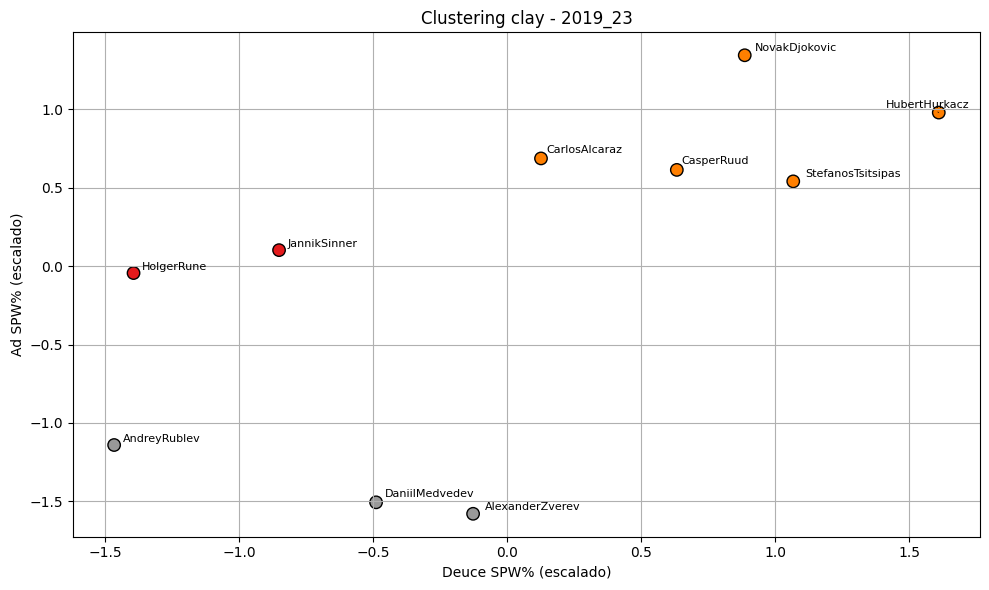


Procesando: CLAY - 2024_25


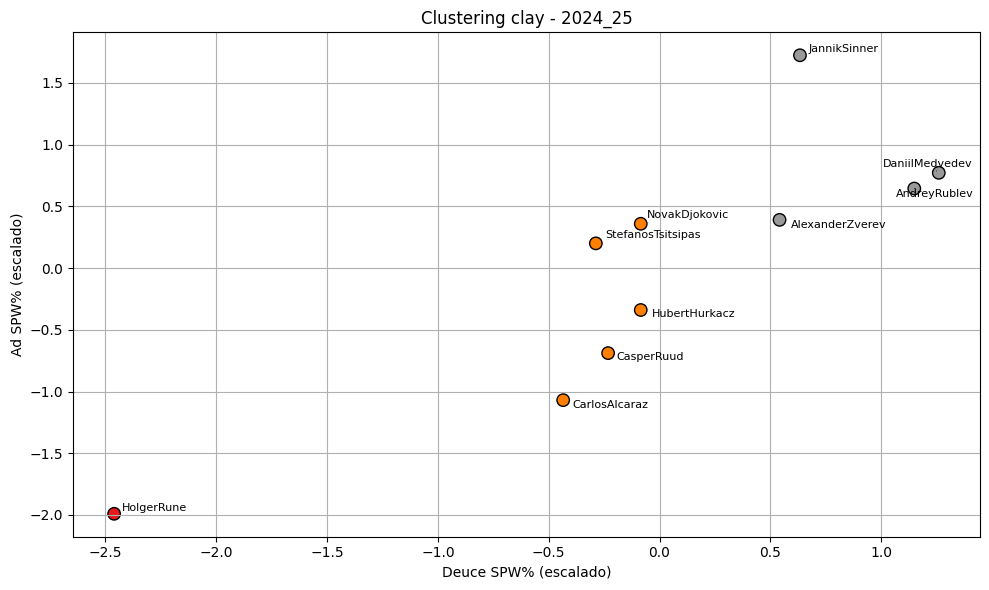


=== COMPARATIVA GLOBAL ===
               Player  Deuce SPW%  Ad SPW%  Cluster Superficie  Periodo
45         HolgerRune        61.2     63.9        0       clay  2019_23
47       JannikSinner        62.7     64.1        0       clay  2019_23
42      CarlosAlcaraz        65.4     64.9        1       clay  2019_23
43         CasperRuud        66.8     64.8        1       clay  2019_23
46      HubertHurkacz        69.5     65.3        1       clay  2019_23
48      NovakDjokovic        67.5     65.8        1       clay  2019_23
49  StefanosTsitsipas        68.0     64.7        1       clay  2019_23
40    AlexanderZverev        64.7     61.8        2       clay  2019_23
41       AndreyRublev        61.0     62.4        2       clay  2019_23
44     DaniilMedvedev        63.7     61.9        2       clay  2019_23
55         HolgerRune        53.9     60.9        0       clay  2024_25
52      CarlosAlcaraz        64.9     63.8        1       clay  2024_25
53         CasperRuud        66.0   

In [84]:
# === Variables a comparar ===
var1 = "Deuce SPW%"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "Ad SPW%" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


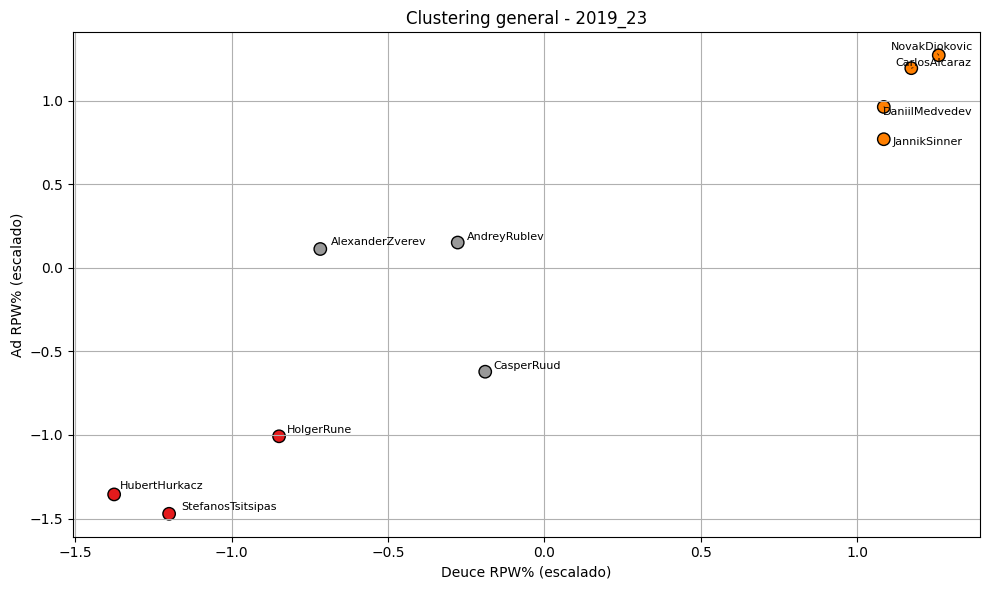


Procesando: GENERAL - 2024_25


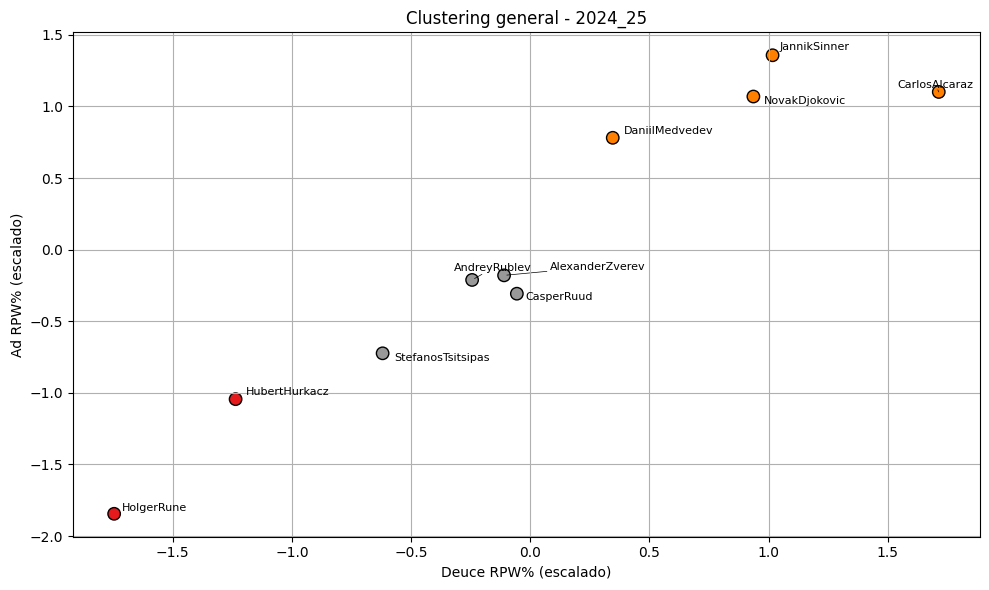


Procesando: HARD - 2019_23


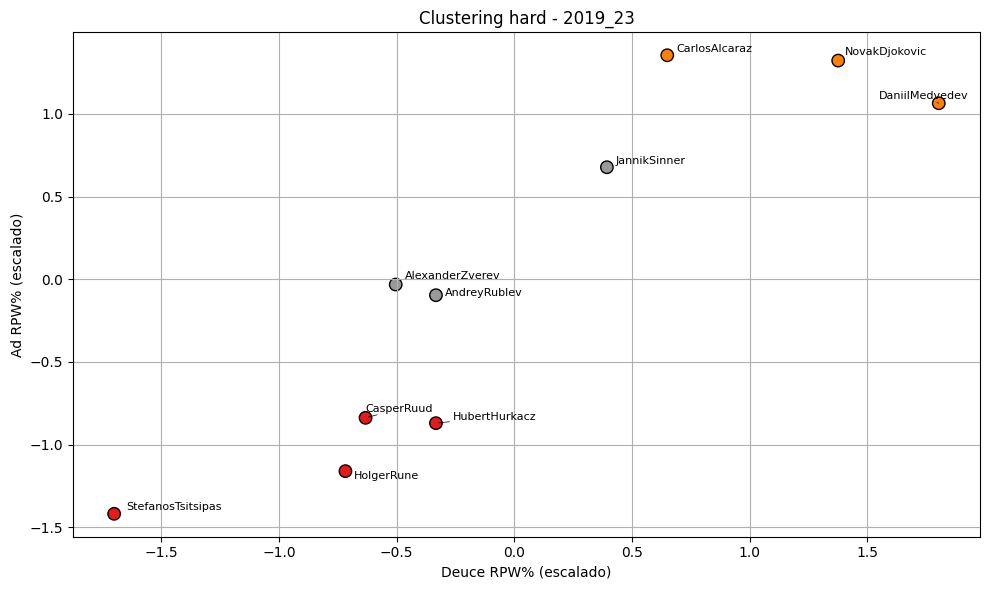


Procesando: HARD - 2024_25


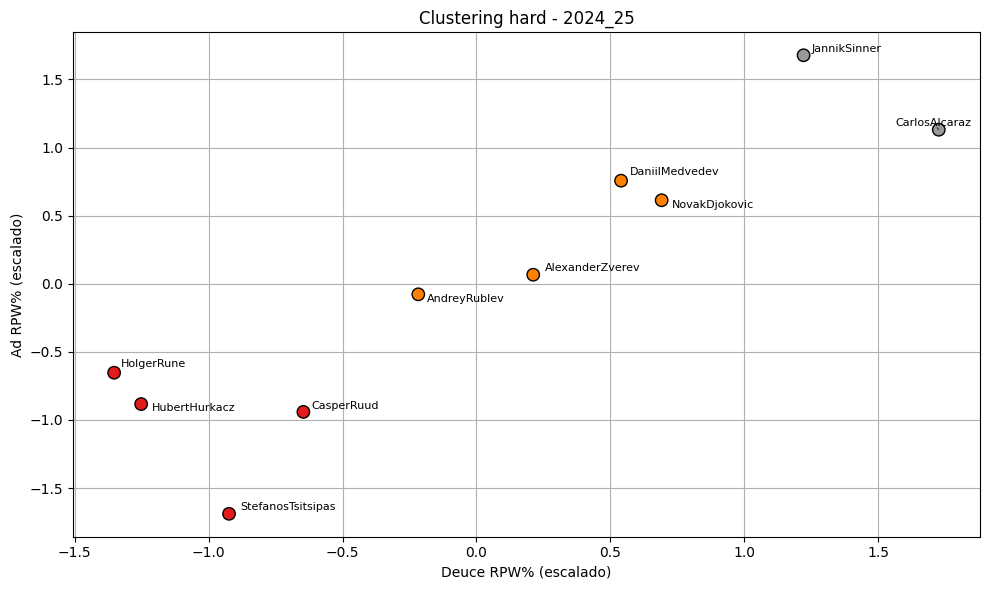


Procesando: CLAY - 2019_23


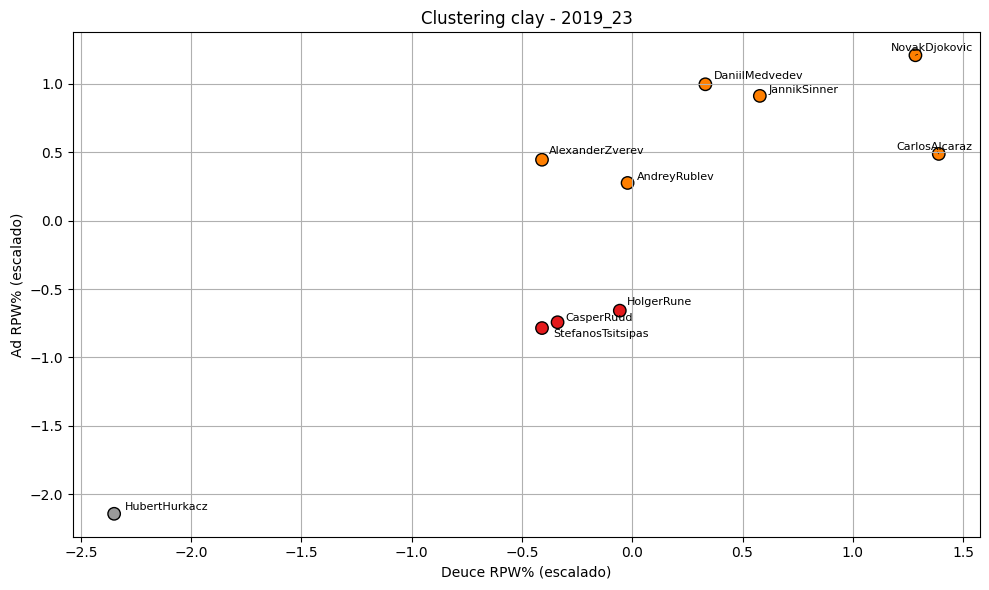


Procesando: CLAY - 2024_25


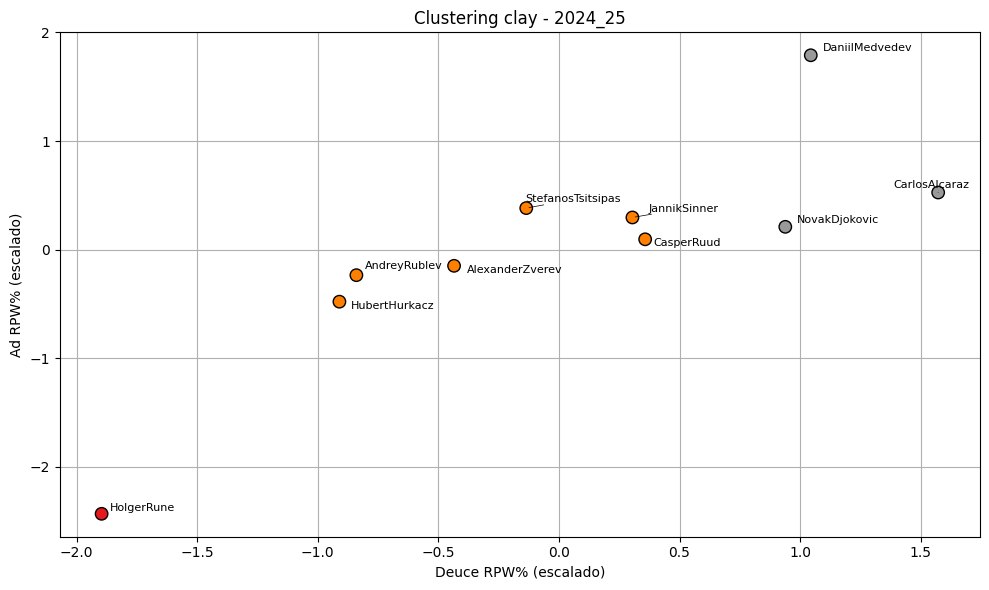


=== COMPARATIVA GLOBAL ===
               Player  Deuce RPW%  Ad RPW%  Cluster Superficie  Periodo
43         CasperRuud        39.0     38.7        0       clay  2019_23
45         HolgerRune        39.8     38.9        0       clay  2019_23
49  StefanosTsitsipas        38.8     38.6        0       clay  2019_23
40    AlexanderZverev        38.8     41.5        1       clay  2019_23
41       AndreyRublev        39.9     41.1        1       clay  2019_23
42      CarlosAlcaraz        43.9     41.6        1       clay  2019_23
44     DaniilMedvedev        40.9     42.8        1       clay  2019_23
47       JannikSinner        41.6     42.6        1       clay  2019_23
48      NovakDjokovic        43.6     43.3        1       clay  2019_23
46      HubertHurkacz        33.3     35.4        2       clay  2019_23
55         HolgerRune        30.4     23.9        0       clay  2024_25
50    AlexanderZverev        38.7     39.8        1       clay  2024_25
51       AndreyRublev        36.4   

In [85]:
# === Variables a comparar ===
var1 = "Deuce RPW%"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "Ad RPW%" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


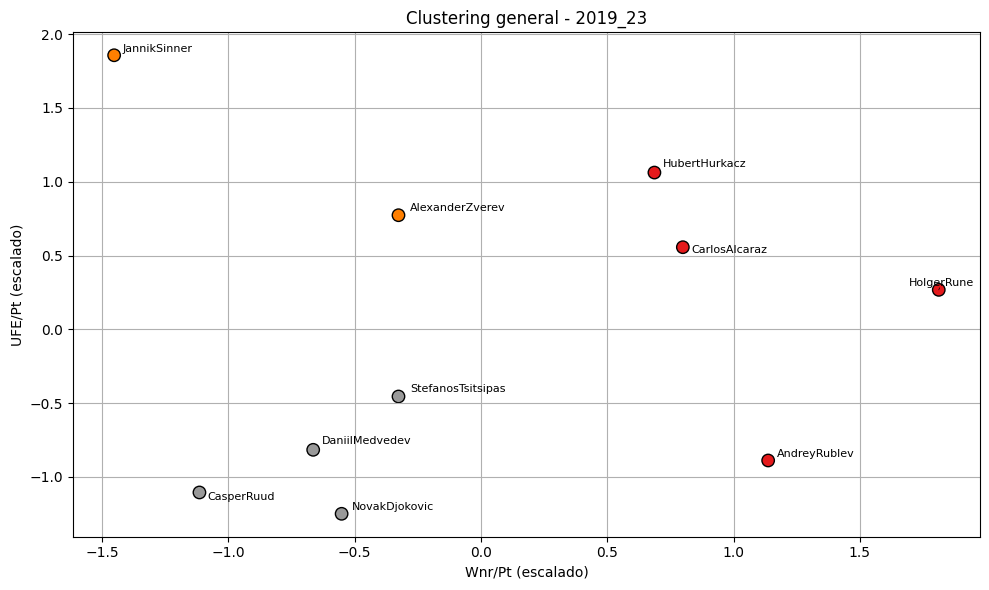


Procesando: GENERAL - 2024_25


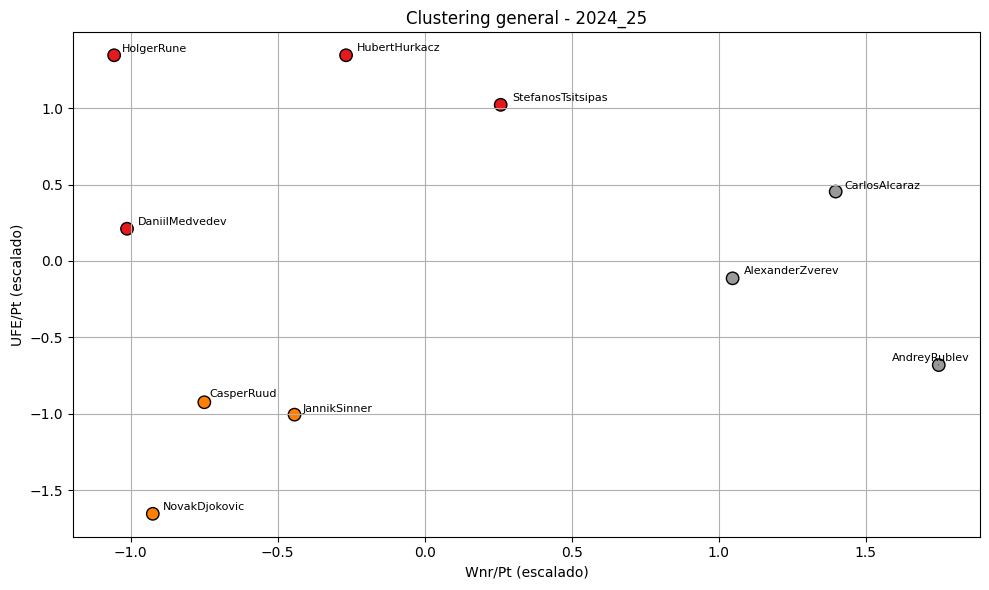


Procesando: HARD - 2019_23


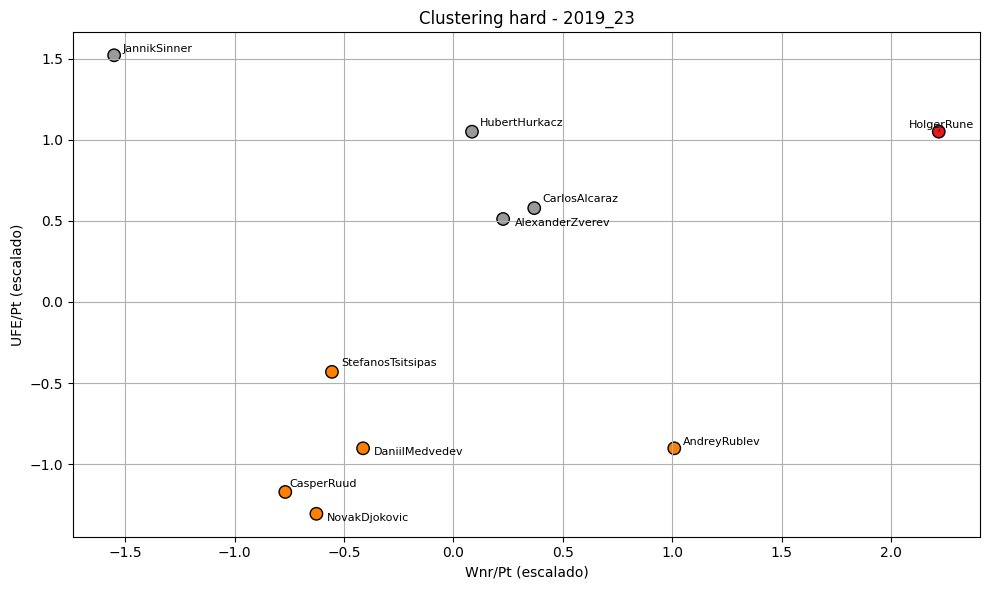


Procesando: HARD - 2024_25


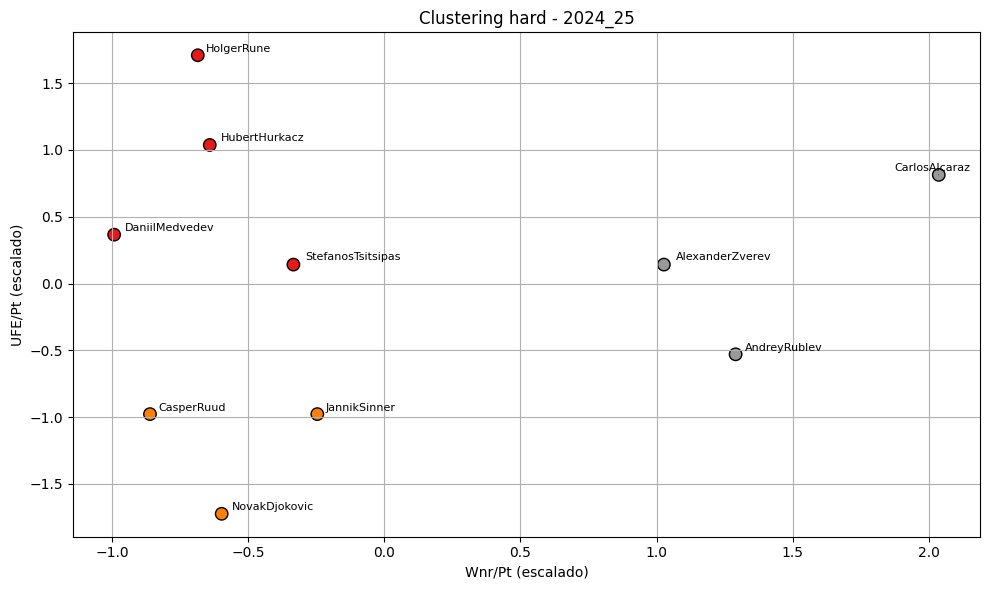


Procesando: CLAY - 2019_23


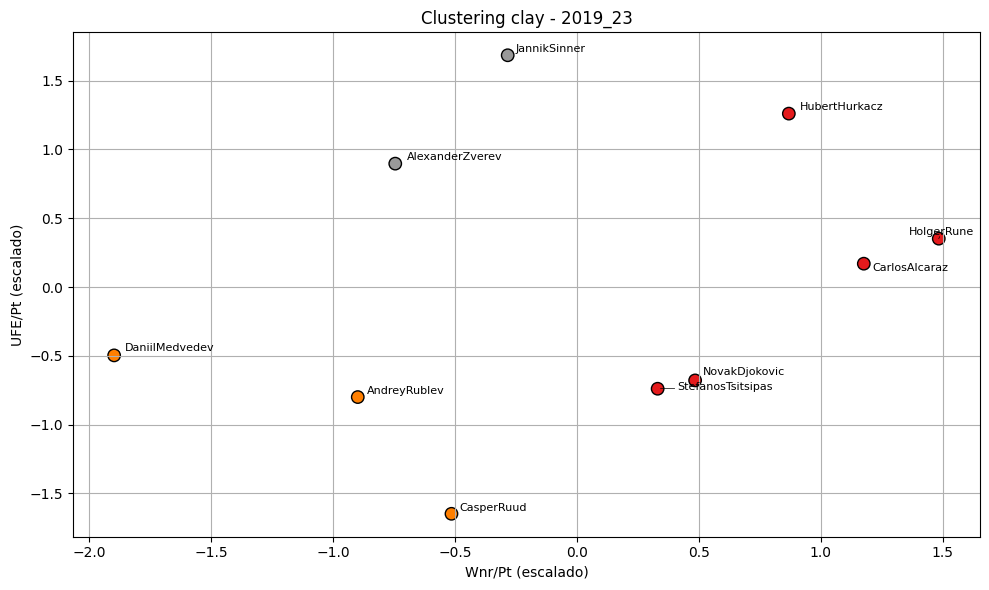


Procesando: CLAY - 2024_25


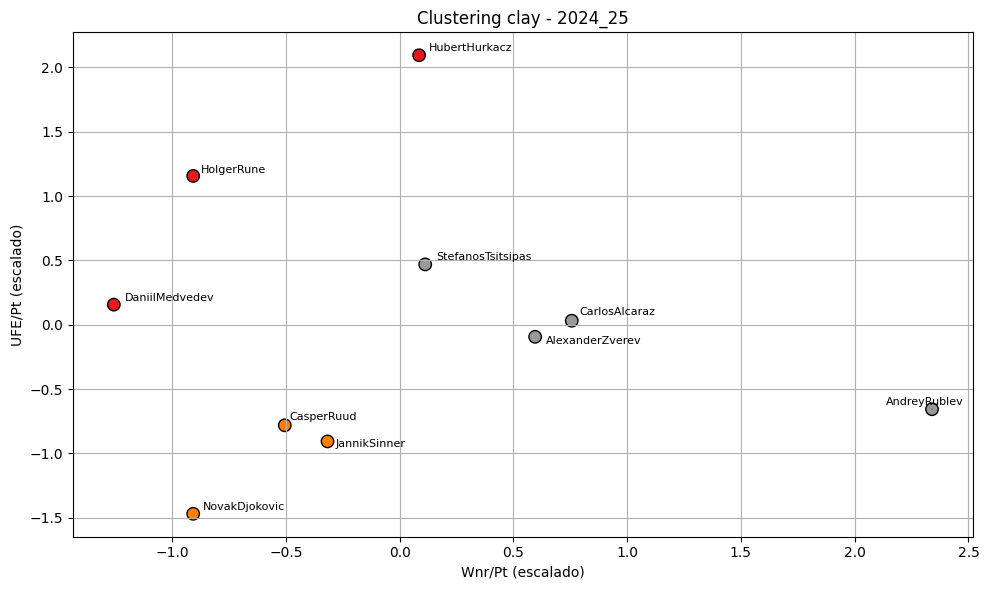


=== COMPARATIVA GLOBAL ===
               Player  Wnr/Pt  UFE/Pt  Cluster Superficie  Periodo
42      CarlosAlcaraz    18.1    17.2        0       clay  2019_23
45         HolgerRune    18.5    17.5        0       clay  2019_23
46      HubertHurkacz    17.7    19.0        0       clay  2019_23
48      NovakDjokovic    17.2    15.8        0       clay  2019_23
49  StefanosTsitsipas    17.0    15.7        0       clay  2019_23
41       AndreyRublev    15.4    15.6        1       clay  2019_23
43         CasperRuud    15.9    14.2        1       clay  2019_23
44     DaniilMedvedev    14.1    16.1        1       clay  2019_23
40    AlexanderZverev    15.6    18.4        2       clay  2019_23
47       JannikSinner    16.2    19.7        2       clay  2019_23
54     DaniilMedvedev    14.9    15.8        0       clay  2024_25
55         HolgerRune    16.2    17.4        0       clay  2024_25
56      HubertHurkacz    19.9    18.9        0       clay  2024_25
53         CasperRuud    17.7    1

In [86]:
# === Variables a comparar ===
var1 = "Wnr/Pt"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "UFE/Pt" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))


Procesando: GENERAL - 2019_23


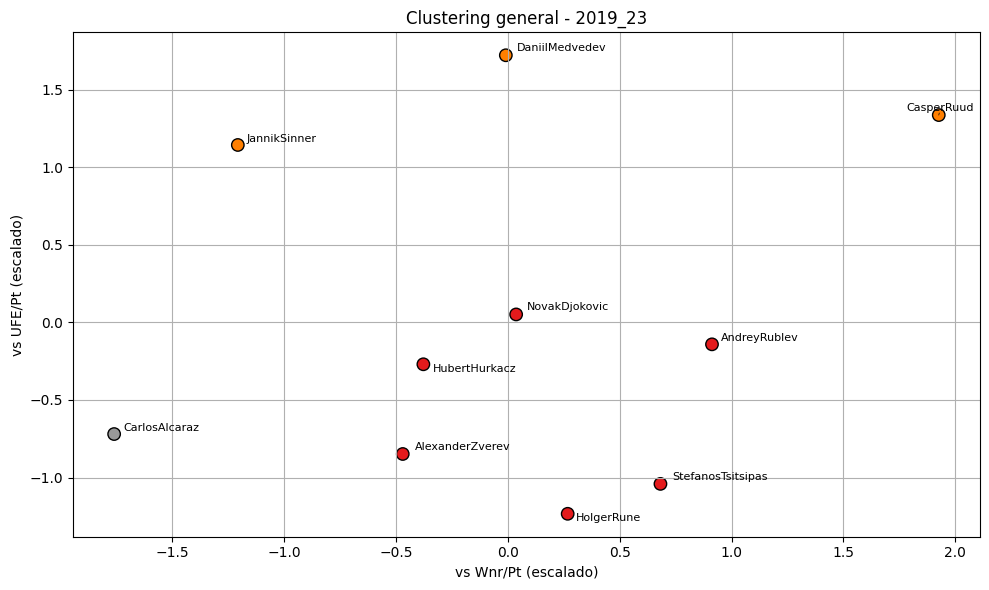


Procesando: GENERAL - 2024_25


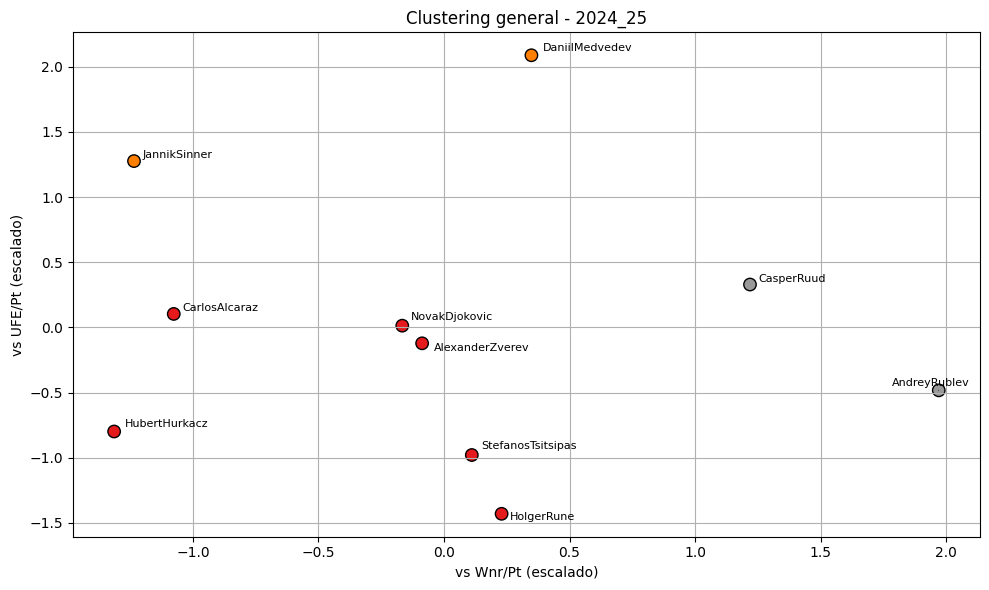


Procesando: HARD - 2019_23


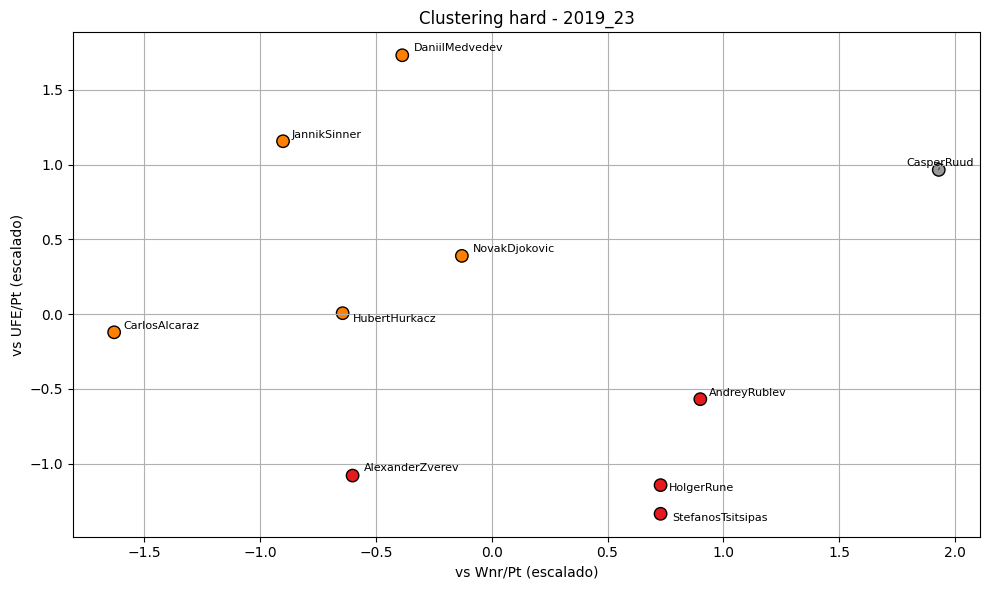


Procesando: HARD - 2024_25


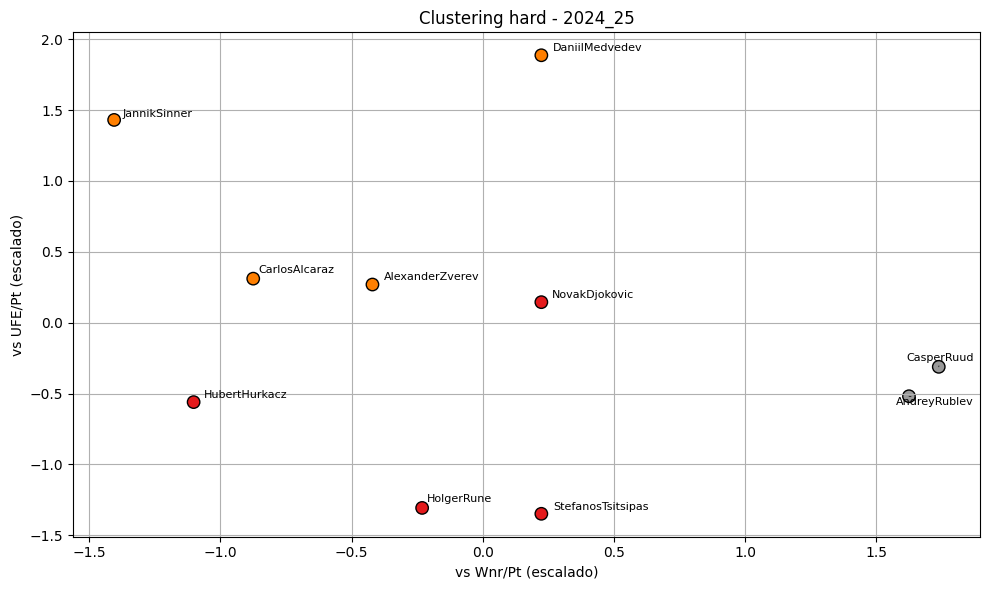


Procesando: CLAY - 2019_23


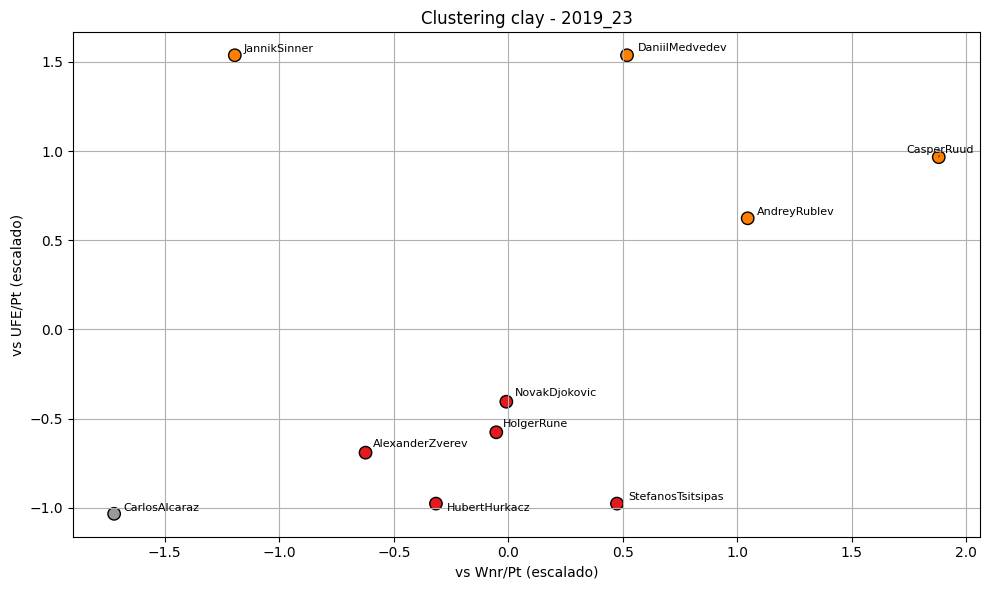


Procesando: CLAY - 2024_25


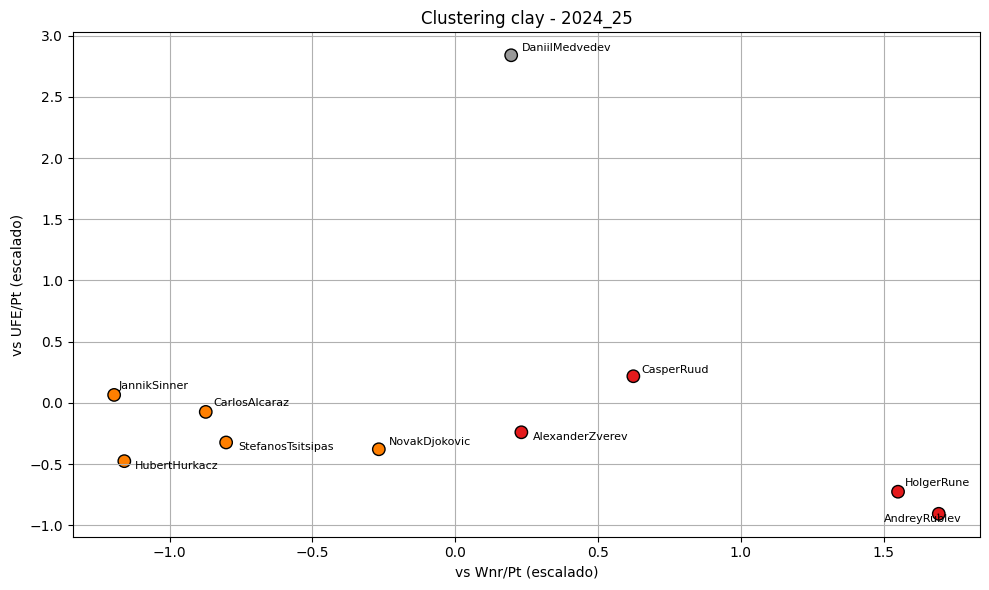


=== COMPARATIVA GLOBAL ===
               Player  vs Wnr/Pt  vs UFE/Pt  Cluster Superficie  Periodo
40    AlexanderZverev       13.7       17.5        0       clay  2019_23
45         HolgerRune       15.0       17.7        0       clay  2019_23
46      HubertHurkacz       14.4       17.0        0       clay  2019_23
48      NovakDjokovic       15.1       18.0        0       clay  2019_23
49  StefanosTsitsipas       16.2       17.0        0       clay  2019_23
41       AndreyRublev       17.5       19.8        1       clay  2019_23
43         CasperRuud       19.4       20.4        1       clay  2019_23
44     DaniilMedvedev       16.3       21.4        1       clay  2019_23
47       JannikSinner       12.4       21.4        1       clay  2019_23
42      CarlosAlcaraz       11.2       16.9        2       clay  2019_23
50    AlexanderZverev       18.5       18.2        0       clay  2024_25
51       AndreyRublev       22.6       13.4        0       clay  2024_25
53         CasperRuud  

In [87]:
# === Variables a comparar ===
var1 = "vs Wnr/Pt"           # ← reemplaza por el nombre exacto en tu CSV
var2 = "vs UFE/Pt" # ← reemplaza por el nombre exacto en tu CSV

# === Lista para guardar resumen global ===
resumen_global = []

# === Bucle por superficie y periodo ===
for superficie, periodos in rutas.items():
    for periodo, ruta_csv in periodos.items():
        print(f"\nProcesando: {superficie.upper()} - {periodo}")

        # 1. Leer CSV
        df = pd.read_csv(ruta_csv)

        # 2. Verificar que existen las variables necesarias
        if var1 not in df.columns or var2 not in df.columns:
            print(f"Variables {var1} o {var2} no encontradas en {ruta_csv}")
            continue

        # 3. Escalado
        X = df[[var1, var2]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 4. KMeans clustering
        kmeans = KMeans(n_clusters=3, random_state=0)
        df["Cluster"] = kmeans.fit_predict(X_scaled)

        # 5. Guardar para resumen global
        df["Superficie"] = superficie
        df["Periodo"] = periodo
        resumen_global.append(df[["Player", var1, var2, "Cluster", "Superficie", "Periodo"]])

        # 6. Gráfica
        plt.figure(figsize=(10, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Cluster"], cmap="Set1", s=80, edgecolor="k")

        texts = []
        for i, row in df.iterrows():
            texts.append(plt.text(X_scaled[i, 0], X_scaled[i, 1], row["Player"], fontsize=8))

        adjust_text(texts, only_move={'points': 'y', 'text': 'x'},
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

        plt.xlabel(f"{var1} (escalado)")
        plt.ylabel(f"{var2} (escalado)")
        plt.title(f"Clustering {superficie} - {periodo}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# === Comparativa Global Final ===
df_resumen = pd.concat(resumen_global, ignore_index=True)
print("\n=== COMPARATIVA GLOBAL ===")
print(df_resumen.sort_values(by=["Superficie", "Periodo", "Cluster"]))